<a href="https://colab.research.google.com/github/Crist1am/DataScience_CH/blob/main/CrossValidation_Halving_%26_RandomizeSearch_CristianVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Abstract

Cada año que pasa, las personas tienen más posibilidades de viajar a otros países y uno de los más atractivos para los países sudamericanos es España, principalmente por el idioma. España se caracteriza por tener ciudades muy turísticas en el verano europeo, como Barcelona, Madrid, la isla de Mallorca, entre otras. Existen muchas aplicaciones para alojar en distintas ciudades del mundo, dentro de las cuales su precio depende de muchos factores, como cercanía a atractivos turísticos, los servicios que ofrecen, la capacidad de personas admitidas, etc.
Este proyecto busca generar un modelo que permita estimar el precio de renta de alojamientos turísticos, ya sea de una habitación privada o de la renta de una casa/apartamento en la ciudad de Barcelona, comprendiendo las relaciones entre las características de los alojamientos y sus respectivas rentas, con el fin de ayudar a los anfitriones a ajustar sus valores de renta y a los que quieran incursionar en esta área de arrendar alojamientos turísticos tomando la mejor decisión.
Para este proyecto se cuenta con la hipótesis nula (H0) de que no existe una relación entre las características del alojamiento con el precio de este. Por el contrario, la hipótesis de investigación (H1) sugiere que si existe una relación entre las características de un alojamiento y su precio de renta.
Las hipótesis de interés para esta entrega son:

1.   Existe una correlación positiva entre el número de personas admitidas y el precio
2.   Existe una correlación positiva entre el número de dormitorios y el precio del alojamiento
3. Existe una correlación positiva entre la latitud y longitud del alojamiento

# Introducción

## Definición de objetivo

¿Como estimar el precio de renta de alojamientos turisticos en Barcelona, España estando dentro de la mayoria de los valores de estos, es decir, sin ser excesivamente caro ni excesivamente barato?

## Contexto comercial

España es uno de los destinos favoritos para los sudamericanos debido al idioma, pero tambien atrae a una gran cantidad de turistas de otros paises/continentes por la cultura deportiva que hay en el país. Es por eso que la cantidad de alojamientos en distintas ciudades de España ha ido aumentando, sin embargo existen alojamientos que son excesivamente costosos comparado a sus similares. Debido a esto, se cuenta con una base de datos desde enero, 2017 hasta febrero, 2021 de alojamientos turisticos en algunas ciudades de España con informacion importante de cada uno de estos como el precio, la cantidad de camas, la capacidad, la cantidad de servicios, etc.
Se espera que con la base de datos, se pueda estimar el precio de renta de alojamientos turisticos en la ciudad de Barcelona que quieran entrar al mercado, es decir, que futuros anfitriones puedan ingresar las caracteristicas del alojamiento que desean poner en el mercado, y de esta manera puedan saber a que precio deberian rentarlo, así como tambien ayudar a los actuales anfitriones que estan fuera el precio "normal" de renta y puedan ajustarse al mercado.

## Problema comercial

Se cuenta con una base de datos con 10.000 alojamientos turisticos en 8 ciudades de España, pero se requiere acotar el modelo a la ciudad de Barcelona, contabilizando solamente alojamientos de tipo "Private room" y "Entire home/apt", dado que es la ciudad y los tipos de alojamientos con más datos con respecto a los demás. Mediante una serie de limpiezas de datos nulos, outliers y eleccion de columnas de interes se espera responder mediante visualizaciones:

*   En promedio, que tipo de alojamiento son los de mayor costo? y los de menor costo?
*   Para el caso de los "Private_room", cual es la capacidad máxima de personas admitidas? y cuales son las más frecuentes?
*   Cuales es el tipo de alojamiento más popular en Barcelona?
*   Como es la relación entre el número de dormitorios y baños por tipo de habitación?







## Contexto analítico

Se entrega una base de datos online en formato CSV desde un sitio web español el cual contiene detalles de 10.000 alojamientos turisticos ingresados en el dataset como el precio, fecha de ingreso, cantidad de dormitorios ofrecidos, servicios que entrega, las calificaciones hechas por los huespedes de limpieza, detalles de la descripcion, de la ubicacion, del trato con ellos, etc. Asi como el tipo de alojamiento, la ubicación precisa de este (longitud, latitud) entre otros. Como se mencionó, el formato de este dataset es CSV y el delimitador es ",".
El objetivo del este proyecto es determinar si existe correlación entre el precio de un alojamiento y alguno o algunos de sus atributos y de esta manera generar un modelo de correlación para estimar el precio de renta de estos inmuebles con el fin de ayudar a los anfitriones y huespedes a la hora de elegir el mejor alojamiento bajo sus parametros.
Con todos esta información se debe:

*   Importar el dataset
*   Leer los datos
*   Generar una nueva columna con la cantidad de servicios ofrecidos
*   Generar un nuevo dataset pero solo con las columnas de interes
*   Realizar un preprocesamiento de datos como la eliminación de datos incongruentes y la elección de la ciudad a trabajar (Barcelona) y los tipos de alojamientos ("Private room" y "Hotel home/apt")
*   Eliminar los datos outliers en las columnas
*   Si la cantidad de nulos en cada columna es menor al 15% del total de los datos, reemplazarlos con la mediana correspondiente (en formato entero)
*   Realizar un analisis con el dataset resultante para ver el comportamiento de las variables respecto al target (variable "price") como la correlación entre ellas
*   Realizar un analisis de componentes principales para reducir la dimensionalidad de la base de datos
*   Definir un modelo de regresión para el problema
*   Calcular las metricas de regresión.








# Librerias

In [ ]:
import pandas as pd
import numpy as np

#se importa re para generar una nueva columna con la cantidad de servicios
import re

#librerias necesarias para realizar gráficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import sklearn

#libreria para realizar label encoder
from sklearn.preprocessing import LabelEncoder

#libreria para estandarizar los datos
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# importamos el método que permite utilizar el análisis de componentes principales o PCA
from sklearn.decomposition import PCA

# importo librerias necesarias para realizar modelos de prediccion
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression     #modelo de regresion lineal
from sklearn.preprocessing  import PolynomialFeatures #para realizar regresiones polinomicas
from sklearn.linear_model import Lasso,  LassoLars    #modelo de Lars Lasso
from sklearn.neighbors import KNeighborsRegressor     #modelo KNN
from sklearn.svm import SVR                           #modelo Support Vector Machine
from sklearn.pipeline import Pipeline



#librerias para las metricas de regresion
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse #error cuadratico medio
from sklearn.metrics import mean_absolute_error

#librerias para cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


# Importación dataset 'Alojamientos turisticos España'


In [ ]:
df_aloj_turist = pd.read_csv("https://datamarket.es/media/samples/alojamientos-turisticos-sample.csv")

# EDA pre Data Wrangling

In [ ]:
#un vistazo a todas las columnas
df_aloj_turist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 10000 non-null  int64  
 1   md5                          10000 non-null  object 
 2   name                         9997 non-null   object 
 3   description                  9862 non-null   object 
 4   host_id                      10000 non-null  int64  
 5   neighborhood_overview        5899 non-null   object 
 6   neighbourhood_name           10000 non-null  object 
 7   neighbourhood_district       6079 non-null   object 
 8   latitude                     10000 non-null  float64
 9   longitude                    10000 non-null  float64
 10  room_type                    10000 non-null  object 
 11  accommodates                 10000 non-null  int64  
 12  bathrooms                    9926 non-null   float64
 13  bedrooms         

Vemos que tenemos un total de 10.000 datos pero con varias columnas con exceso de nulos (más de 2.000 nulos)

In [ ]:
#contemos los nulos por columnas
print(df_aloj_turist.isnull().sum().sort_values(ascending=False))

license                        4856
neighborhood_overview          4101
neighbourhood_district         3921
review_scores_value            2724
review_scores_location         2724
review_scores_checkin          2723
review_scores_accuracy         2718
review_scores_communication    2714
review_scores_cleanliness      2712
review_scores_rating           2709
last_review_date               2605
reviews_per_month              2604
first_review_date              2604
has_availability                550
price                           254
description                     138
bathrooms                        74
bedrooms                         70
beds                             45
name                              3
is_instant_bookable               0
country                           0
city                              0
apartment_id                      0
availability_30                   0
number_of_reviews                 0
availability_365                  0
availability_90             

In [ ]:
#Veamos en que consiste la base de datos
df_aloj_turist.head(2)

apartment_id                               md5  \
0      36187629  66fff4225feb2ddf104ea38f76e4bff1   
1       5388904  48790b4dd865e98cc1f5302a2bba1a50   

                                 name  \
0  Piso reformado excelente ubicacion   
1            Nice Room in a Penthouse   

                                         description    host_id  \
0  Apartamento reformado hace dos meses en el Cab...  261787331   
1  The apartment is fully equipped. Large bathroo...   20843074   

  neighborhood_overview              neighbourhood_name  \
0                   NaN                          BETERO   
1                   NaN  la Nova Esquerra de l'Eixample   

  neighbourhood_district  latitude  longitude  ... review_scores_checkin  \
0       POBLATS MARITIMS  39.47149   -0.33460  ...                  10.0   
1               Eixample  41.38353    2.15388  ...                   8.0   

   review_scores_communication  review_scores_location  review_scores_value  \
0                         10.0                    10.0                 10.0   
1                         10.0                    10.0                 10.0   

   license is_instant_bookable  reviews_per_month  country       city  \
0      NaN                True               0.22    spain   valencia   
1      NaN               False               0.01    spain  barcelona   

  insert_date  
0  2019-12-31  
1  2021-01-12  

[2 rows x 40 columns]

In [ ]:
#Aplicando un describe a las columnas numericas
df_aloj_turist.describe()

apartment_id       host_id      latitude     longitude  accommodates  \
count  1.000000e+04  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean   2.115440e+07  9.058066e+07     40.400758      0.277637      4.272300   
std    1.157967e+07  8.695851e+07      1.417085      3.224372      2.582716   
min    1.196400e+04  1.070400e+04     36.651664     -6.026849      1.000000   
25%    1.328672e+07  1.488728e+07     39.705929     -3.696577      2.000000   
50%    2.059847e+07  6.533700e+07     40.426165      2.164050      4.000000   
75%    2.995999e+07  1.428246e+08     41.397804      2.892970      6.000000   
max    4.806155e+07  3.874783e+08     42.461280      4.301780     29.000000   

         bathrooms     bedrooms         beds        price  minimum_nights  \
count  9926.000000  9930.000000  9955.000000  9746.000000    10000.000000   
mean      1.595910     1.937059     2.923456   101.211090        4.953000   
std       0.990137     1.370144     2.261214    86.099548       17.728763   
min       0.000000     0.000000     0.000000     6.000000        1.000000   
25%       1.000000     1.000000     1.000000    45.000000        1.000000   
50%       1.000000     2.000000     2.000000    75.000000        2.000000   
75%       2.000000     3.000000     4.000000   124.000000        4.000000   
max      13.000000    50.000000    30.000000   500.000000     1125.000000   

       ...  availability_365  number_of_reviews  review_scores_rating  \
count  ...      10000.000000       10000.000000           7291.000000   
mean   ...        187.938800          26.020600             91.929776   
std    ...        130.777964          52.347588              9.226981   
min    ...          0.000000           0.000000             20.000000   
25%    ...         66.000000           0.000000             89.000000   
50%    ...        183.000000           5.000000             94.000000   
75%    ...        318.000000          27.000000             98.000000   
max    ...        365.000000         588.000000            100.000000   

       review_scores_accuracy  review_scores_cleanliness  \
count             7282.000000                7288.000000   
mean                 9.450151                   9.315587   
std                  0.946763                   1.006235   
min                  2.000000                   2.000000   
25%                  9.000000                   9.000000   
50%                 10.000000                  10.000000   
75%                 10.000000                  10.000000   
max                 10.000000                  10.000000   

       review_scores_checkin  review_scores_communication  \
count            7277.000000                  7286.000000   
mean                9.623883                     9.622152   
std                 0.826610                     0.827528   
min                 2.000000                     2.000000   
25%                 9.000000                     9.000000   
50%                10.000000                    10.000000   
75%                10.000000                    10.000000   
max                10.000000                    10.000000   

       review_scores_location  review_scores_value  reviews_per_month  
count             7276.000000          7276.000000        7396.000000  
mean                 9.544942             9.137713           1.431202  
std                  0.767761             0.996765           1.588320  
min                  2.000000             2.000000           0.010000  
25%                  9.000000             9.000000           0.270000  
50%                 10.000000             9.000000           0.840000  
75%                 10.000000            10.000000           2.060000  
max                 10.000000            10.000000          12.910000  

[8 rows x 24 columns]

> Con este vistazo ya podemos ver columnas que necesitaran de limpieza de outliers como 'accommodates' donde el 75% de los datos estan entre 1 y 6, sin embargo, el valor máximo es 29.

> Otras columnas que a simple vista presentan outliers son 'bathrooms, 'bedrooms', 'beds', 'price', 'minimum_nights', 'number_of_reviews' y 'reviews_per_month'

> El tratamiento de estos outliers o valores atipicos se decidirá mientras se avanza en el proyecto al igual que los valores nulos que el dataframe presenta desde un principio

In [ ]:
#ahora un describe a variables categoricas/object
describe_str = df_aloj_turist.describe(include=['object'])

describe_str


md5  \
count                              10000   
unique                              9650   
top     f1b9097b7350fc58095b55d41db4c959   
freq                                   3   

                                                     name  \
count                                                9997   
unique                                               9668   
top     Beautiful two bedroom appartment with comunita...   
freq                                                    4   

                              description  \
count                                9862   
unique                               9608   
top     <b>License number</b><br />Exempt   
freq                                   11   

                                    neighborhood_overview neighbourhood_name  \
count                                                5899              10000   
unique                                               5496                521   
top     Pollensa and its surroundings is one of the mo...             Centro   
freq                                                   13                336   

       neighbourhood_district        room_type amenities_list  \
count                    6079            10000          10000   
unique                     61                4           9705   
top                    Centro  Entire home/apt             {}   
freq                     1077             6930             17   

       has_availability first_review_date last_review_date license country  \
count              9450              7396             7395    5144   10000   
unique                1              2159             1522    4191       1   
top                True        2018-04-01       2020-03-08  Exempt   spain   
freq               9450                27               52     648   10000   

             city insert_date  
count       10000       10000  
unique          8         164  
top     barcelona  2019-12-31  
freq         2825         186

Segun el describe de variables no numericas, podemos ver que del total de los alojamientos, la mayoría son de tipo 'Entire home/apt' y la ciudad con más datos es 'barcelona'. Las otras columnas no dan mucha informcion como el 'neighbourhood_name', neighbourhood_district, etc.

## Gráfico de los datos en crudo

> Pese a los datos nulos y outliers que se ven a simple vista en el describe de datos numericos, realizaremos un par de visualizaciones para ver el comportamiento de algunas variables

In [ ]:
#Creamos un nuevo df para agrupar por ciudad
df_aloj_turist_1 = df_aloj_turist.groupby(['city']).size()

# Convertir el resultado en un DataFrame
df_aloj_turist_1 = pd.DataFrame({'Frecuencia': df_aloj_turist_1}).reset_index()


fig = px.pie(df_aloj_turist_1, names='city', values='Frecuencia', title=f'Ciudades con más alojamientos turisticos en España')
fig.show()

Podemos ver que Barcelona es la ciudad con más datos de alojamientos turisticos en España, seguido de Madrid, Mallorca y Girona. Por el contrario, Menorca es la ciudad con menor cantidad de alojamientos ofrecidos en España. Recordar que este analisis es considerando los outliers que presenta el df y sin tratamiento de valores nulos.

In [ ]:
# Convertir el resultado en un DataFrame
df_aloj_turist_1 = df_aloj_turist.groupby('room_type')['price'].mean()
df_aloj_turist_1 =  df_aloj_turist_1.reset_index()
fig = px.bar(x=df_aloj_turist_1.room_type, y=df_aloj_turist_1.price)
fig.update_xaxes(title_text="Tipo de Alojamiento")
fig.update_yaxes(title_text="Precio promedio")
fig.update_layout(title="Precio promedio por cada tipo de alojamiento")
fig.show()

Segun este gráfico, y considerando los outliers, el alojamiento más costoso es el de tipo 'Entire home/apt' con un valor promedio de 124.12 euros por noche y el menos costoso es el de tipo 'Private room' con un valor de 48.78 euros en promedio.

# Data Wrangling

## Fecha del dataset

In [ ]:
#Pasamos la columna insert_date a formato fecha para ver en que año, mes empieza la base de datos y cuando termina.
df_aloj_turist['insert_date'] = pd.to_datetime(df_aloj_turist['insert_date'])
print("La base de datos comienza en",df_aloj_turist['insert_date'].dt.to_period("M").min())
print("La base de datos termina en",df_aloj_turist['insert_date'].dt.to_period("M").max())

La base de datos comienza en 2017-01
La base de datos termina en 2021-02


In [ ]:
#Cantidad de alojamientos publicados por año
df_aloj_turist.groupby(df_aloj_turist['insert_date'].dt.to_period('Y')).size()

insert_date
2017     806
2018    2109
2019    3424
2020    3086
2021     575
Freq: A-DEC, dtype: int64

Segun se aprecia, la cantidad de alojamientos turisticos ofrecidos para rentas en España ha ido aumentando al pasar los años, sin embargo se ve que entre 2019 y 2020 bajó alrededor de 330 alojamientos y esto puede deberse principalmente al COVID-19, el cual impidió que la gente pudiese viajar con normalidad. El año 2021 no entra en el analisis del aumento de alojamientos ya que los datos estan hasta febrero.

## Generar nueva columna

In [ ]:
#crear una nueva columna de cantidad de comodidades ya que no la tenemos
def contador_comas(elemento):
    return len(re.findall(r',', elemento))    #utilizamos el metodo re.findall() para que encuentre todas las comas en cada elemento de la lista de comodidades
                                              #y las cuente con len (ya que las devuelve como lista)

# Aplicar la función y agregar el resultado como nueva columna
df_aloj_turist['cant_comodidades'] = df_aloj_turist['amenities_list'].apply(contador_comas)+1
#al final del codigo se le suma 1 porque la funcion cuenta la cantidad de comas pero hay un elemento más
#(ejemplo tengo elemento1, elemento2, elemento3. Son 2 comas y 3 elementos)

In [ ]:
#ahora podemos ver la columna creada con la cantidad de comodidades que tiene cada alojamiento
df_aloj_turist.head()

apartment_id                               md5  \
0      36187629  66fff4225feb2ddf104ea38f76e4bff1   
1       5388904  48790b4dd865e98cc1f5302a2bba1a50   
2      39982406  d3a60e8898bd8ddce4325c8d3d6af7c8   
3      19344018  e2f33bae8c814924e8ce7e6efa8e7245   
4      17218380  11295740bea58c9ae080a459cc8094c5   

                                            name  \
0             Piso reformado excelente ubicacion   
1                       Nice Room in a Penthouse   
2  LUXURY 5 BEDROOM APARTMENT IN MONCLOA-ARAVACA   
3                         Habitación zona Atocha   
4      Spacious villa for rent with private pool   

                                         description    host_id  \
0  Apartamento reformado hace dos meses en el Cab...  261787331   
1  The apartment is fully equipped. Large bathroo...   20843074   
2  Luxury Apartment located in a priveleged zone ...  308267305   
3  Pareja joven alquila habitación para semana de...  135531703   
4  This large holiday home is located in a quiet ...    8345284   

                               neighborhood_overview  \
0                                                NaN   
1                                                NaN   
2  Very quiet residential area in a Posh area of ...   
3                                                NaN   
4  L'Escala has a strategic location - everything...   

               neighbourhood_name neighbourhood_district   latitude  \
0                          BETERO       POBLATS MARITIMS  39.471490   
1  la Nova Esquerra de l'Eixample               Eixample  41.383530   
2                      El Plantío      Moncloa - Aravaca  40.466140   
3                 Palos de Moguer             Arganzuela  40.405070   
4                        L'Escala                    NaN  42.107823   

   longitude  ... review_scores_communication  review_scores_location  \
0  -0.334600  ...                        10.0                    10.0   
1   2.153880  ...                        10.0                    10.0   
2  -3.809480  ...                         NaN                     NaN   
3  -3.693183  ...                         NaN                     NaN   
4   3.141601  ...                         9.0                     8.0   

   review_scores_value      license  is_instant_bookable reviews_per_month  \
0                 10.0          NaN                 True              0.22   
1                 10.0          NaN                False              0.01   
2                  NaN     VT-12318                 True               NaN   
3                  NaN          NaN                 True               NaN   
4                  8.0  HUTG-020958                 True              0.29   

   country       city  insert_date cant_comodidades  
0    spain   valencia   2019-12-31               18  
1    spain  barcelona   2021-01-12               10  
2    spain     madrid   2020-01-10               47  
3    spain     madrid   2019-01-14               15  
4    spain     girona   2018-10-20               25  

[5 rows x 41 columns]

## Dataframe de interes

Crearemos un nuevo df con las columnas que presentan poca cantidad de datos nulos (menor a 1000), por lo que del df original con 40 columnas, quedamos con uno de 18 columnas.

In [ ]:
col_interes = ['price', 'latitude', 'longitude',
                     'room_type', 'city', 'cant_comodidades',
                     'accommodates', 'bathrooms', 'bedrooms',
                     'beds', 'minimum_nights', 'maximum_nights',
                     'availability_30', 'availability_60', 'availability_90',
                     'availability_365', 'is_instant_bookable','has_availability']

df = df_aloj_turist[col_interes].reset_index(drop=True)
df.head()

price   latitude  longitude        room_type       city  cant_comodidades  \
0   90.0  39.471490  -0.334600  Entire home/apt   valencia                18   
1  100.0  41.383530   2.153880     Private room  barcelona                10   
2  220.0  40.466140  -3.809480  Entire home/apt     madrid                47   
3  200.0  40.405070  -3.693183     Private room     madrid                15   
4  143.0  42.107823   3.141601  Entire home/apt     girona                25   

   accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0             4        2.0       3.0   3.0               5              20   
1             1        1.0       1.0   1.0               1            1125   
2            10        3.0       5.0   8.0               1              30   
3             2        1.0       1.0   2.0               1              10   
4            10        4.0       5.0   8.0               1            1125   

   availability_30  availability_60  availability_90  availability_365  \
0                0                4               34                34   
1                0                0                0                 0   
2               30               60               90               365   
3                0                0                0                 0   
4               27               43               56                56   

   is_instant_bookable has_availability  
0                 True             True  
1                False             True  
2                 True             True  
3                 True             True  
4                 True             True

El *target* de nuestro dataframe es:


*   **price**: Precio del alojamiento




Los *features* del dataframe de interes son:

*   **latitude**: Latitud del alojamiento+
*   **longitude**: Longitud del alojamiento
*   **room_type**: Tipo de alojamiento.
    *   **Entire home/apt**: Alojamiento de tipo casa o apartamento.
    *   **Hotel room**: Alojamiento de hotel.
    *   **Private room**: Alojamiento de tipo habitación privada.
    *   **Shared room**: Alojamiento de tipo habitación compartida.
*   **city**: Ciudad a la que pertenece el alojamiento.
*   **cant_comodidades**: Cantidad de comodidades/servicios que ofrece el alojamiento. Esta columna se añade luego de contar los elementos de la columna original "amenities_list" (comodidades o servicios que el alojamiento pone a disposición).
*   **accommodates**: Cantidad de personas admitidas en el alojamiento.
*   **bathrooms**: Cantidad de baños que ofrece el alojamiento.
*   **bedrooms**: Cantidad de dormitorios que ofrece el alojamiento.
*   **beds**: Cantidad de camas que ofrece el alojamiento.
*   **minimum_nights**: Número de noches mínimas a alquilar del alojamiento turístico.
*   **maximum_nights**: Número de noches máximas permitidas en el alojamiento turístico.
*   **availability_30**: CNúmero de días disponibles del alojamiento turístico en un plazo de 30 días (desde la fecha de extracción)
*   **availability_60**: Número de días disponibles del alojamiento turístico en un plazo de 60 días (desde la fecha de extracción)
*   **availability_90**: Número de días disponibles del alojamiento turístico en un plazo de 90 días (desde la fecha de extracción)
*   **availability_365**: Número de días disponibles del alojamiento turístico en un plazo de 365 días (desde la fecha de extracción)
*   **is_instant_bookable**: Si puede reservarse sin necesidad de revisión por parte del propietario.
*   **has_availability**: Disponibilidad para reservar el alojamiento turístico.





Como solo se analizarán los alojamientos de tipo "Entire home/apt" y "Private room" de la ciudad de Barcelona, en el siguiente apartado (**Preprocesamiento de datos**) se filtrará por aquellos reduciendo la cantidad de datos y acotandolo solo a una ciudad.

In [ ]:
#veremos los valores unicos en cada columna categorica
columnas = ['room_type', 'city', 'is_instant_bookable', 'has_availability' ]

for i in columnas:
  valores_unicos = df[i].unique()
  print(f'valores unicos para la columna {i}:', valores_unicos)


valores unicos para la columna room_type: ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
valores unicos para la columna city: ['valencia' 'barcelona' 'madrid' 'girona' 'malaga' 'menorca' 'mallorca'
 'sevilla']
valores unicos para la columna is_instant_bookable: [ True False]
valores unicos para la columna has_availability: [True nan]


Como vemos, la columna 'has_availability' solo tiene valores True y nan, por lo que se eliminará, ya que no aportará información al modelo.

In [ ]:
#Eliminamos la columna 'has_availability'
df = df.drop(columns='has_availability')
df.head()

price   latitude  longitude        room_type       city  cant_comodidades  \
0   90.0  39.471490  -0.334600  Entire home/apt   valencia                18   
1  100.0  41.383530   2.153880     Private room  barcelona                10   
2  220.0  40.466140  -3.809480  Entire home/apt     madrid                47   
3  200.0  40.405070  -3.693183     Private room     madrid                15   
4  143.0  42.107823   3.141601  Entire home/apt     girona                25   

   accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0             4        2.0       3.0   3.0               5              20   
1             1        1.0       1.0   1.0               1            1125   
2            10        3.0       5.0   8.0               1              30   
3             2        1.0       1.0   2.0               1              10   
4            10        4.0       5.0   8.0               1            1125   

   availability_30  availability_60  availability_90  availability_365  \
0                0                4               34                34   
1                0                0                0                 0   
2               30               60               90               365   
3                0                0                0                 0   
4               27               43               56                56   

   is_instant_bookable  
0                 True  
1                False  
2                 True  
3                 True  
4                 True

## Preprocesamiento de datos

In [ ]:
#Creamos una funcion para hacer tabla pivote entre 2 columnas del df
def pivote (df,col_index,col2):
  tabla_pivote = pd.pivot_table(df, index=[col_index],columns = [col2], aggfunc='size')
  tabla_pivote['Total'] = tabla_pivote.sum(axis=1)
  tabla_pivote.loc['Total'] = tabla_pivote.sum()
  tabla_pivote = tabla_pivote.sort_values(by='Total', axis=0, ascending=False)
  return tabla_pivote

In [ ]:
pivote(df, 'city', 'room_type')

room_type  Entire home/apt  Hotel room  Private room  Shared room    Total
city                                                                      
Total               6930.0        83.0        2913.0         74.0  10000.0
barcelona           1292.0        22.0        1479.0         32.0   2825.0
madrid              1341.0        14.0         817.0         30.0   2202.0
mallorca            1467.0        18.0         155.0          4.0   1644.0
girona              1438.0        11.0          83.0          1.0   1533.0
valencia             363.0         3.0         159.0          3.0    528.0
sevilla              410.0        11.0         102.0          1.0    524.0
malaga               416.0         4.0          97.0          3.0    520.0
menorca              203.0         NaN          21.0          NaN    224.0

In [ ]:
df = df[~df['room_type'].isin(['Shared room', 'Hotel room'])]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
#Volvemos a ver la tabla pivote para elegir el tipo de habitacion a trabajar
pivote (df, 'city', 'room_type')

room_type  Entire home/apt  Private room  Total
city                                           
Total                 6930          2913   9843
barcelona             1292          1479   2771
madrid                1341           817   2158
mallorca              1467           155   1622
girona                1438            83   1521
valencia               363           159    522
malaga                 416            97    513
sevilla                410           102    512
menorca                203            21    224

Como vemos, la cantidad de alojamientos de tipo Entire home/apt y Private room son los más frecuente en Barcelona, por lo que optaremos por estos tipos de alojamientos


In [ ]:
#debido a la cantidad de datos, escogemos la ciudad de "barcelona"
#borramos todas las otras ciudades
df = df[~df['city'].isin(['girona', 'madrid','malaga', 'mallorca', 'menorca', 'sevilla', 'valencia'])]
df.reset_index(drop=True, inplace=True)

In [ ]:
#borramos la columna 'city' ya que los datos perteneces a la ciudad de 'barcelona'
df.drop(columns=['city'], inplace=True)

In [ ]:
#Veremos si existen alojamientos sin camas o alojamientos sin dormitorios. Además si acepta 0 personas o 0 noches como máximo, ya que tampoco tendría sentido
print("el numero de alojamientos con 0 camas es:",df[(df.beds == 0)].shape[0])
print("el numero de alojamientos con 0 dormitorios es:",df[(df.bedrooms == 0)].shape[0])
print("el numero de alojamientos que acepta 0 personas es:",df[(df.accommodates == 0)].shape[0])
print("el numero de alojamientos que acepta 0 noches como máximo es:",df[(df.maximum_nights == 0)].shape[0])

el numero de alojamientos con 0 camas es: 26
el numero de alojamientos con 0 dormitorios es: 68
el numero de alojamientos que acepta 0 personas es: 0
el numero de alojamientos que acepta 0 noches como máximo es: 0


estos datos no tienen sentido a la hora de rentar alguna habitación, ya sea privada o una casa/apartamento, por lo que podemos eliminar esos registros


In [ ]:
#borramos los datos donde el numero de camas o el numero de dormitorios es 0
df.drop(df[(df.beds==0) | (df.bedrooms==0)].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

price   latitude  longitude        room_type  cant_comodidades  \
0  100.0  41.383530   2.153880     Private room                10   
1   35.0  41.373733   2.147655     Private room                11   
2   32.0  41.379380   2.145470     Private room                36   
3   71.0  41.383040   2.181150  Entire home/apt                40   
4   32.0  41.373113   2.165278     Private room                27   

   accommodates  bathrooms  bedrooms  beds  minimum_nights  maximum_nights  \
0             1        1.0       1.0   1.0               1            1125   
1             2        2.0       1.0   1.0               6              30   
2             2        1.0       1.0   1.0               2              31   
3             6        2.0       2.0   4.0              32            1125   
4             1        1.0       1.0   1.0               3            1125   

   availability_30  availability_60  availability_90  availability_365  \
0                0                0                0                 0   
1                0                0                0                 0   
2               30               60               90               180   
3                0                0                0               251   
4               20               38               68                68   

   is_instant_bookable  
0                False  
1                 True  
2                 True  
3                 True  
4                False

In [ ]:
#Corroboramos que se hayan borrado alojamientos con 0 domitorios y alojamientos con 0 camas
print("el numero de alojamientos con 0 camas es:",df[(df.beds == 0)].shape[0])
print("el numero de alojamientos con 0 dormitorios es:",df[(df.bedrooms == 0)].shape[0])

el numero de alojamientos con 0 camas es: 0
el numero de alojamientos con 0 dormitorios es: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2678 entries, 0 to 2677
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2635 non-null   float64
 1   latitude             2678 non-null   float64
 2   longitude            2678 non-null   float64
 3   room_type            2678 non-null   object 
 4   cant_comodidades     2678 non-null   int64  
 5   accommodates         2678 non-null   int64  
 6   bathrooms            2612 non-null   float64
 7   bedrooms             2663 non-null   float64
 8   beds                 2661 non-null   float64
 9   minimum_nights       2678 non-null   int64  
 10  maximum_nights       2678 non-null   int64  
 11  availability_30      2678 non-null   int64  
 12  availability_60      2678 non-null   int64  
 13  availability_90      2678 non-null   int64  
 14  availability_365     2678 non-null   int64  
 15  is_instant_bookable  2678 non-null   b

In [ ]:
#Aplicamos un one hot encoding a la columna 'room_type', 'is_instant_bookable' y 'has_availability'
df = pd.get_dummies(df, columns=['is_instant_bookable'], prefix=['is_instant_bookable'])
df = pd.get_dummies(df, columns=['room_type'], prefix=['room_type'])

In [ ]:
df.rename(columns={'is_instant_bookable_True': 'is_instant_bookable'}, inplace=True)
df = df.drop(columns='is_instant_bookable_False')
df.rename(columns={'room_type_Private room': 'room_type'}, inplace=True)
df = df.drop(columns='room_type_Entire home/apt')

Luego de realizar el One Hot Encoding, renombramos 3 columnas y borramos las otras que aparecen para mantener el tamaño del df.
Ahora las nuevas columnas son:

* **is_instant_bookable**:
  * 0 = No puede reservarse sin necesidad de revisión por parte del propietario
  * 1 = Si puede reservarse sin necesidad de revisión por parte del propietario.


* **room_type**:
  * 0 = Entire home/apt.
  * 1 = Private room.



In [ ]:
df.head()

price   latitude  longitude  cant_comodidades  accommodates  bathrooms  \
0  100.0  41.383530   2.153880                10             1        1.0   
1   35.0  41.373733   2.147655                11             2        2.0   
2   32.0  41.379380   2.145470                36             2        1.0   
3   71.0  41.383040   2.181150                40             6        2.0   
4   32.0  41.373113   2.165278                27             1        1.0   

   bedrooms  beds  minimum_nights  maximum_nights  availability_30  \
0       1.0   1.0               1            1125                0   
1       1.0   1.0               6              30                0   
2       1.0   1.0               2              31               30   
3       2.0   4.0              32            1125                0   
4       1.0   1.0               3            1125               20   

   availability_60  availability_90  availability_365  is_instant_bookable  \
0                0                0                 0                    0   
1                0                0                 0                    1   
2               60               90               180                    1   
3                0                0               251                    1   
4               38               68                68                    0   

   room_type  
0          1  
1          1  
2          1  
3          0  
4          1

In [ ]:
#Ahora corroboramos que nuestro df siga teniendo el mismo tamaño
df.shape

(2678, 16)

In [ ]:
df.describe()

price     latitude    longitude  cant_comodidades  accommodates  \
count  2635.000000  2678.000000  2678.000000       2678.000000   2678.000000   
mean     83.673082    41.392517     2.167410         18.884242      3.346154   
std      76.302907     0.015192     0.018001          9.907267      2.264877   
min       6.000000    41.353010     2.091586          1.000000      1.000000   
25%      35.000000    41.380826     2.156621         12.000000      2.000000   
50%      60.000000    41.389603     2.167943         17.000000      2.000000   
75%     100.000000    41.402085     2.178264         24.000000      4.000000   
max     500.000000    41.463341     2.221990         99.000000     16.000000   

         bathrooms     bedrooms         beds  minimum_nights  maximum_nights  \
count  2612.000000  2663.000000  2661.000000     2678.000000     2678.000000   
mean      1.352221     1.582050     2.243142        6.957804      713.237491   
std       0.644916     0.949084     1.893964       14.213541      507.105409   
min       0.000000     1.000000     1.000000        1.000000        1.000000   
25%       1.000000     1.000000     1.000000        1.000000       60.000000   
50%       1.000000     1.000000     2.000000        2.000000     1125.000000   
75%       2.000000     2.000000     3.000000        3.000000     1125.000000   
max       8.000000     8.000000    20.000000      300.000000     1125.000000   

       availability_30  availability_60  availability_90  availability_365  \
count      2678.000000      2678.000000      2678.000000       2678.000000   
mean         11.796863        26.981329        44.359970        183.304332   
std          11.438185        22.550314        33.647323        135.273020   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         2.000000         8.000000         49.000000   
50%           9.000000        24.000000        46.000000        180.000000   
75%          23.000000        50.000000        78.000000        320.000000   
max          30.000000        60.000000        90.000000        365.000000   

       is_instant_bookable    room_type  
count          2678.000000  2678.000000  
mean              0.488798     0.538462  
std               0.499968     0.498612  
min               0.000000     0.000000  
25%               0.000000     0.000000  
50%               0.000000     1.000000  
75%               1.000000     1.000000  
max               1.000000     1.000000

Gracias al *.describe()* podemos darnos cuenta que existen outliers en todas las columnas, ya que al fijarnos en valores como el promedio, percentil 25%, mediana, percentil 75%, el máximo y el mínimo, podemos ver que no hay congruencia entre algunos, principalmente en la columna "price", en donde el 75% de los datos son menores a 55 euros, tiene una media de 40 euros pero un valor maximo de 500 o en minimum_nights donde hasta el 75% de los datos corresponden a 3 noches pero el maximo es 300. Por lo que es importante identificar estos valores atipicos y tratarlos.

## Identificar valores atipicos

En esta sección, se eliminarán los outliers de cada columna para no afectar medidas como la mediana, la media y la desviación estándar.

En primera instancia se dividirá el df en 2:
* Datos que corresponden a 'Entire home/apt'

* Datos que corresponden a 'Private room'

De esta manera, trataremos los outliers y nulos segun el tipo de habitación, ya que, de manera logica, los datos correspondientes a 'Entire home/apt' tenderán a tener un precio mayor y posiblemente más servicios/comodidades que podrían tomarse con *outliers* si se trataran todos los datos juntos

In [ ]:
#Separamos el df en 2
df_hapt= df[df['room_type'] == 0]   # Recordar que 0 corresponde a Entire home/apt
df_proom = df[df['room_type'] == 1] # 1 corresponde a Private room

In [ ]:
#grafico para visualizar outliers
def grafico_outliers(df1, df2, col):
  plt.figure(figsize=(12, 6))

  #Primer boxplot
  plt.subplot(1, 2, 1)
  sns.boxplot(data=df1, x=col)
  plt.title(f'Boxplot de {col} para tipo de habitacion {df1.room_type.iloc[0]}')

  #Segundo boxplot
  plt.subplot(1, 2, 2)
  sns.boxplot(data=df2, x=col)
  plt.title(f'Boxplot de {col} para tipo de habitacion {df2.room_type.iloc[0]}')

  plt.tight_layout()

  plt.show()

In [ ]:
#deteccion de los outliers y dejarlos como nulos
def filtro_outliers(df, col):
    df = df.copy()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print("el rango intercuartil es", IQR)
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    print("el limite superior es ", upper,"\n", "el limite inferior es", lower,"\n" )
    #luego de encontrar el rango intercuartil, guardamos en "filtro" los valores que sean menores al limite inferior o mayores al limite superior
    filtro = (df[col] < lower) | (df[col] > upper)
    #luego, boraremos unicamente estos outliers sin castigar la fila de datos, dejando los outliers como NaN.
    df[col] = df[col].where(~filtro, np.nan)
    return df


### Identificar outliers en columna "price"

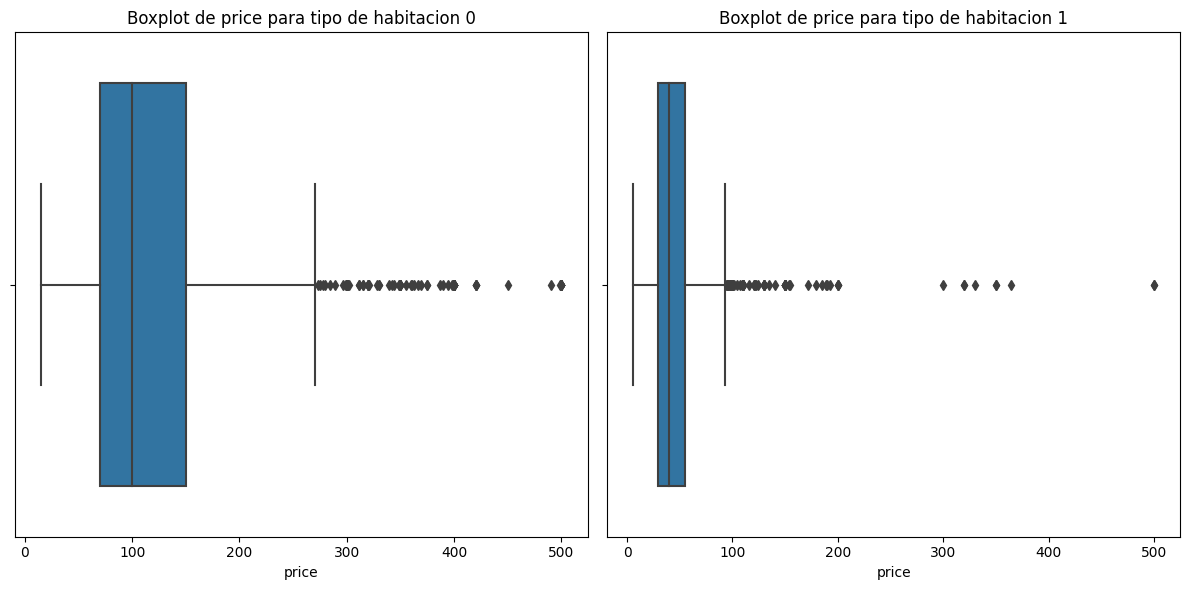

In [ ]:
grafico_outliers(df_hapt, df_proom, 'price')

Como vemos, existen varios valores fuera de los intervalos de confianza, por lo que se eliminarán aquellos que esten fuera del limite superior

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'price')
df_proom = filtro_outliers(df_proom, 'price')

el rango intercuartil es 80.0
el limite superior es  270.0 
 el limite inferior es -50.0 

el rango intercuartil es 26.0
el limite superior es  94.0 
 el limite inferior es -10.0 



### Identificar outliers en columna "bedrooms"

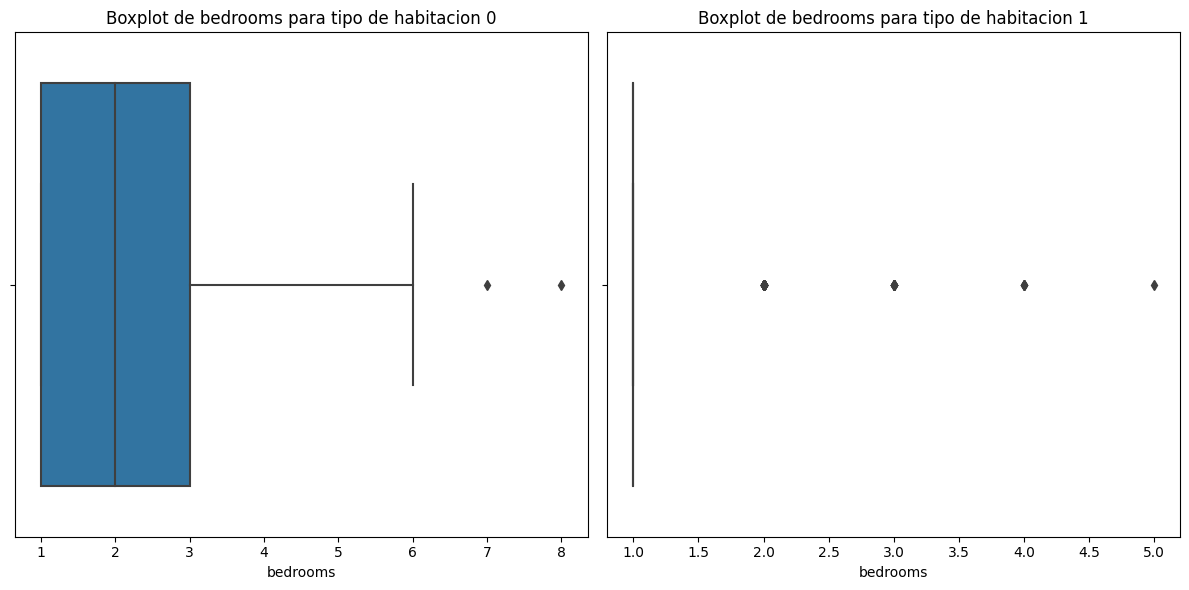

In [ ]:
grafico_outliers(df_hapt, df_proom, 'bedrooms')

Como vemos, los alojamientos de tipo 'Entire home/apt' con aproximadamente más de 6 dormitorios entran a la categoria de outliers, por lo que eliminaremos las valores que contengan estos valores y los dejaremos como NaN.

En el caso de los de tipo 'Private room', todos los mayores a 1 entran en categoria de *outliers*





In [ ]:
df_hapt = filtro_outliers(df_hapt, 'bedrooms')
df_proom= filtro_outliers(df_proom, 'bedrooms')

el rango intercuartil es 2.0
el limite superior es  6.0 
 el limite inferior es -2.0 

el rango intercuartil es 0.0
el limite superior es  1.0 
 el limite inferior es 1.0 



### Identificar outliers en columna "beds"

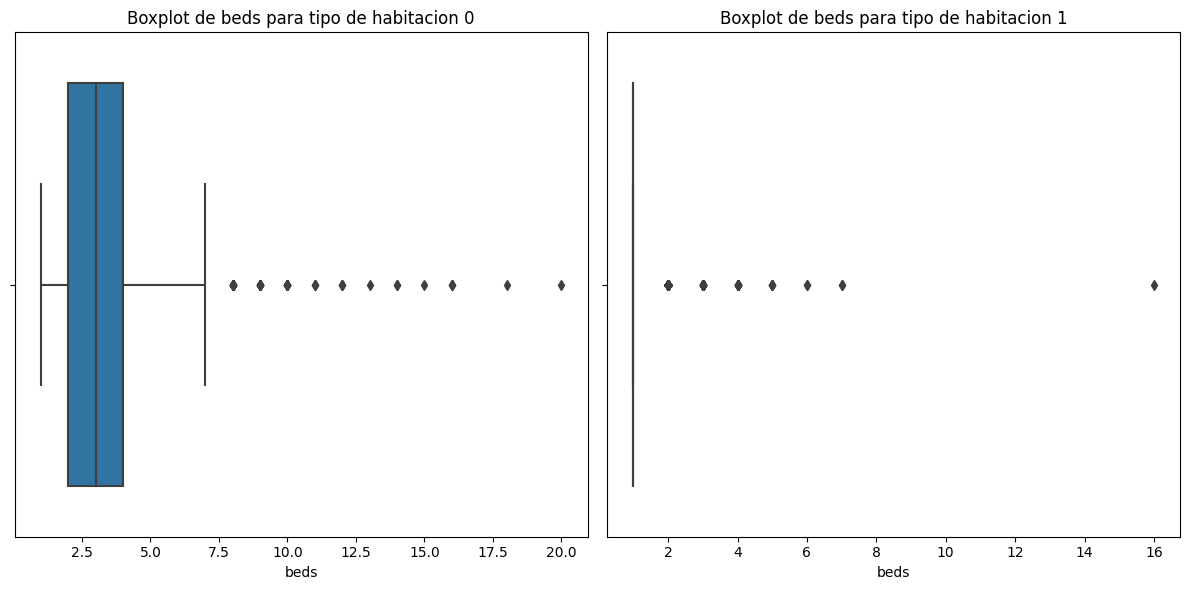

In [ ]:
grafico_outliers(df_hapt, df_proom, 'beds')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'beds')
df_proom= filtro_outliers(df_proom, 'beds')

el rango intercuartil es 2.0
el limite superior es  7.0 
 el limite inferior es -1.0 

el rango intercuartil es 0.0
el limite superior es  1.0 
 el limite inferior es 1.0 



### Identificar outliers en columna "accommodates"

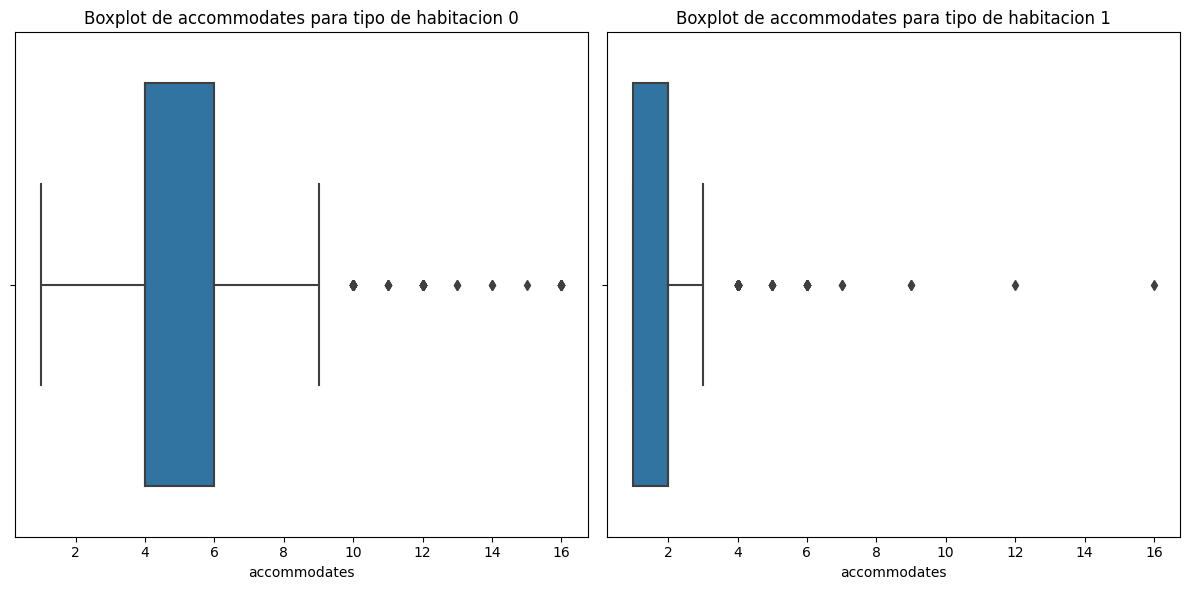

In [ ]:
grafico_outliers(df_hapt, df_proom, 'accommodates')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'accommodates')
df_proom= filtro_outliers(df_proom, 'accommodates')

el rango intercuartil es 2.0
el limite superior es  9.0 
 el limite inferior es 1.0 

el rango intercuartil es 1.0
el limite superior es  3.5 
 el limite inferior es -0.5 



### Identificar outliers en columna "cant_comodidades"

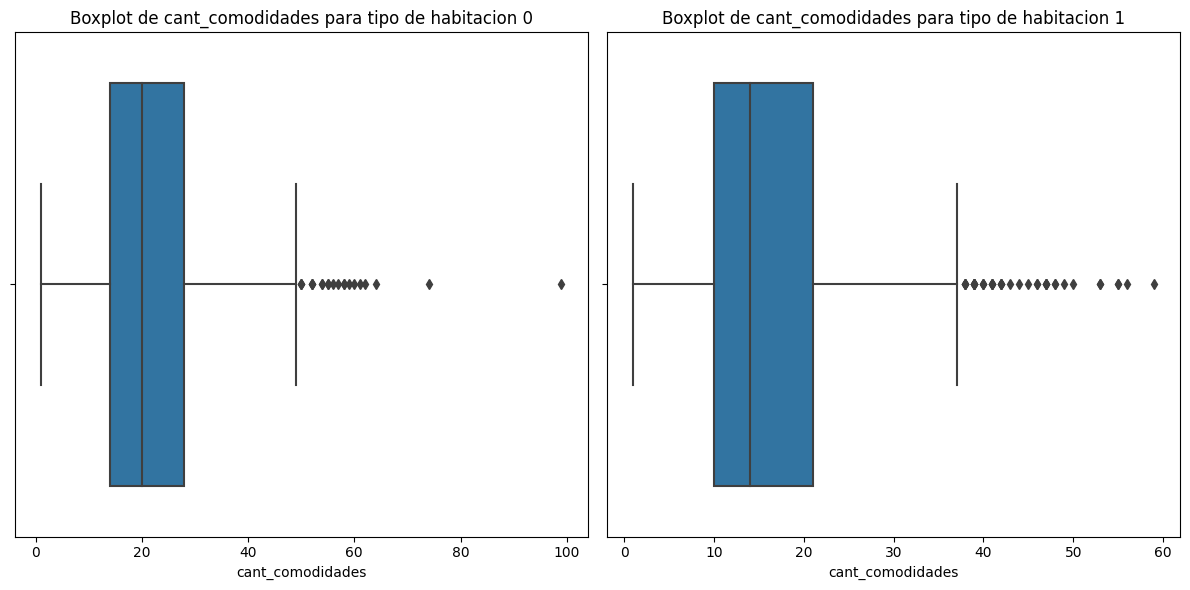

In [ ]:
grafico_outliers(df_hapt, df_proom, 'cant_comodidades')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'cant_comodidades')
df_proom= filtro_outliers(df_proom, 'cant_comodidades')

el rango intercuartil es 14.0
el limite superior es  49.0 
 el limite inferior es -7.0 

el rango intercuartil es 11.0
el limite superior es  37.5 
 el limite inferior es -6.5 



### Identificar outliers en columna "bathrooms"

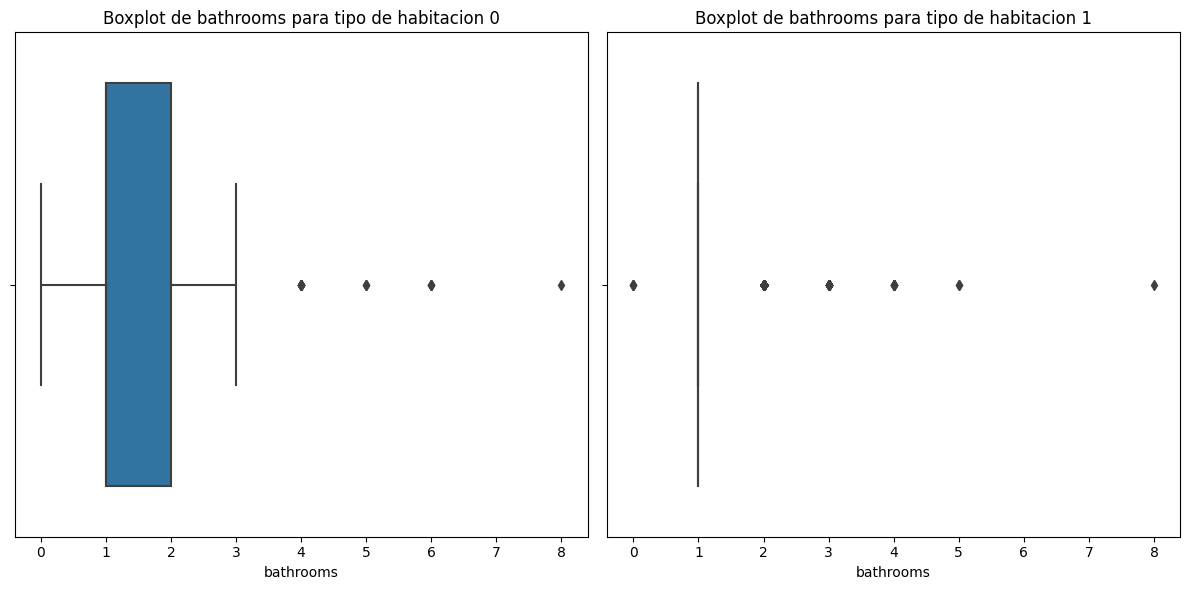

In [ ]:
grafico_outliers(df_hapt, df_proom, 'bathrooms')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'bathrooms')
df_proom= filtro_outliers(df_proom, 'bathrooms')

el rango intercuartil es 1.0
el limite superior es  3.5 
 el limite inferior es -0.5 

el rango intercuartil es 0.0
el limite superior es  1.0 
 el limite inferior es 1.0 



### Identificar outliers en columna "minimum_nights"

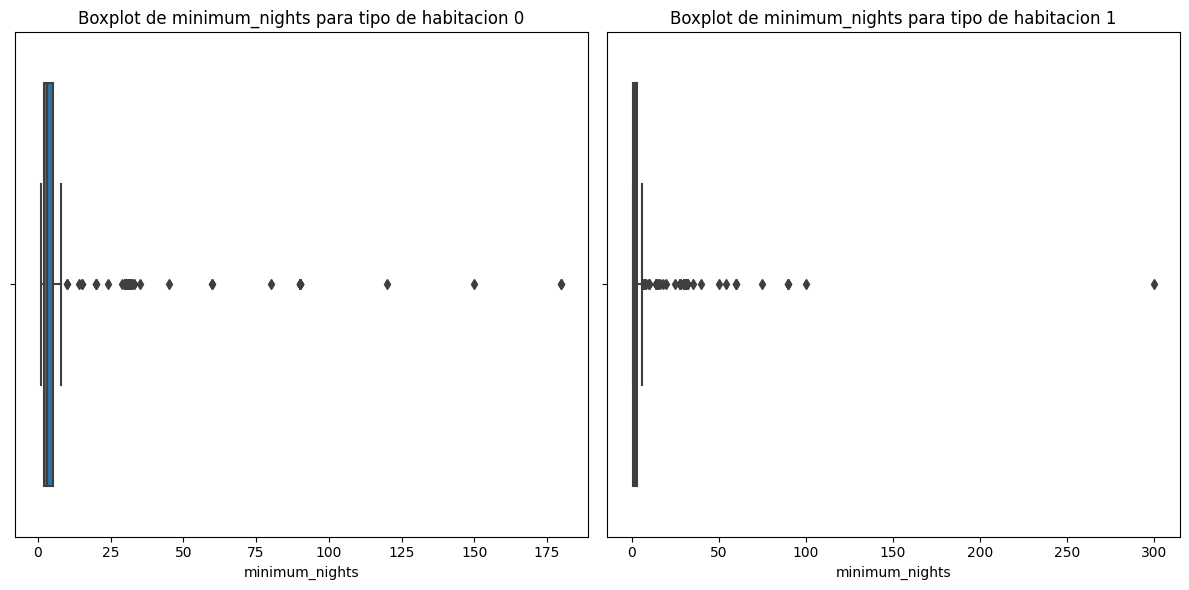

In [ ]:
grafico_outliers(df_hapt, df_proom, 'minimum_nights')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'minimum_nights')
df_proom= filtro_outliers(df_proom, 'minimum_nights')

el rango intercuartil es 3.0
el limite superior es  9.5 
 el limite inferior es -2.5 

el rango intercuartil es 2.0
el limite superior es  6.0 
 el limite inferior es -2.0 



### Identificar outliers en columna "maximum_nights"

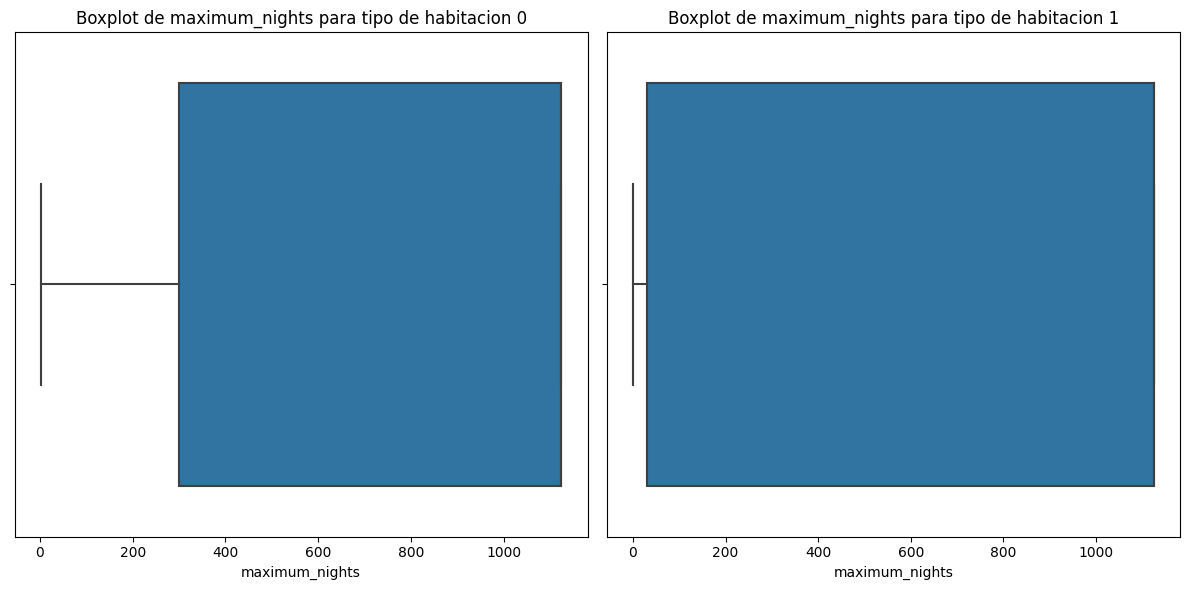

In [ ]:
grafico_outliers(df_hapt, df_proom, 'maximum_nights')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'maximum_nights')
df_proom= filtro_outliers(df_proom, 'maximum_nights')

el rango intercuartil es 825.0
el limite superior es  2362.5 
 el limite inferior es -937.5 

el rango intercuartil es 1095.0
el limite superior es  2767.5 
 el limite inferior es -1612.5 



### Identificar outliers en columna "availability_30"

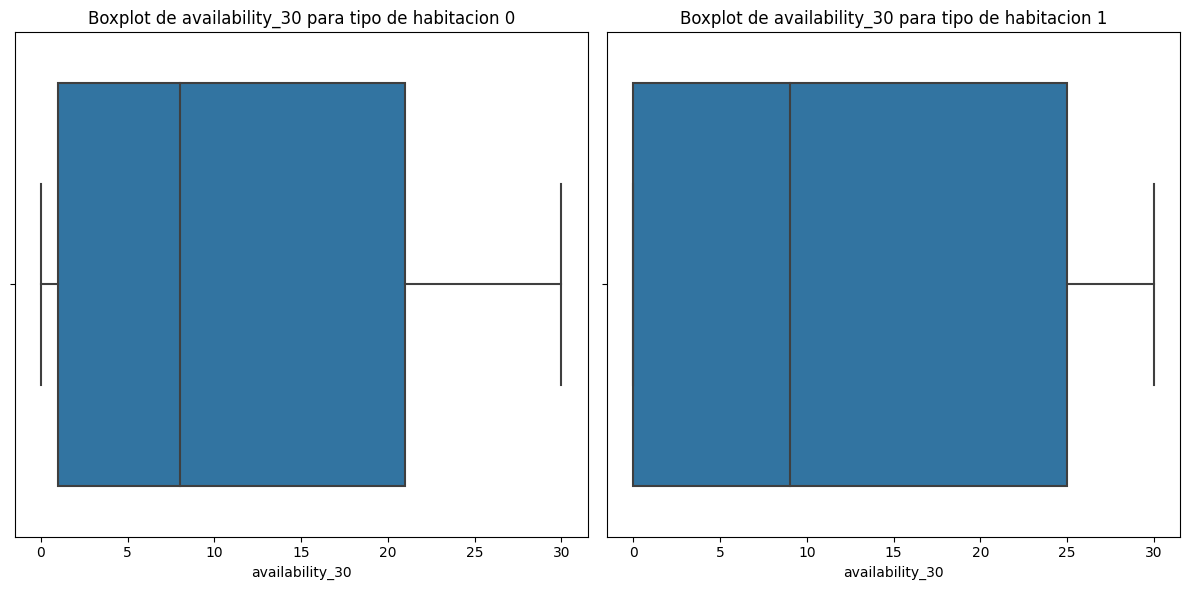

In [ ]:
grafico_outliers(df_hapt, df_proom, 'availability_30')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'availability_30')
df_proom= filtro_outliers(df_proom, 'availability_30')

el rango intercuartil es 20.0
el limite superior es  51.0 
 el limite inferior es -29.0 

el rango intercuartil es 25.0
el limite superior es  62.5 
 el limite inferior es -37.5 



### Identificar outliers en columna "availability_60"

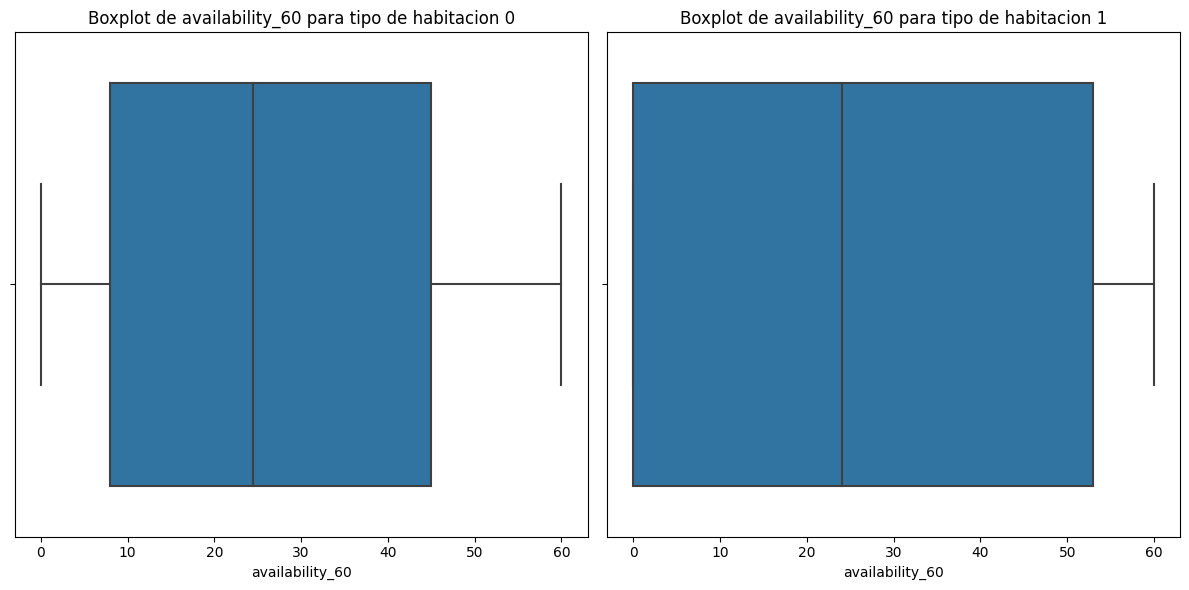

In [ ]:
grafico_outliers(df_hapt, df_proom, 'availability_60')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'availability_60')
df_proom= filtro_outliers(df_proom, 'availability_60')

el rango intercuartil es 37.0
el limite superior es  100.5 
 el limite inferior es -47.5 

el rango intercuartil es 53.0
el limite superior es  132.5 
 el limite inferior es -79.5 



### Identificar outliers en columna "availability_90"

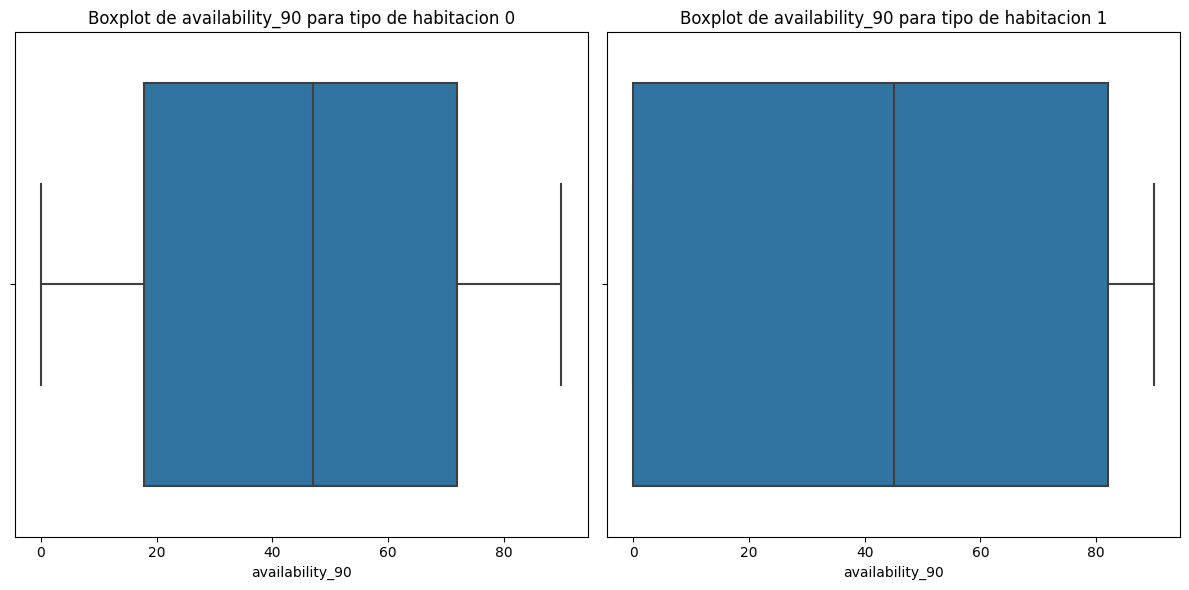

In [ ]:
grafico_outliers(df_hapt, df_proom, 'availability_90')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'availability_90')
df_proom= filtro_outliers(df_proom, 'availability_90')

el rango intercuartil es 54.25
el limite superior es  153.375 
 el limite inferior es -63.625 

el rango intercuartil es 82.0
el limite superior es  205.0 
 el limite inferior es -123.0 



### Identificar outliers en columna "availability_365"

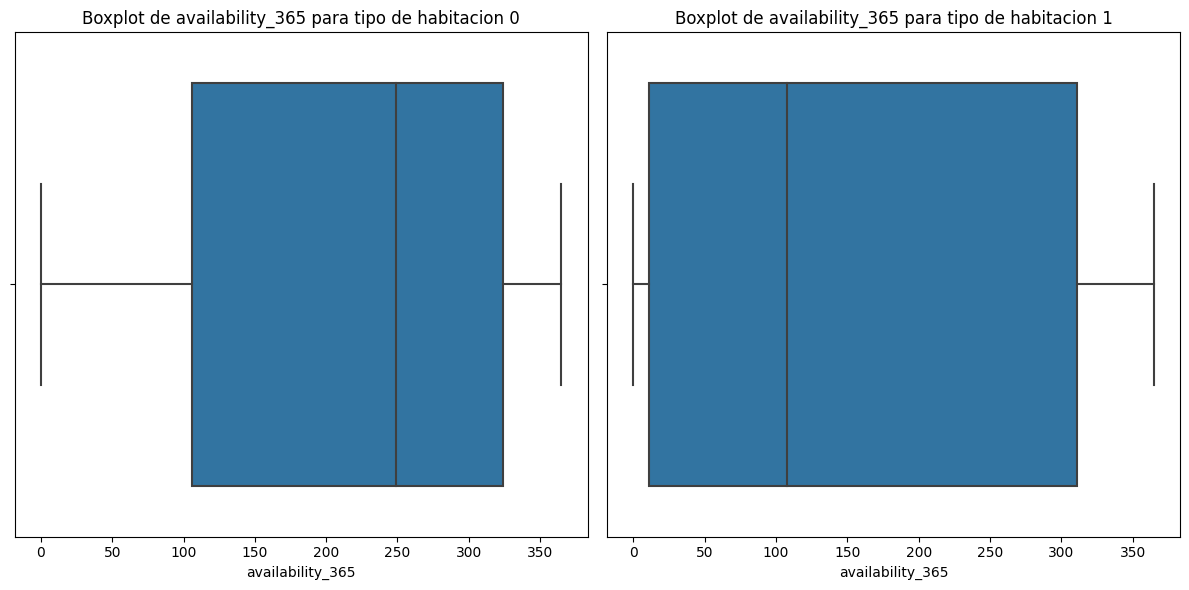

In [ ]:
grafico_outliers(df_hapt, df_proom, 'availability_365')

In [ ]:
df_hapt = filtro_outliers(df_hapt, 'availability_365')
df_proom= filtro_outliers(df_proom, 'availability_365')

el rango intercuartil es 218.25
el limite superior es  651.375 
 el limite inferior es -221.625 

el rango intercuartil es 299.75
el limite superior es  760.375 
 el limite inferior es -438.625 



## Tratar datos nulos


Vemos el total de filas en cada df

In [ ]:
print('Numero de filas en df de Entire home/apt', df_hapt.shape[0])
print('Numero de filas en df de Private room', df_proom.shape[0])

Numero de filas en df de Entire home/apt 1236
Numero de filas en df de Private room 1442


Puesto que solo se eliminaron los valores atipicos (si castigar la fila completa) quedamos con varios nulos que deben ser tratados

In [ ]:
#Ahora revisamos como quedaron nuestros dfs con respecto a los valores nulos
nulos_hapt = pd.DataFrame({'Cantidad de nulos' : df_hapt.isnull().sum(), 'Porcentaje' : (df_hapt.isnull().sum()) / (len(df)) * (100)})
nulos_proom = pd.DataFrame({'Cantidad de nulos' : df_proom.isnull().sum(), 'Porcentaje' : (df_proom.isnull().sum()) / (len(df)) * (100)})
print(nulos_hapt, "\n", "\n", "El total de nulos en el Dataframe de Entire home/apt es:", nulos_hapt["Cantidad de nulos"].sum(), "\n", "\n")
print(nulos_proom, "\n", "\n", "El total de nulos en el Dataframe de Private room es:", nulos_proom["Cantidad de nulos"].sum())

                     Cantidad de nulos  Porcentaje
price                              127    4.742345
latitude                             0    0.000000
longitude                            0    0.000000
cant_comodidades                    21    0.784167
accommodates                        61    2.277819
bathrooms                           49    1.829724
bedrooms                            11    0.410754
beds                                56    2.091113
minimum_nights                     264    9.858103
maximum_nights                       0    0.000000
availability_30                      0    0.000000
availability_60                      0    0.000000
availability_90                      0    0.000000
availability_365                     0    0.000000
is_instant_bookable                  0    0.000000
room_type                            0    0.000000 
 
 El total de nulos en el Dataframe de Entire home/apt es: 589 
 

                     Cantidad de nulos  Porcentaje
price        

Como vemos, en el df de Entire home/apt la columna con más nulos es 'minimum_nights' sin embargo es un porcentaje bajo con respecto al total de datos, por lo que no se eliminará (menor al 15% del total de los datos)

En el caso del df de Private room, las columnas con más nulos son 'beds' y 'bathrooms', sin embargo, ambas están por debajo del 15% de nulos con respecto al total de datos, por lo que tambien se mantienen en el df.


In [ ]:
#Vamos a identificar los tipos de datos de cada columna
print(df_hapt.dtypes, "\n", "\n", df_proom.dtypes)


price                  float64
latitude               float64
longitude              float64
cant_comodidades       float64
accommodates           float64
bathrooms              float64
bedrooms               float64
beds                   float64
minimum_nights         float64
maximum_nights           int64
availability_30          int64
availability_60          int64
availability_90          int64
availability_365         int64
is_instant_bookable      uint8
room_type                uint8
dtype: object 
 
 price                  float64
latitude               float64
longitude              float64
cant_comodidades       float64
accommodates           float64
bathrooms              float64
bedrooms               float64
beds                   float64
minimum_nights         float64
maximum_nights           int64
availability_30          int64
availability_60          int64
availability_90          int64
availability_365         int64
is_instant_bookable      uint8
room_type            

al estar en formato numerico nuestras variables podremos obtener la mediana, la cual se utilizará para reemplazar los datos nulos, puesto que al no tener una distribución simetrica, la mediana es la mejor opción.

In [ ]:
#Creamos una etiqueta con las columnas que tienen nulos
col_con_nulos = ['price', 'accommodates', "cant_comodidades",'bathrooms','bedrooms','beds', 'minimum_nights']

#Creamos una funcion que rellene los nulos segun el df que sea puesto como argumento
def fill_nulos (df):
  #Creamos un ciclo for para que se repita el codigo por cada una de las variables con nulos
  for i in col_con_nulos:
    df[i].fillna(df[i].median().round(0), inplace = True)

In [ ]:
fill_nulos(df_hapt)
fill_nulos(df_proom)

In [ ]:
#Revisamos nuevamente los valores nulos
nulos_hapt = pd.DataFrame({'Cantidad de nulos' : df_hapt.isnull().sum(), 'Porcentaje' : (df_hapt.isnull().sum()) / (len(df)) * (100)})
nulos_proom = pd.DataFrame({'Cantidad de nulos' : df_proom.isnull().sum(), 'Porcentaje' : (df_proom.isnull().sum()) / (len(df)) * (100)})
print(nulos_hapt, "\n", "\n", "El total de nulos en el Dataframe de Entire home/apt es:", nulos_hapt["Cantidad de nulos"].sum(), "\n", "\n")
print(nulos_proom, "\n", "\n", "El total de nulos en el Dataframe de Private room es:", nulos_proom["Cantidad de nulos"].sum())

                     Cantidad de nulos  Porcentaje
price                                0         0.0
latitude                             0         0.0
longitude                            0         0.0
cant_comodidades                     0         0.0
accommodates                         0         0.0
bathrooms                            0         0.0
bedrooms                             0         0.0
beds                                 0         0.0
minimum_nights                       0         0.0
maximum_nights                       0         0.0
availability_30                      0         0.0
availability_60                      0         0.0
availability_90                      0         0.0
availability_365                     0         0.0
is_instant_bookable                  0         0.0
room_type                            0         0.0 
 
 El total de nulos en el Dataframe de Entire home/apt es: 0 
 

                     Cantidad de nulos  Porcentaje
price          

In [ ]:
#concatenamos los dfs para unirlos
df = pd.concat([df_hapt, df_proom])

#Reseteamos los indices
df.reset_index(drop=True, inplace=True)

In [ ]:
#un vistazo al df libre de nulos
df.head()

price   latitude  longitude  cant_comodidades  accommodates  bathrooms  \
0   71.0  41.383040   2.181150              40.0           6.0        2.0   
1  155.0  41.414984   2.144910              19.0           6.0        1.0   
2  136.0  41.375366   2.160923              16.0           5.0        2.0   
3   50.0  41.373842   2.161514              27.0           4.0        1.0   
4   60.0  41.372774   2.146547              24.0           6.0        1.0   

   bedrooms  beds  minimum_nights  maximum_nights  availability_30  \
0       2.0   4.0             2.0            1125                0   
1       3.0   5.0             3.0            1125                3   
2       2.0   3.0             2.0            1125               10   
3       2.0   3.0             3.0              30                5   
4       3.0   3.0             7.0             365                1   

   availability_60  availability_90  availability_365  is_instant_bookable  \
0                0                0               251                    1   
1                7               12               270                    1   
2               23               44               315                    1   
3               11               27               100                    0   
4                5               35               108                    0   

   room_type  
0          0  
1          0  
2          0  
3          0  
4          0

In [ ]:
#vemos el tamaño final de nuestra base de datos sin nulos
print("el número de filas de nuestro df es", df.shape[0])
print("y el número de columnas de nuestro df es", df.shape[1])

el número de filas de nuestro df es 2678
y el número de columnas de nuestro df es 16


Con los datos limpios, utilizamos un gráfico de correlación para ver si existe una correlación entre variables que no son el target, es decir, si exite una multicolinealidad entre las variables independientes

In [ ]:
#generamos un df sin la variabe target ('price')
df_corr = df.drop(columns='price')

In [ ]:
#Generamos la matriz de correlación entre todas las variables para verificar cual o cuales son las que tienen una mayor relación con el target ("price")
matriz= df_corr.corr()
matriz
#se utiliza spearman ya que funciona tanto para variables numéricas lineales como no lineales.

latitude  longitude  cant_comodidades  accommodates  \
latitude             1.000000   0.297157          0.025905     -0.018074   
longitude            0.297157   1.000000         -0.002773      0.007022   
cant_comodidades     0.025905  -0.002773          1.000000      0.283137   
accommodates        -0.018074   0.007022          0.283137      1.000000   
bathrooms           -0.018539  -0.014594          0.187617      0.542475   
bedrooms            -0.020113  -0.027909          0.248968      0.766735   
beds                -0.027003  -0.020473          0.270445      0.852434   
minimum_nights       0.012790  -0.006042          0.034084      0.118142   
maximum_nights      -0.022685  -0.023209         -0.029139      0.063664   
availability_30      0.022587   0.037888          0.047518      0.011353   
availability_60      0.003020   0.029128          0.065914      0.036109   
availability_90      0.000853   0.028366          0.085139      0.053983   
availability_365     0.004462  -0.016064          0.130583      0.228621   
is_instant_bookable -0.015012  -0.032364          0.147590      0.137654   
room_type            0.061627   0.004212         -0.306545     -0.766781   

                     bathrooms  bedrooms      beds  minimum_nights  \
latitude             -0.018539 -0.020113 -0.027003        0.012790   
longitude            -0.014594 -0.027909 -0.020473       -0.006042   
cant_comodidades      0.187617  0.248968  0.270445        0.034084   
accommodates          0.542475  0.766735  0.852434        0.118142   
bathrooms             1.000000  0.623236  0.560334        0.068502   
bedrooms              0.623236  1.000000  0.815167        0.131348   
beds                  0.560334  0.815167  1.000000        0.122844   
minimum_nights        0.068502  0.131348  0.122844        1.000000   
maximum_nights        0.016279  0.049830  0.058271       -0.104868   
availability_30       0.016246  0.000988  0.003573       -0.086504   
availability_60       0.020702  0.012981  0.022876       -0.077223   
availability_90       0.014852  0.021930  0.034371       -0.079933   
availability_365      0.136493  0.185857  0.214425       -0.068504   
is_instant_bookable   0.071695  0.078278  0.119641       -0.082634   
room_type            -0.445480 -0.636006 -0.704892       -0.166080   

                     maximum_nights  availability_30  availability_60  \
latitude                  -0.022685         0.022587         0.003020   
longitude                 -0.023209         0.037888         0.029128   
cant_comodidades          -0.029139         0.047518         0.065914   
accommodates               0.063664         0.011353         0.036109   
bathrooms                  0.016279         0.016246         0.020702   
bedrooms                   0.049830         0.000988         0.012981   
beds                       0.058271         0.003573         0.022876   
minimum_nights            -0.104868        -0.086504        -0.077223   
maximum_nights             1.000000         0.023039         0.035244   
availability_30            0.023039         1.000000         0.933163   
availability_60            0.035244         0.933163         1.000000   
availability_90            0.046127         0.862940         0.968916   
availability_365           0.102085         0.479903         0.558062   
is_instant_bookable        0.033086        -0.016532         0.001804   
room_type                 -0.074991         0.031958         0.005081   

                     availability_90  availability_365  is_instant_bookable  \
latitude                    0.000853          0.004462            -0.015012   
longitude                   0.028366         -0.016064            -0.032364   
cant_comodidades            0.085139          0.130583             0.147590   
accommodates                0.053983          0.228621             0.137654   
bathrooms                   0.014852          0.136493             0.071695   
bedrooms                    0.021930    

<Axes: >

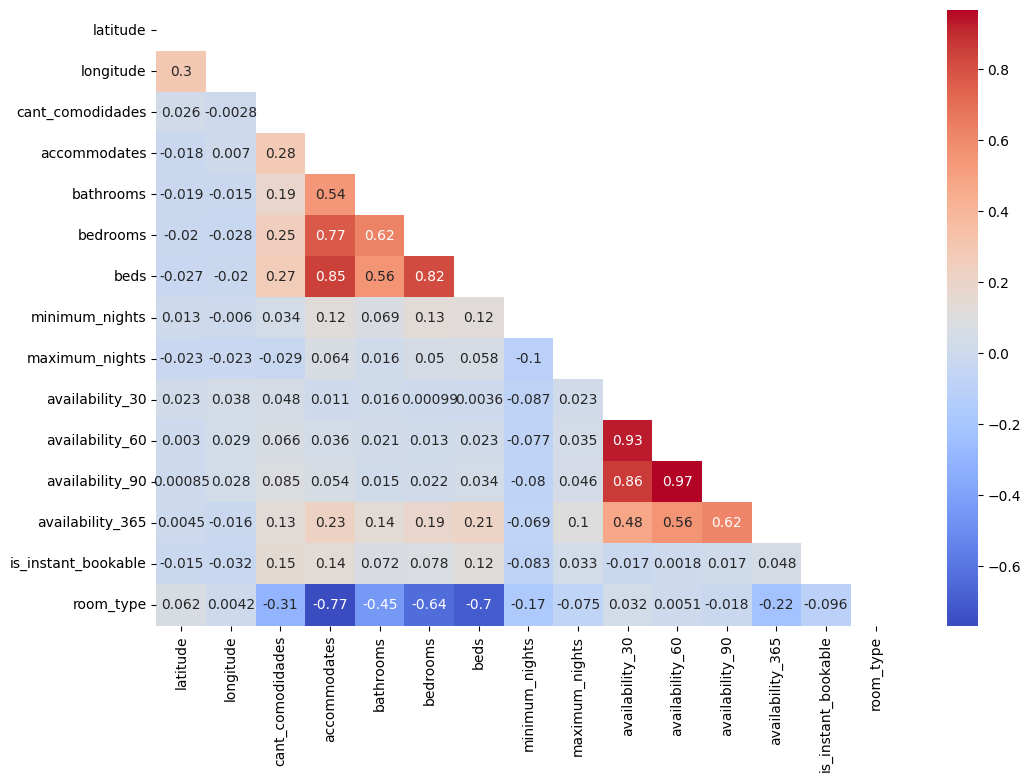

In [ ]:
#graficamos la matriz
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(matriz, dtype=bool))
sns.heatmap(matriz, annot=True, cmap='coolwarm', mask=mask)


Como vemos, existe una alta correlación entre variables: availability_30-availability_60, availability_30-availability_90; beds-accommodates y beds-bedrooms por lo que eliminamos las columas availability_90, availability_60 y beds

In [ ]:
df = df.drop(columns=['availability_60', 'availability_90', 'beds'])

In [ ]:
df.head()

price   latitude  longitude  cant_comodidades  accommodates  bathrooms  \
0   71.0  41.383040   2.181150              40.0           6.0        2.0   
1  155.0  41.414984   2.144910              19.0           6.0        1.0   
2  136.0  41.375366   2.160923              16.0           5.0        2.0   
3   50.0  41.373842   2.161514              27.0           4.0        1.0   
4   60.0  41.372774   2.146547              24.0           6.0        1.0   

   bedrooms  minimum_nights  maximum_nights  availability_30  \
0       2.0             2.0            1125                0   
1       3.0             3.0            1125                3   
2       2.0             2.0            1125               10   
3       2.0             3.0              30                5   
4       3.0             7.0             365                1   

   availability_365  is_instant_bookable  room_type  
0               251                    1          0  
1               270                    1          0  
2               315                    1          0  
3               100                    0          0  
4               108                    0          0

In [ ]:
#Para evitar variabilidad y no dificultar el modelo, eliminaremos las columnas 'latitude' y 'longitude'
var = ['latitude', 'longitude']
df = df.drop(columns=var)
df.head()

price  cant_comodidades  accommodates  bathrooms  bedrooms  minimum_nights  \
0   71.0              40.0           6.0        2.0       2.0             2.0   
1  155.0              19.0           6.0        1.0       3.0             3.0   
2  136.0              16.0           5.0        2.0       2.0             2.0   
3   50.0              27.0           4.0        1.0       2.0             3.0   
4   60.0              24.0           6.0        1.0       3.0             7.0   

   maximum_nights  availability_30  availability_365  is_instant_bookable  \
0            1125                0               251                    1   
1            1125                3               270                    1   
2            1125               10               315                    1   
3              30                5               100                    0   
4             365                1               108                    0   

   room_type  
0          0  
1          0  
2          0  
3          0  
4          0

# EDA post Data Wrangling

##  Correlaciones

In [ ]:
#Generamos la matriz de correlación entre todas las variables para verificar cual o cuales son las que tienen una mayor relación con el target ("price")
matriz= df.corr()
matriz

price  cant_comodidades  accommodates  bathrooms  \
price                1.000000          0.233677      0.642600   0.478563   
cant_comodidades     0.233677          1.000000      0.283137   0.187617   
accommodates         0.642600          0.283137      1.000000   0.542475   
bathrooms            0.478563          0.187617      0.542475   1.000000   
bedrooms             0.571216          0.248968      0.766735   0.623236   
minimum_nights       0.130899          0.034084      0.118142   0.068502   
maximum_nights       0.036848         -0.029139      0.063664   0.016279   
availability_30      0.042819          0.047518      0.011353   0.016246   
availability_365     0.188521          0.130583      0.228621   0.136493   
is_instant_bookable  0.098713          0.147590      0.137654   0.071695   
room_type           -0.679175         -0.306545     -0.766781  -0.445480   

                     bedrooms  minimum_nights  maximum_nights  \
price                0.571216        0.130899        0.036848   
cant_comodidades     0.248968        0.034084       -0.029139   
accommodates         0.766735        0.118142        0.063664   
bathrooms            0.623236        0.068502        0.016279   
bedrooms             1.000000        0.131348        0.049830   
minimum_nights       0.131348        1.000000       -0.104868   
maximum_nights       0.049830       -0.104868        1.000000   
availability_30      0.000988       -0.086504        0.023039   
availability_365     0.185857       -0.068504        0.102085   
is_instant_bookable  0.078278       -0.082634        0.033086   
room_type           -0.636006       -0.166080       -0.074991   

                     availability_30  availability_365  is_instant_bookable  \
price                       0.042819          0.188521             0.098713   
cant_comodidades            0.047518          0.130583             0.147590   
accommodates                0.011353          0.228621             0.137654   
bathrooms                   0.016246          0.136493             0.071695   
bedrooms                    0.000988          0.185857             0.078278   
minimum_nights             -0.086504         -0.068504            -0.082634   
maximum_nights              0.023039          0.102085             0.033086   
availability_30             1.000000          0.479903            -0.016532   
availability_365            0.479903          1.000000             0.048084   
is_instant_bookable        -0.016532          0.048084             1.000000   
room_type                   0.031958         -0.218641            -0.095671   

                     room_type  
price                -0.679175  
cant_comodidades     -0.306545  
accommodates         -0.766781  
bathrooms            -0.445480  
bedrooms             -0.636006  
minimum_nights       -0.166080  
maximum_nights       -0.074991  
availability_30       0.031958  
availability_365     -0.218641  
is_instant_bookable  -0.095671  
room_type             1.000000

<Axes: >

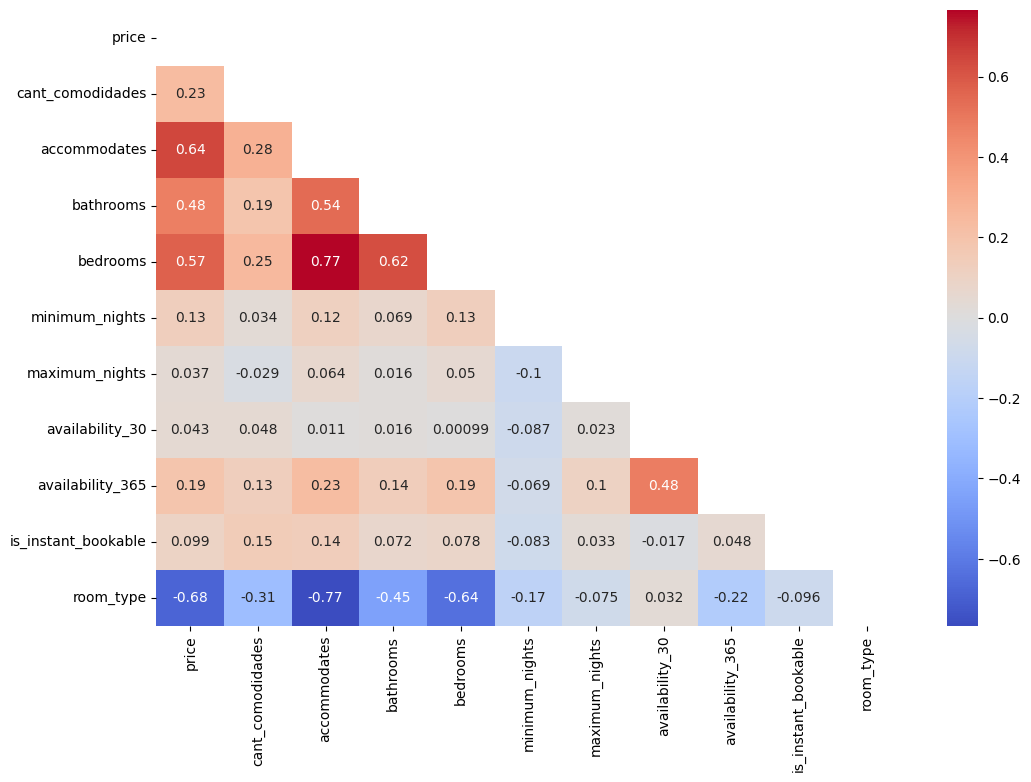

In [ ]:
#graficamos la matriz
plt.figure(figsize=(12,8))
mask = np.triu(np.ones_like(matriz, dtype=bool))
sns.heatmap(matriz, annot=True, cmap='coolwarm', mask=mask)


Como vemos, la variable "price" no está altamente correlacionada con ninguna de las variables. Sin embargo, tiene una mayor correlación con la variable "room_type" (-0.68) Por otro lado, vemos de manera logica, que la variable "accommodates" o capacidad de personas, está altamente correlacionada a la variable "bedrooms"(0.77) y a la variable 'room_type' (-0.77)

Respondiendo a las hipotesis de interes tenemos que si se reafirma la primera, es decir, existe una correlación positiva entre la cantidad de personas admitidas (accommodates) y el precio (price).
La segunda hipotesis de interes tambien se afirma ya que si bien no es alta, existe una correlación positiva entre el numero de dormitorios (bedrooms) y el precio del alojamiento.

## Respuestas al problema comercial

### Tipo de alojamiento más y menos costoso

In [ ]:
# Creamos un diccionario de mapeo para las etiquetas de la leyenda
room_type_labels = {0: ' Entire home/apt', 1: ' Private room'}

# Convertimos el resultado en un DataFrame
df_room_price = df.groupby('room_type')['price'].mean().reset_index()
df_room_price['room_type'] = df_room_price['room_type'].map(room_type_labels)

# Creamos el gráfico
fig = px.bar(
    x=df_room_price.room_type,
    y=df_room_price.price,
    labels={'x': 'Tipo de Alojamiento', 'y': 'Precio promedio'},
    title="Precio promedio por cada tipo de alojamiento"
)

fig.update_layout(showlegend=True)
fig.show()

Como vemos en el gráfico, y siguiendo la lógica, el alojamiento más costoso en la ciudad de "barcelona" es el de tipo "Entire home/apt" costando en promedio 90.3 Euros. Por el otro lado, la habitación privada o "Private room" es la menos costosa, teniendo un valor promedio de 45 Euros

### Capacidad máx. de personas admitidas y frecuencia

In [ ]:
#filtramos solo por alojamientos de tipo "Private room"
alojamientos_proom = df[df['room_type'] == 1]

# Calcular la frecuencia de cada cantidad de personas permitidas en alojamientos de tipo "Private room"
frecuencia_personas_proom = alojamientos_proom['accommodates'].value_counts()

#Generamos un nuevo df con estos datos
df_frecuencia = pd.DataFrame({'Cant_personas': frecuencia_personas_proom.index,
                              'Frecuencia': frecuencia_personas_proom.values})

fig = px.bar(x=df_frecuencia.Cant_personas, y=df_frecuencia.Frecuencia,labels={'x': 'Personas admitidas', 'y': 'Frecuencia'},)
fig.update_xaxes(title_text="Cantidad de personas admitidas")
fig.update_yaxes(title_text="Frecuencia")
fig.update_layout(title="Capacidad de personas en alojamientos de tipo Private room")
fig.show()

Según este gráfico, vemos que los tipos de alojamiento "Private room" tienen una capacidad máxima de 7 personas en la ciudad de "barcelona", sin embargo esta capacidad tiene una frecuencia mínima (alrededor de 1-2 alojamientos de este tipo permite 7 personas), sin embargo, la capacidad de personas más popular en este tipo de alojamientos es de 2 personas, teniendo una frecuencia de 906 alojamientos, seguido de alojamientos de habitación privada que permiten 1 persona, con una frecuencia de 368 alojamientos.

### Alojamiento más popular en Barcelona

In [ ]:
#Creamos un nuevo df para agrupar por tipo de habitación en la ciudad de barcelona
new_df = df.groupby(['room_type']).size()

#convertimos el resultado a df
new_df = pd.DataFrame({'Frecuencia': new_df}).reset_index()

#Mapeamos los valores de 'room_type' a las etiquetas correspondientes
room_type_labels = {0: 'Entire home/apt', 1: 'Private room'}
new_df['room_type'] = new_df['room_type'].map(room_type_labels)

#Graficamos
fig = px.pie(new_df, names='room_type', values='Frecuencia', title=f'Tipos de alojamientos en Barcelona')
fig.show()

Como vemos en el gráfico de torta, la distribución de estos 2 tipos de alojamiento es similar, sin embargo, "Private room" es la más popular en la ciudad con un 53.8% del total (1442 alojamientos turisticos en Barcelona corresponden a "Private room"), por otro lado, "Entire home/apt" tiene un 46.8% del total de alojamientos en la ciudad, abarcando 1236 inmuebles.

### Comparación dormitorios y baños por tipo de habitación

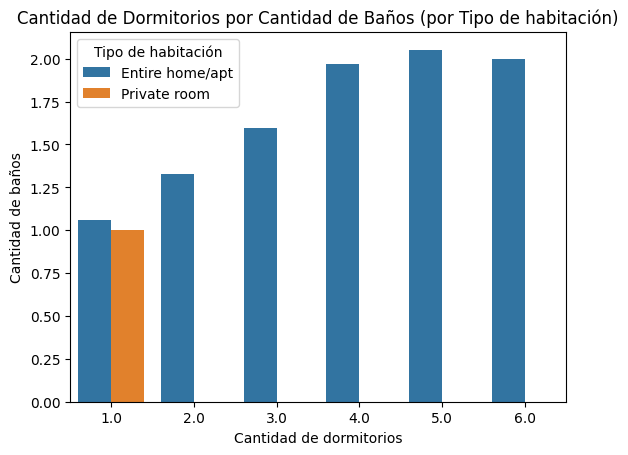

In [ ]:
#Creamos un diccionario para mapear los valores numéricos de 'room_type'
room_type_labels = {0: 'Entire home/apt', 1: 'Private room'}

sns.barplot(data=df, x='bedrooms', y='bathrooms', hue='room_type', errorbar=None)
plt.xlabel('Cantidad de dormitorios')
plt.ylabel('Cantidad de baños')
plt.title('Cantidad de Dormitorios por Cantidad de Baños (por Tipo de habitación)')
plt.legend(title='Tipo de habitación', loc='upper left', labels=[room_type_labels[val] for val in sorted(df['room_type'].unique())])
plt.show()

Como podemos ver, en el caso de contar con 1 o 2 dormitorios, el numero de baños se mantiene casi igual tanto para "Private room" como para "Entire home/apt". Ya, cuando el alojamiento cuenta con 3 dormitorios, el numero de baños aumenta en ambos tipos de alojamiento.

## Respuestas a hipótesis de interes

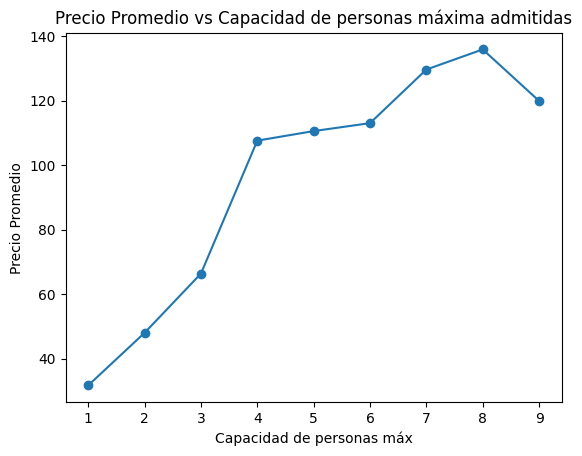

In [ ]:
# Calcular el promedio de precios para cada valor de accommodates
average_prices = df.groupby('accommodates')['price'].mean().reset_index()

# Crear el gráfico de líneas o de barras
plt.plot(average_prices['accommodates'], average_prices['price'], marker='o')
# o bien, utiliza un gráfico de barras: plt.bar(average_prices['accommodates'], average_prices['price'])
plt.title('Precio Promedio vs Capacidad de personas máxima admitidas')
plt.xlabel('Capacidad de personas máx')
plt.ylabel('Precio Promedio')
plt.show()

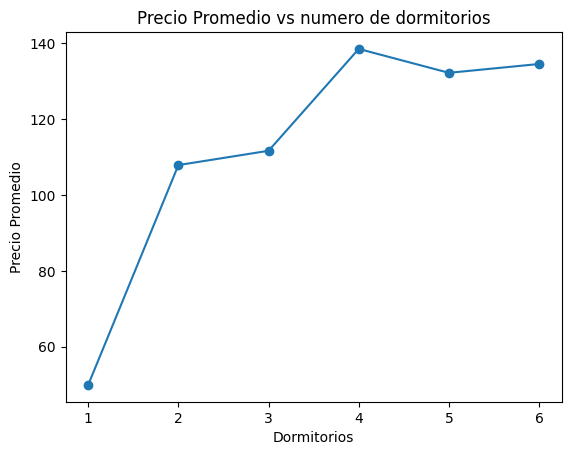

In [ ]:
#Calcular el promedio de precios para cada valor de accommodates
average_prices = df.groupby('bedrooms')['price'].mean().reset_index()

# Crear el gráfico de líneas o de barras
plt.plot(average_prices['bedrooms'], average_prices['price'], marker='o')
# o bien, utiliza un gráfico de barras: plt.bar(average_prices['accommodates'], average_prices['price'])
plt.title('Precio Promedio vs numero de dormitorios')
plt.xlabel('Dormitorios')
plt.ylabel('Precio Promedio')
plt.show()

# Modelo de regresión con variables sin transformar

In [ ]:
df_reg=df.copy()

In [ ]:
df_reg.head()

price  cant_comodidades  accommodates  bathrooms  bedrooms  minimum_nights  \
0   71.0              40.0           6.0        2.0       2.0             2.0   
1  155.0              19.0           6.0        1.0       3.0             3.0   
2  136.0              16.0           5.0        2.0       2.0             2.0   
3   50.0              27.0           4.0        1.0       2.0             3.0   
4   60.0              24.0           6.0        1.0       3.0             7.0   

   maximum_nights  availability_30  availability_365  is_instant_bookable  \
0            1125                0               251                    1   
1            1125                3               270                    1   
2            1125               10               315                    1   
3              30                5               100                    0   
4             365                1               108                    0   

   room_type  
0          0  
1          0  
2          0  
3          0  
4          0

In [ ]:
df_reg.columns

Index(['price', 'cant_comodidades', 'accommodates', 'bathrooms', 'bedrooms',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_365', 'is_instant_bookable', 'room_type'],
      dtype='object')

In [ ]:
#ponemos todas las columnas numericas del df de interes.
x= df_reg[['cant_comodidades', 'accommodates', 'bathrooms', 'bedrooms',
         'minimum_nights','maximum_nights', 'availability_30',
           'availability_365', 'is_instant_bookable', 'room_type']]
y= df_reg['price']

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Regresión lineal

In [ ]:
#Defino el algoritmo a utilizar
modelo_lr = Pipeline([('scaler', RobustScaler()),('features', PolynomialFeatures()),
                    ('regression', LinearRegression(fit_intercept=True))])

hiperparametros={'features__degree':[1,2,3,4]}
grilla=GridSearchCV(modelo_lr,hiperparametros, cv=5,scoring='neg_root_mean_squared_error')
grilla.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'features__degree': [1, 2, 3, 4]},
             scoring='neg_root_mean_squared_error')

In [ ]:
print(grilla.best_params_)

{'features__degree': 1}


In [ ]:
# entrenamos con el mejor modelo
modelo_lineal=grilla.best_estimator_
modelo_lineal.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('features', PolynomialFeatures(degree=1)),
                ('regression', LinearRegression())])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_lineal_testeo = modelo_lineal.predict(x_test)
y_pred_lineal_train = modelo_lineal.predict(x_train)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_lineal = mse(y_train,y_pred_lineal_train)
score_test_modelo_lineal = mse(y_test,y_pred_lineal_testeo)

print ("Train:", score_train_modelo_lineal)
print ("Testeo:", score_test_modelo_lineal)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 1152.0521098214483
Testeo: 1003.8436734353567


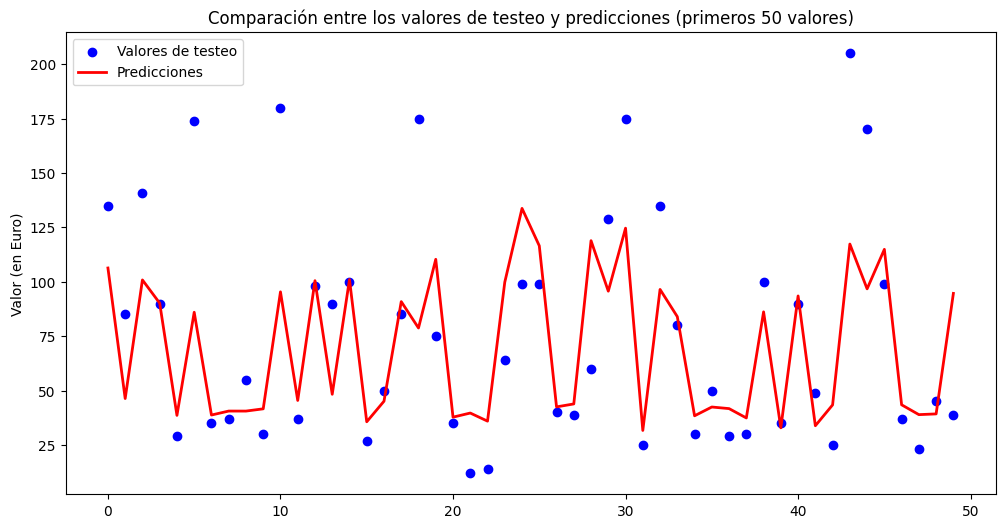

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lineal_testeo
y_test_subset = y_test[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_lineal_testeo[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Valor (en Euro)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

Como vemos, las predicciones están bastante lejos de los valores más altos y bajos de la muestra, pero más cerca de los valores intermedios (entre 40 y 80 euros aproximadamente)

## Regresión Lasso

Se utilizará una regresión de Lasso con un polinomio de grado 2 y un alfa de 1e-05. Con un valor de alpha más pequeño, el valor del score_train disminuye pero el score_testeo aumentaba, por lo que se opta por el alpha = 1e-05 para que el modelo haga predicciones más precisas en datos no vistos. Modificando el valor del polinomio, ocurre algo similar, es decir, el error de train disminuye, pero el del testeo aumenta

In [ ]:
# Definir el modelo de regresión LARS Lasso
modelo_Lars = Pipeline([
    ('scaler', RobustScaler()),
    ('features', PolynomialFeatures()),
    ('model', LassoLars())
])

# Definir la grilla de hiperparámetros
hiperparametros = {'features__degree': [1, 2, 3, 4], 'model__alpha': [1e-05, 1e-04, 1e-03, 1e-02]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
grilla = GridSearchCV(modelo_Lars, hiperparametros, cv=5, scoring='neg_root_mean_squared_error')
grilla.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 12 iterations, i.e. alpha=1.259e+00, with an active set of 6 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=1.238e+00, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=1.185e+00, with an active set of 7 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('model', LassoLars())]),
             param_grid={'features__degree': [1, 2, 3, 4],
                         'model__alpha': [1e-05, 0.0001, 0.001, 0.01]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'features__degree': 1, 'model__alpha': 0.01}


In [ ]:
modelo_lasso=grilla.best_estimator_
modelo_lasso.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('features', PolynomialFeatures(degree=1)),
                ('model', LassoLars(alpha=0.01))])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_lasso_test = modelo_lasso.predict(x_test)
y_pred_lasso_train = modelo_lasso.predict(x_train)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_lasso = mse(y_train,y_pred_lasso_train)
score_test_modelo_lasso = mse(y_test,y_pred_lasso_test)

print ("Train:", score_train_modelo_lasso)
print ("Testeo:", score_test_modelo_lasso)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 1152.0566115791135
Testeo: 1003.8906878935551


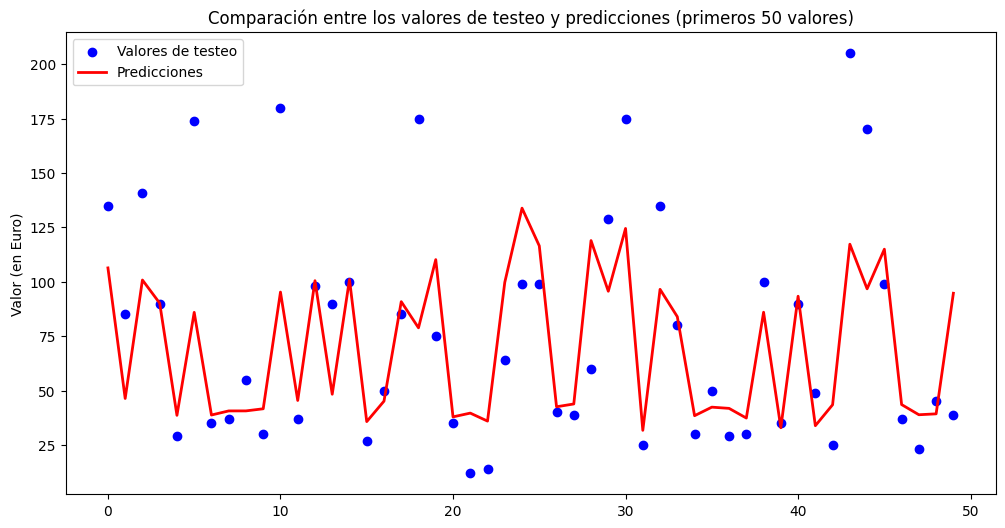

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lasso_test
y_test_subset = y_test[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_lasso_test[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Valor (en Euro)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

Como era esperable, ocurre lo mismo en este modelo de regresión, es decir, las predicciones tienden a asimilarse a los valores de 'price' cuando estos estan entre 40 y 80 euros

## Modelo KNN

Crearemos un modelo de los vecinos más cercanos (KNN) y compararemos su resultado (r2 y RMSE) con lo obtenido en la regresión de Lasso

In [ ]:
model_KNN = Pipeline([
    ('scaler', RobustScaler()),
    ('regression', KNeighborsRegressor())
])

# Definir la grilla de hiperparámetros
hiperparametros = {'regression__n_neighbors': [3, 5, 7, 9, 11]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
grilla = GridSearchCV(model_KNN, hiperparametros, cv=5, scoring='neg_root_mean_squared_error')
grilla.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('regression', KNeighborsRegressor())]),
             param_grid={'regression__n_neighbors': [3, 5, 7, 9, 11]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'regression__n_neighbors': 11}


In [ ]:
modelo_knn=grilla.best_estimator_
modelo_knn.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()),
                ('regression', KNeighborsRegressor(n_neighbors=11))])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_knn_Estandarizado_test = modelo_knn.predict(x_test)
y_pred_knn_Estandarizado_train = modelo_knn.predict(x_train)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_knn = mse(y_train,y_pred_knn_Estandarizado_train)
score_test_modelo_knn = mse(y_test,y_pred_knn_Estandarizado_test)

print ("Train:", score_train_modelo_knn)
print ("Testeo:", score_test_modelo_knn)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 990.0577316325978
Testeo: 1051.9929920577895


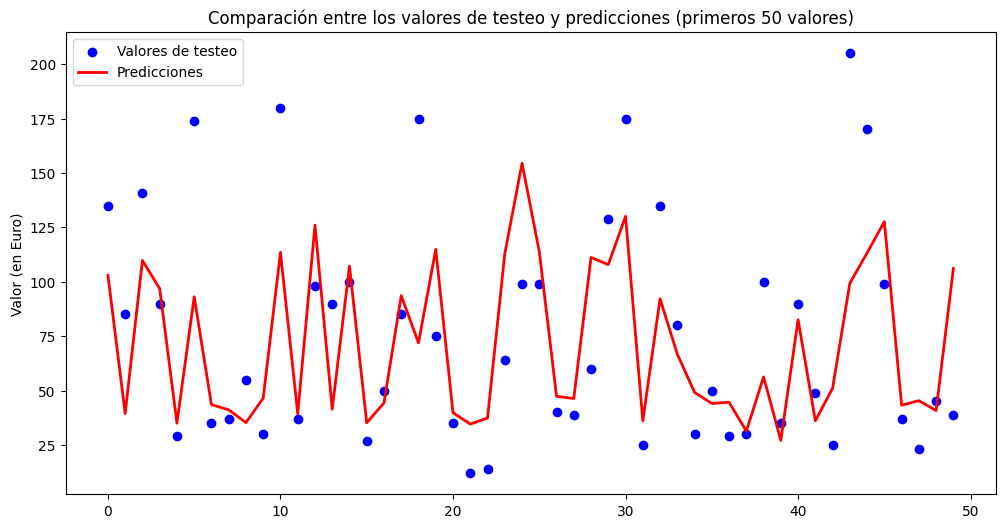

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lasso_test
y_test_subset = y_test[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_knn_Estandarizado_test[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Valor (en Euro)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

## Support Vector Machine

In [ ]:
modelo_svr= Pipeline([('scaler', RobustScaler()),
                  ('modelo',SVR())])

hiperparametros=[{'modelo__C':[1,30],'modelo__kernel':['linear']},{'modelo__gamma':[0.01,0.1], 'modelo__C':[1,30],'modelo__kernel':['rbf']}]

grilla=GridSearchCV(modelo_svr,hiperparametros,refit=True, cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=3)
grilla.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('modelo', SVR())]),
             n_jobs=-1,
             param_grid=[{'modelo__C': [1, 30], 'modelo__kernel': ['linear']},
                         {'modelo__C': [1, 30], 'modelo__gamma': [0.01, 0.1],
                          'modelo__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'modelo__C': 30, 'modelo__gamma': 0.1, 'modelo__kernel': 'rbf'}


In [ ]:
modelo_SVR=grilla.best_estimator_
modelo_SVR.fit(x_train, y_train)

Pipeline(steps=[('scaler', RobustScaler()), ('modelo', SVR(C=30, gamma=0.1))])

In [ ]:
y_pred_SVR_test = modelo_SVR.predict(x_test)
y_pred_SVR_train = modelo_SVR.predict(x_train)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_SVR = mse(y_train,y_pred_SVR_train)
score_test_modelo_SVR = mse(y_test,y_pred_SVR_test)

print ("Train:", score_train_modelo_SVR)
print ("Testeo:", score_test_modelo_SVR)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 1167.6234860098455
Testeo: 1068.2912537289085


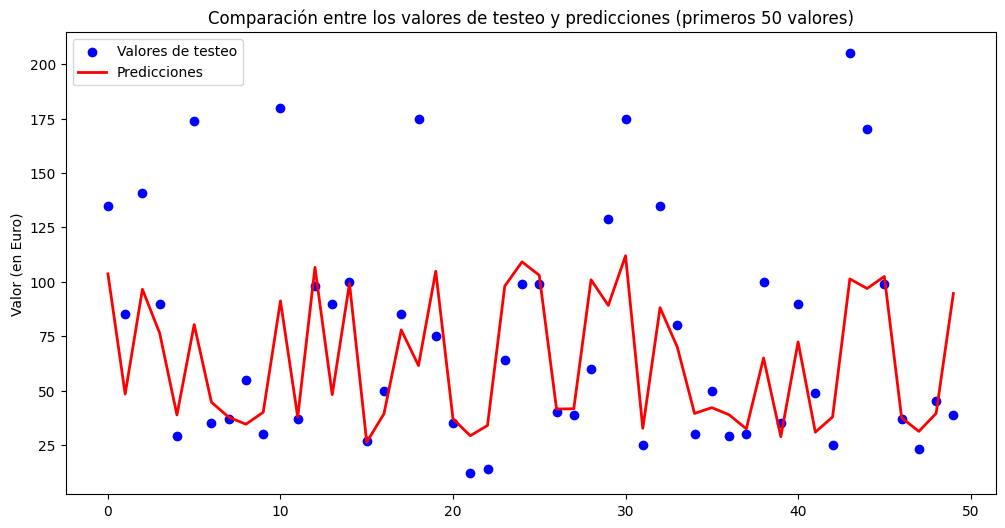

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lasso_test
y_test_subset = y_test[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_SVR_test[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Valor (en Euro)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

## Calculo de metricas de regresión

### R2

In [ ]:
r2_rl = r2_score(y_test,y_pred_lineal_testeo)
r2_lasso = r2_score(y_test,y_pred_lasso_test)
r2_knn = r2_score(y_test,y_pred_knn_Estandarizado_test)
r2_SVR = r2_score(y_test,y_pred_SVR_test)

print("R2 de la regresion lineal simple:",r2_rl)
print("R2 de la regresion de Lasso:",r2_lasso)
print("R2 del modelo KNN:",r2_knn)
print("R2 del modelo SVR:",r2_SVR)

R2 de la regresion lineal simple: 0.5305844964778904
R2 de la regresion de Lasso: 0.5305625116647645
R2 del modelo KNN: 0.5080690020403481
R2 del modelo SVR: 0.5004476393607376


### RMSE

In [ ]:
mse_rl = mse(y_test,y_pred_lineal_testeo)
mse_ll = mse(y_test,y_pred_lasso_test)
mse_knn = mse(y_test,y_pred_knn_Estandarizado_test)
mse_SVR = mse(y_test,y_pred_SVR_test)

rmse_rl = np.sqrt(mse_rl)
rmse_lasso = np.sqrt(mse_ll)
rmse_knn = np.sqrt(mse_knn)
rmse_SVR = np.sqrt(mse_SVR)

print("RMSE real de la regresion lineal simple:",rmse_rl)
print("RMSE real de la regresion de Lasso:",rmse_lasso)
print("RMSE real del modelo KNN:",rmse_knn)
print("RMSE real del modelo SVR:",rmse_SVR)

RMSE real de la regresion lineal simple: 31.68349212816284
RMSE real de la regresion de Lasso: 31.68423405881157
RMSE real del modelo KNN: 32.434441448216575
RMSE real del modelo SVR: 32.68472508265762


## Coeficientes de correlación

In [ ]:
#importamos la libreria stats para realizar operaciones estadisticas
import scipy.stats as stats

### Spearman

In [ ]:
#Dejamos solo las variables independientes y no dicotomicas
df_spearman = df.drop(columns=['price', 'is_instant_bookable', 'room_type'])

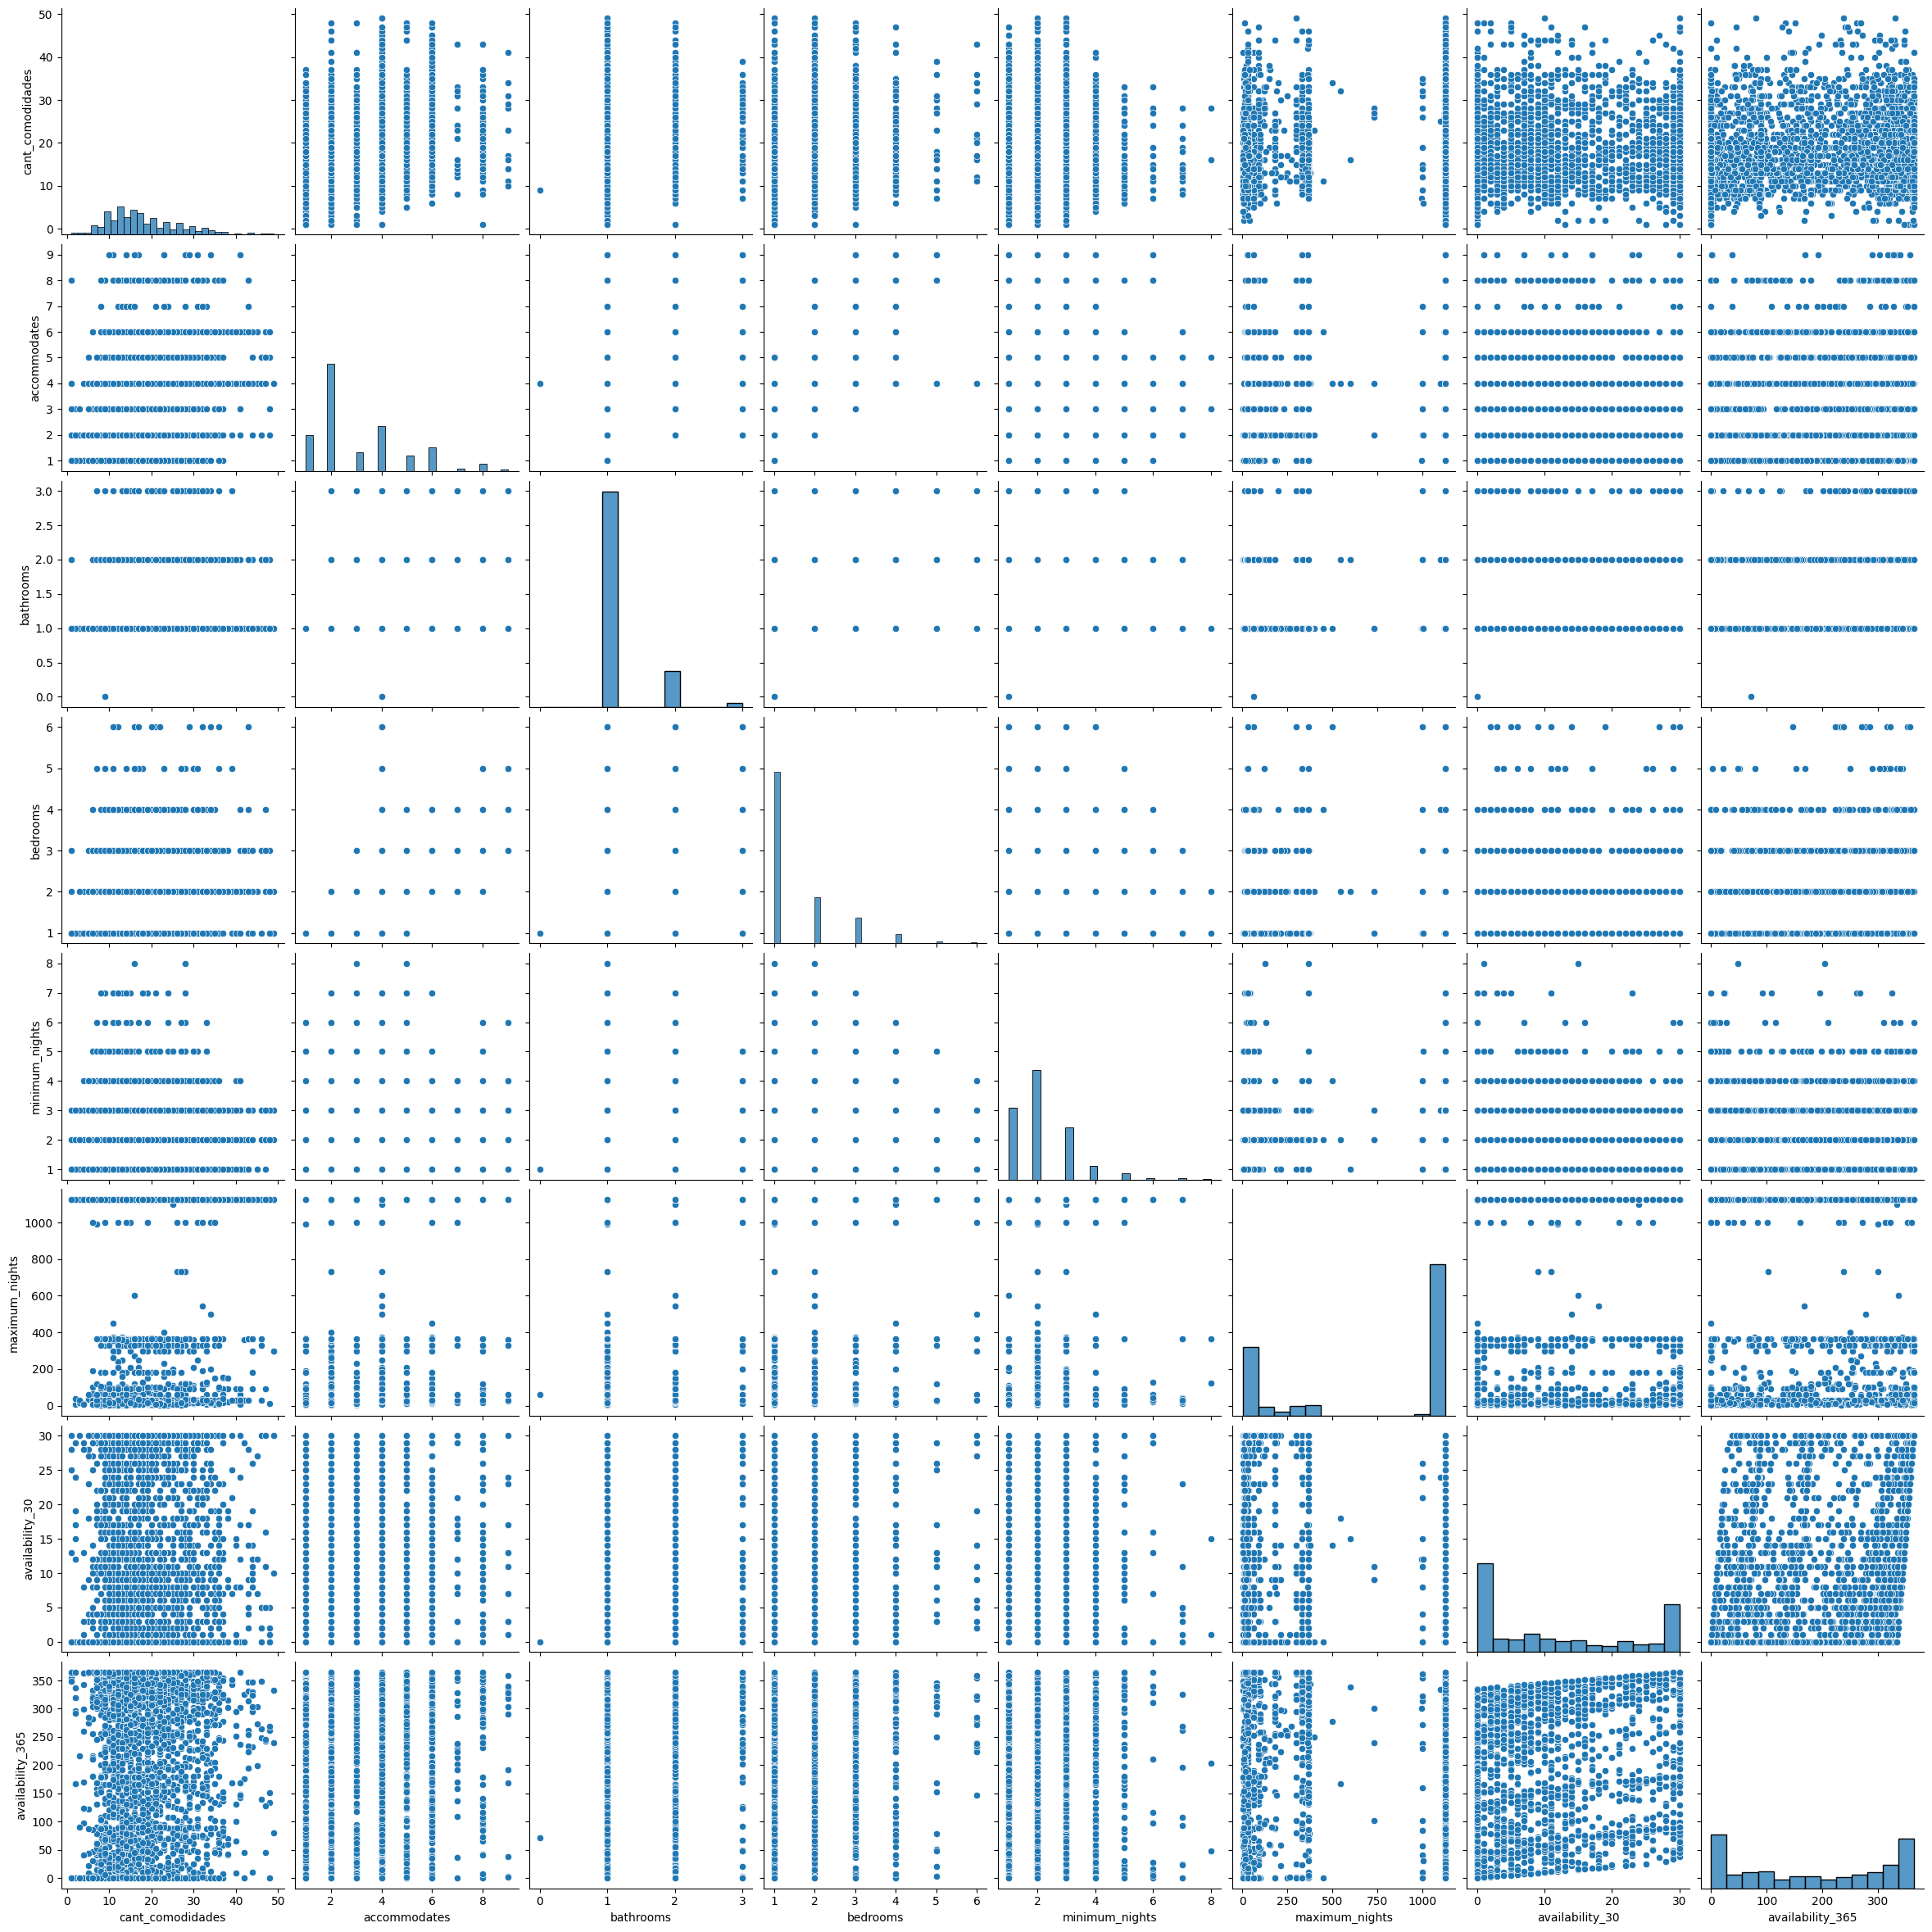

In [ ]:
#Vemos que variables se comportan de manera monotónica
sns.pairplot(df_spearman, height = 3 )

Segun vemos, en general, las variables 'availability_365' y 'availability_30' tienen un comportamiento monotónico

Para los casos de spearman, analizaremos las siguientes hipotesis solo en variables numericas con comportamiento lineal o no lineal y monotónicas:
* Ho= no hay correlación entre las variables

* Ha= si hay correlación entre las variables

si p-valor es menor a 0.05 (la significancia), podemos rechazar la hipotesis nula.

In [ ]:
#Creamos una funcion que nos permita saber si rechazamos o no la hipotesis nula
def corr_spearman(var1, var2):
  coeficiente, p_valor = stats.spearmanr(df_spearman[var1], df_spearman[var2])
  print(f"Coeficiente de Spearman entre '{var1}' y '{var2}':", coeficiente)
  print("P-valor:", p_valor)

#### Columnas 'availability_365' y 'availability_30'

In [ ]:
corr_spearman('availability_365', 'availability_30')

Coeficiente de Spearman entre 'availability_365' y 'availability_30': 0.580839811591418
P-valor: 1.906430233862269e-241


como el p-valor es menor a 0.05, se rechaza la hipotesis nula y podemos decir que si hay correlación entre las variables

### Biserial

Para este coeficiente, veremos la correlación entre variables dicotómicas y numericas, para las cuales tenemos las siguientes hipotesis:
* Hipótesis nula: No existe correlación entre una variable dicotómica(o binaria) y una variable métrica.
* Hipótesis alternativa: Existe correlación entre una variable dicotómica y una variable métrica.

Si el p-valor es menor a 0.05, podemos rechazar la hipotesis nula

In [ ]:
#Hacemos un ciclo for para iterar entre las variables categoricas y numericas

var_cat = ['is_instant_bookable', 'room_type']  #variables dicotómicas
var_num = ['cant_comodidades', 'accommodates',
       'bathrooms', 'bedrooms', 'maximum_nights', 'availability_30',
       'availability_365']                                      #'latitude', 'longitude',
pvalue=0.05

for i in var_cat:
    for j in var_num:
        #Calculamos el coeficiente biserial
      coeficiente, p_valor = stats.pointbiserialr(df[i], df[j])

      print(f"Coeficiente de correlación de punto biserial entre '{i}' y '{j}':", coeficiente)
      print("P-valor:", p_valor)

      if p_valor <= pvalue:
        print('Se rechaza la hipotesis nula','\n')
      else:
        print('No hay evidencia suficiente para rechazar la hipotesis nula','\n')

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'cant_comodidades': 0.14758992042017885
P-valor: 1.638826488569725e-14
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'accommodates': 0.1376538930529719
P-valor: 8.41247500261295e-13
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'bathrooms': 0.07169532795028045
P-valor: 0.00020462525953423246
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'bedrooms': 0.07827815739817409
P-valor: 5.0095817874229876e-05
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'maximum_nights': 0.03308614145702209
P-valor: 0.08692300047129455
No hay evidencia suficiente para rechazar la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'availability_30': -0.0165323443

Analizando las variables categoricas con cada una de las variables numericas, tenemos:

* **'is_instant_bookable'**: variable significativamente correlacionada con 'cant_comodidades', 'accommodates', 'bathrooms', 'bedrooms' y 'availability_365'. Por el otro lado, no se puede rechazar la hipotesis nula con las variables 'maximum_nights' y 'availability_30'.

* **'room_type'**: variable significativamente correlacionada con 'cant_comodidades', 'accommodates', 'bathrooms', 'bedrooms', 'maximum_nights' y 'availability_365', y por el otro lado, se puede concluir que no hay correlación entre 'room_type' y las variables y 'availability_30'.

### Chi cuadrado

Para este coeficiente, solo se analizarán las variables categoricas, es decir
 'room_type', 'availability', 'is_instant_bookable', utilizando las siguientes hipotesis:
* Ho= no hay correlación entre las variables

* Ha= si hay correlación entre las variables

si p-valor es menor a 0.05 (la significancia), podemos rechazar la hipotesis nula.

In [ ]:
#importamos libreria necesaria:
from scipy.stats import chi2_contingency

In [ ]:
#Creamos la funcion que nos permita calcular el valor de chi cuadrado y el p-valor
pvalue = 0.05
def chi2 (var_cat1, var_cat2):
  tabla_frecuencia1 = pd.crosstab(df[var_cat1], df[var_cat2])
  print(tabla_frecuencia1,'\n')
  # Realizar la prueba de chi-cuadrado
  chi2, p_value, _, _ = chi2_contingency(tabla_frecuencia1)

  # Imprimir los resultados
  print("Estadística de chi-cuadrado:", chi2)
  print("P-valor:", p_value)

  if p_value<= pvalue:
    print ('Se rechaza la hipotesis nula')
  else:
    print('No se rechaza la hipotesis nula')

#### Correlación entre 'room_type' y 'is_instant_bookable'

In [ ]:
chi2('room_type', 'is_instant_bookable')

is_instant_bookable    0    1
room_type                    
0                    568  668
1                    801  641 

Estadística de chi-cuadrado: 24.12933731165616
P-valor: 9.00774941504379e-07
Se rechaza la hipotesis nula


Debido al bajo valor de p, podemos concluir que si existe una correlación significativa entre 'room_type' y la variable 'is_instant_bookable'

#Modelo de regresion con variables logiritmicas

In [ ]:
df_reg_2 = df.copy()

In [ ]:
columnas_numericas = ['price','cant_comodidades', 'accommodates',
                      'bathrooms', 'bedrooms','minimum_nights', 'maximum_nights', 'availability_30',
                      'availability_365']

# Aplicar transformación logarítmica y eliminar las columnas originales
for columna in columnas_numericas:
    # Usar np.log1p() para manejar valores cercanos a cero de manera más efectiva
    df_reg_2[columna + '_log'] = np.log1p(df_reg_2[columna])
    # Eliminar la columna original
    df_reg_2.drop(columna, axis=1, inplace=True)



In [ ]:
# Verificar los resultados
df_reg_2.head()

is_instant_bookable  room_type  price_log  cant_comodidades_log  \
0                    1          0   4.276666              3.713572   
1                    1          0   5.049856              2.995732   
2                    1          0   4.919981              2.833213   
3                    0          0   3.931826              3.332205   
4                    0          0   4.110874              3.218876   

   accommodates_log  bathrooms_log  bedrooms_log  minimum_nights_log  \
0          1.945910       1.098612      1.098612            1.098612   
1          1.945910       0.693147      1.386294            1.386294   
2          1.791759       1.098612      1.098612            1.098612   
3          1.609438       0.693147      1.098612            1.386294   
4          1.945910       0.693147      1.386294            2.079442   

   maximum_nights_log  availability_30_log  availability_365_log  
0            7.026427             0.000000              5.529429  
1            7.026427             1.386294              5.602119  
2            7.026427             2.397895              5.755742  
3            3.433987             1.791759              4.615121  
4            5.902633             0.693147              4.691348

In [ ]:
#ponemos todas las columnas numericas del df de interes.
x_log= df_reg_2[['cant_comodidades_log', 'accommodates_log',
       'bathrooms_log', 'bedrooms_log', 'minimum_nights_log', 'maximum_nights_log', 'availability_30_log',
       'availability_365_log', 'is_instant_bookable', 'room_type']]   # 'latitude', 'longitude',
y_log= df_reg_2['price_log']

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(x_log, y_log, test_size=0.2, random_state=42)

## Regresión lineal

In [ ]:
#Defino el algoritmo a utilizar
modelo_lr_log = Pipeline([('scaler', RobustScaler()),('features', PolynomialFeatures()),
                    ('regression', LinearRegression(fit_intercept=True))])

hiperparametros={'features__degree':[1,2,3,4]}
grilla=GridSearchCV(modelo_lr_log,hiperparametros, cv=5,scoring='neg_root_mean_squared_error')
grilla.fit(x_train_log,y_train_log)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'features__degree': [1, 2, 3, 4]},
             scoring='neg_root_mean_squared_error')

In [ ]:
print(grilla.best_params_)

{'features__degree': 1}


In [ ]:
# entrenamos con el mejor modelo
modelo_lr_log=grilla.best_estimator_
modelo_lr_log.fit(x_train_log, y_train_log)

Pipeline(steps=[('scaler', RobustScaler()),
                ('features', PolynomialFeatures(degree=1)),
                ('regression', LinearRegression())])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_lineal_testeo_log = modelo_lr_log.predict(x_test_log)
y_pred_lineal_train_log = modelo_lr_log.predict(x_train_log)

print('Precisión del modelo usando el error cuadratico medio (MSE):')

score_train_modelo_lineal_log = mse(y_train_log,y_pred_lineal_train_log)
score_test_modelo_lineal_log = mse(y_test_log,y_pred_lineal_testeo_log)

print ("Train:", score_train_modelo_lineal_log)
print ("Testeo:", score_test_modelo_lineal_log)

Precisión del modelo usando el error cuadratico medio (MSE):
Train: 0.1688401934920456
Testeo: 0.1625071424233987


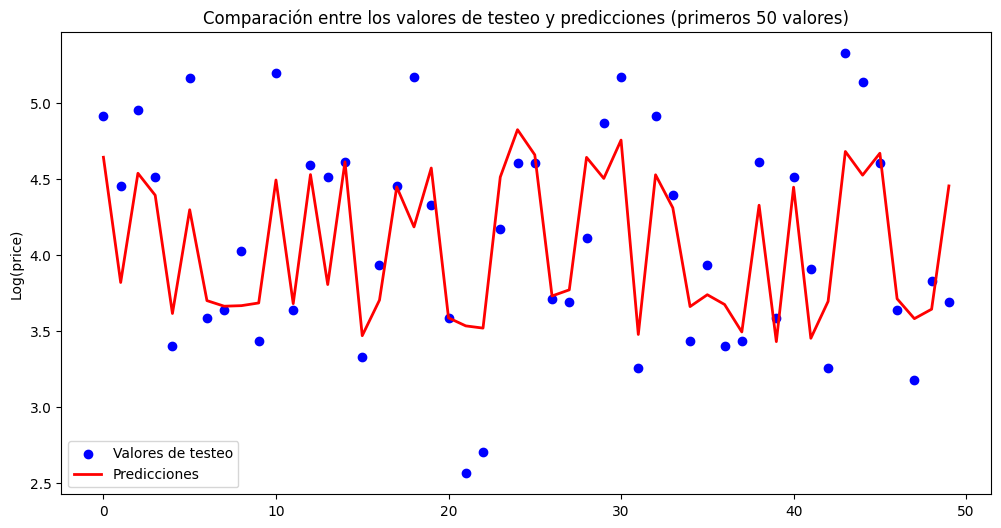

In [ ]:
# Obtenemos los primeros 50 valores de y_test_log y y_pred_lineal_testeo_log
y_test_subset = y_test_log[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_lineal_testeo_log[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Log(price)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

Como vemos, las predicciones están bastante lejos de los valores más altos y bajos de la muestra, pero más cerca de los valores intermedios (entre 40 y 80 euros aproximadamente)

## Regresión Lasso

In [ ]:
# Definir el modelo de regresión LARS Lasso
modelo_Lars_log = Pipeline([
    ('scaler', RobustScaler()),
    ('features', PolynomialFeatures()),
    ('model', LassoLars())
])

# Definir la grilla de hiperparámetros
hiperparametros = {'features__degree': [1, 2, 3, 4], 'model__alpha': [1e-05, 1e-04, 1e-03, 1e-02]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
grilla = GridSearchCV(modelo_Lars_log, hiperparametros, cv=5, scoring='neg_root_mean_squared_error')
grilla.fit(x_train_log,y_train_log)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning:

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 40 iterations, alpha=1.832e-03, previous alpha=1.679e-03, with an active set of 33 regressors.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 28 iterations, i.e. alpha=3.086e-03, with an active set of 24 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 29 iterations, i.e. alpha=2.984e-03, with an active set of 25 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameter

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('model', LassoLars())]),
             param_grid={'features__degree': [1, 2, 3, 4],
                         'model__alpha': [1e-05, 0.0001, 0.001, 0.01]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'features__degree': 2, 'model__alpha': 0.001}


In [ ]:
modelo_lasso_log=grilla.best_estimator_
modelo_lasso_log.fit(x_train_log, y_train_log)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=4.597e-03, with an active set of 16 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 39 iterations, i.e. alpha=1.932e-03, with an active set of 35 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 39 iterations, i.e. alpha=1.910e-03, with an active set of 35 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_it

Pipeline(steps=[('scaler', RobustScaler()), ('features', PolynomialFeatures()),
                ('model', LassoLars(alpha=0.001))])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_lasso_test_log = modelo_lasso_log.predict(x_test_log)
y_pred_lasso_train_log = modelo_lasso_log.predict(x_train_log)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_lasso_log = mse(y_train_log,y_pred_lasso_train_log)
score_test_modelo_lasso_log = mse(y_test_log,y_pred_lasso_test_log)

print ("Train:", score_train_modelo_lasso_log)
print ("Testeo:", score_test_modelo_lasso_log)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 0.16500383376192493
Testeo: 0.15957678541764034


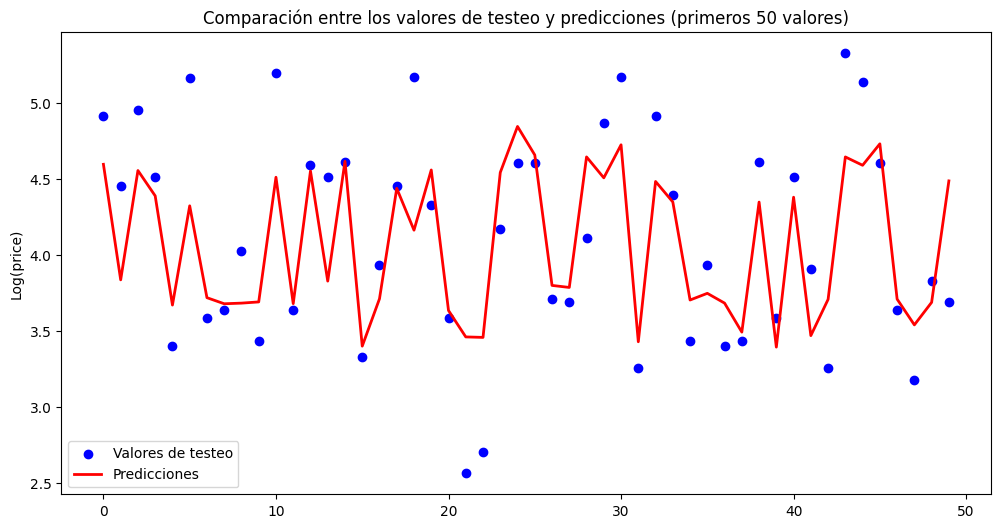

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lasso_test
y_test_subset = y_test_log[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_lasso_test_log[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Log(price)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

## Modelo KNN

In [ ]:
model_KNN_log = Pipeline([
    ('scaler', RobustScaler()),
    ('regression', KNeighborsRegressor())
])

# Definir la grilla de hiperparámetros
hiperparametros = {'regression__n_neighbors': [3, 5, 7, 9, 11]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
grilla = GridSearchCV(model_KNN_log, hiperparametros, cv=5, scoring='neg_root_mean_squared_error')
grilla.fit(x_train_log, y_train_log)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('regression', KNeighborsRegressor())]),
             param_grid={'regression__n_neighbors': [3, 5, 7, 9, 11]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'regression__n_neighbors': 11}


In [ ]:
model_KNN_log=grilla.best_estimator_
model_KNN_log.fit(x_train_log, y_train_log)

Pipeline(steps=[('scaler', RobustScaler()),
                ('regression', KNeighborsRegressor(n_neighbors=11))])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_knn_Estandarizado_test_log = model_KNN_log.predict(x_test_log)
y_pred_knn_Estandarizado_train_log = model_KNN_log.predict(x_train_log)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_knn_log = mse(y_train_log,y_pred_knn_Estandarizado_train_log)
score_test_modelo_knn_log = mse(y_test_log,y_pred_knn_Estandarizado_test_log)

print ("Train:", score_train_modelo_knn_log)
print ("Testeo:", score_test_modelo_knn_log)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 0.1519039773797467
Testeo: 0.16897088057426352


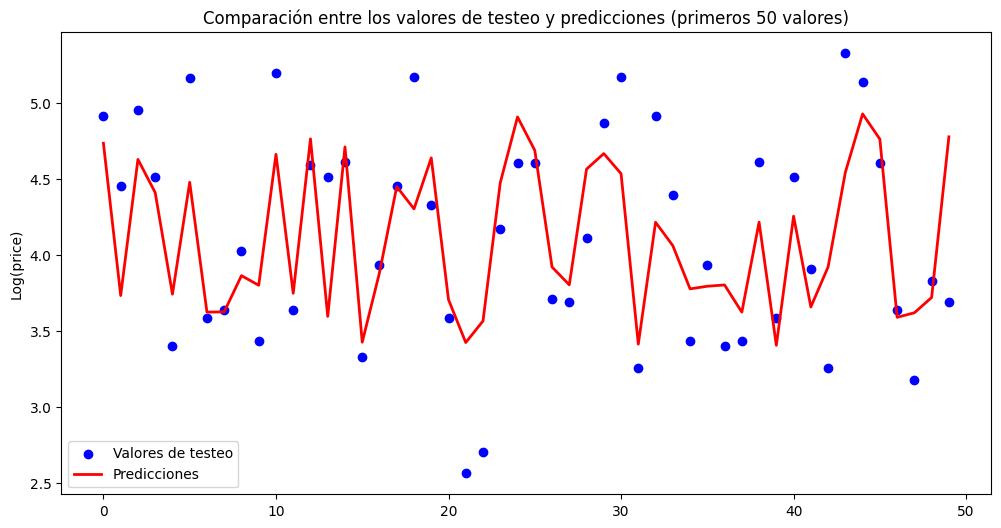

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lasso_test
y_test_subset = y_test_log[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_knn_Estandarizado_test_log[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Log(price)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

## Support Vector Machine

In [ ]:
modelo_SVR_log= Pipeline([('scaler', RobustScaler()),
                  ('modelo',SVR())])

hiperparametros=[{'modelo__C':[1,30],'modelo__kernel':['linear']},{'modelo__gamma':[0.01,0.1], 'modelo__C':[1,30],'modelo__kernel':['rbf']}]

grilla=GridSearchCV(modelo_SVR_log,hiperparametros,refit=True, cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=3)
grilla.fit(x_train_log,y_train_log)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('modelo', SVR())]),
             n_jobs=-1,
             param_grid=[{'modelo__C': [1, 30], 'modelo__kernel': ['linear']},
                         {'modelo__C': [1, 30], 'modelo__gamma': [0.01, 0.1],
                          'modelo__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'modelo__C': 30, 'modelo__gamma': 0.01, 'modelo__kernel': 'rbf'}


In [ ]:
modelo_SVR_log=grilla.best_estimator_
modelo_SVR_log.fit(x_train_log, y_train_log)

Pipeline(steps=[('scaler', RobustScaler()), ('modelo', SVR(C=30, gamma=0.01))])

In [ ]:
y_pred_SVR_test_log = modelo_SVR_log.predict(x_test_log)
y_pred_SVR_train_log = modelo_SVR_log.predict(x_train_log)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_SVR_log = mse(y_train_log,y_pred_SVR_train_log)
score_test_modelo_SVR_log = mse(y_test_log,y_pred_SVR_test_log)

print ("Train:", score_train_modelo_SVR_log)
print ("Testeo:", score_test_modelo_SVR_log)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 0.16425088120381579
Testeo: 0.16145818648523816


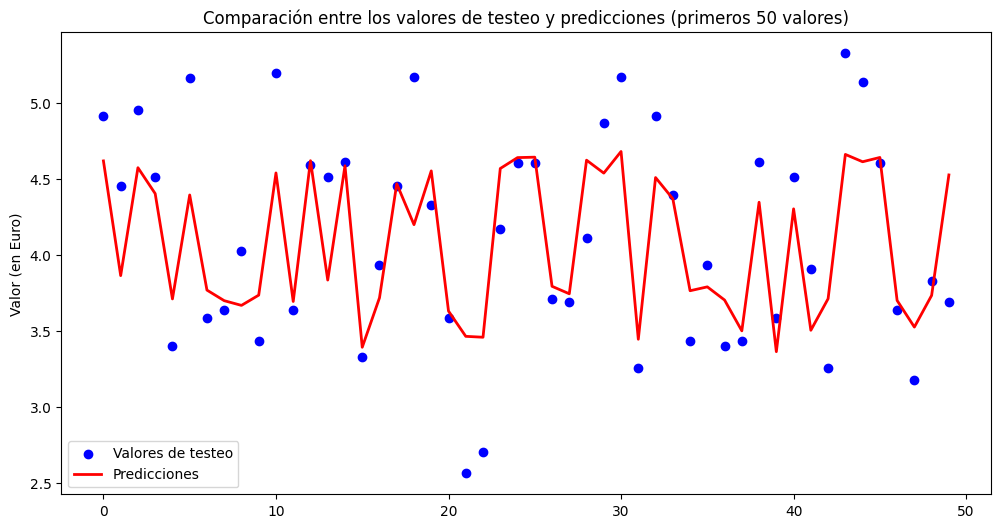

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lasso_test
y_test_subset = y_test_log[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_SVR_test_log[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Valor (en Euro)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

## Calculo de metricas de regresión

### R2

In [ ]:
r2_rl_log = r2_score(y_test_log,y_pred_lineal_testeo_log)
r2_lasso_log = r2_score(y_test_log,y_pred_lasso_test_log)
r2_knn_log = r2_score(y_test_log,y_pred_knn_Estandarizado_test_log)
r2_SVR_log = r2_score(y_test_log,y_pred_SVR_test_log)

print("R2 de la regresion lineal simple:",r2_rl_log)
print("R2 de la regresion de Lasso:",r2_lasso_log)
print("R2 del modelo KNN:",r2_knn_log)
print("R2 del modelo SVR:",r2_SVR_log)

R2 de la regresion lineal simple: 0.5996432658368653
R2 de la regresion de Lasso: 0.6068625679749882
R2 del modelo KNN: 0.5837190359354891
R2 del modelo SVR: 0.6022275003967767


### RMSE

In [ ]:
mse_rl_log = mse(np.expm1(y_test_log),np.expm1(y_pred_lineal_testeo_log))
mse_ll_log = mse(np.expm1(y_test_log),np.expm1(y_pred_lasso_test_log))
mse_knn_log = mse(np.expm1(y_test_log),np.expm1(y_pred_knn_Estandarizado_test_log))
mse_SVR_log = mse(np.expm1(y_test_log),np.expm1(y_pred_SVR_test_log))

rmse_rl_log = np.sqrt(mse_rl_log)
rmse_lasso_log = np.sqrt(mse_ll_log)
rmse_knn_log = np.sqrt(mse_knn_log)
rmse_SVR_log = np.sqrt(mse_SVR_log)

print("RMSE real de la regresion lineal simple:",rmse_rl_log)
print("RMSE real de la regresion de Lasso:",rmse_lasso_log)
print("RMSE real del modelo KNN:",rmse_knn_log)
print("RMSE real del modelo SVR:",rmse_SVR_log)

RMSE real de la regresion lineal simple: 32.15529613683061
RMSE real de la regresion de Lasso: 31.929828796986676
RMSE real del modelo KNN: 32.368010996907614
RMSE real del modelo SVR: 32.183207228105154


## Coeficientes de correlación con variables logaritmicas

In [ ]:
df_reg_2.head()

is_instant_bookable  room_type  price_log  cant_comodidades_log  \
0                    1          0   4.276666              3.713572   
1                    1          0   5.049856              2.995732   
2                    1          0   4.919981              2.833213   
3                    0          0   3.931826              3.332205   
4                    0          0   4.110874              3.218876   

   accommodates_log  bathrooms_log  bedrooms_log  minimum_nights_log  \
0          1.945910       1.098612      1.098612            1.098612   
1          1.945910       0.693147      1.386294            1.386294   
2          1.791759       1.098612      1.098612            1.098612   
3          1.609438       0.693147      1.098612            1.386294   
4          1.945910       0.693147      1.386294            2.079442   

   maximum_nights_log  availability_30_log  availability_365_log  
0            7.026427             0.000000              5.529429  
1            7.026427             1.386294              5.602119  
2            7.026427             2.397895              5.755742  
3            3.433987             1.791759              4.615121  
4            5.902633             0.693147              4.691348

### Spearman

In [ ]:
#Dejamos solo las variables independientes y no dicotomicas
df_spearman_log = df_reg_2.drop(columns=['price_log', 'is_instant_bookable', 'room_type'])

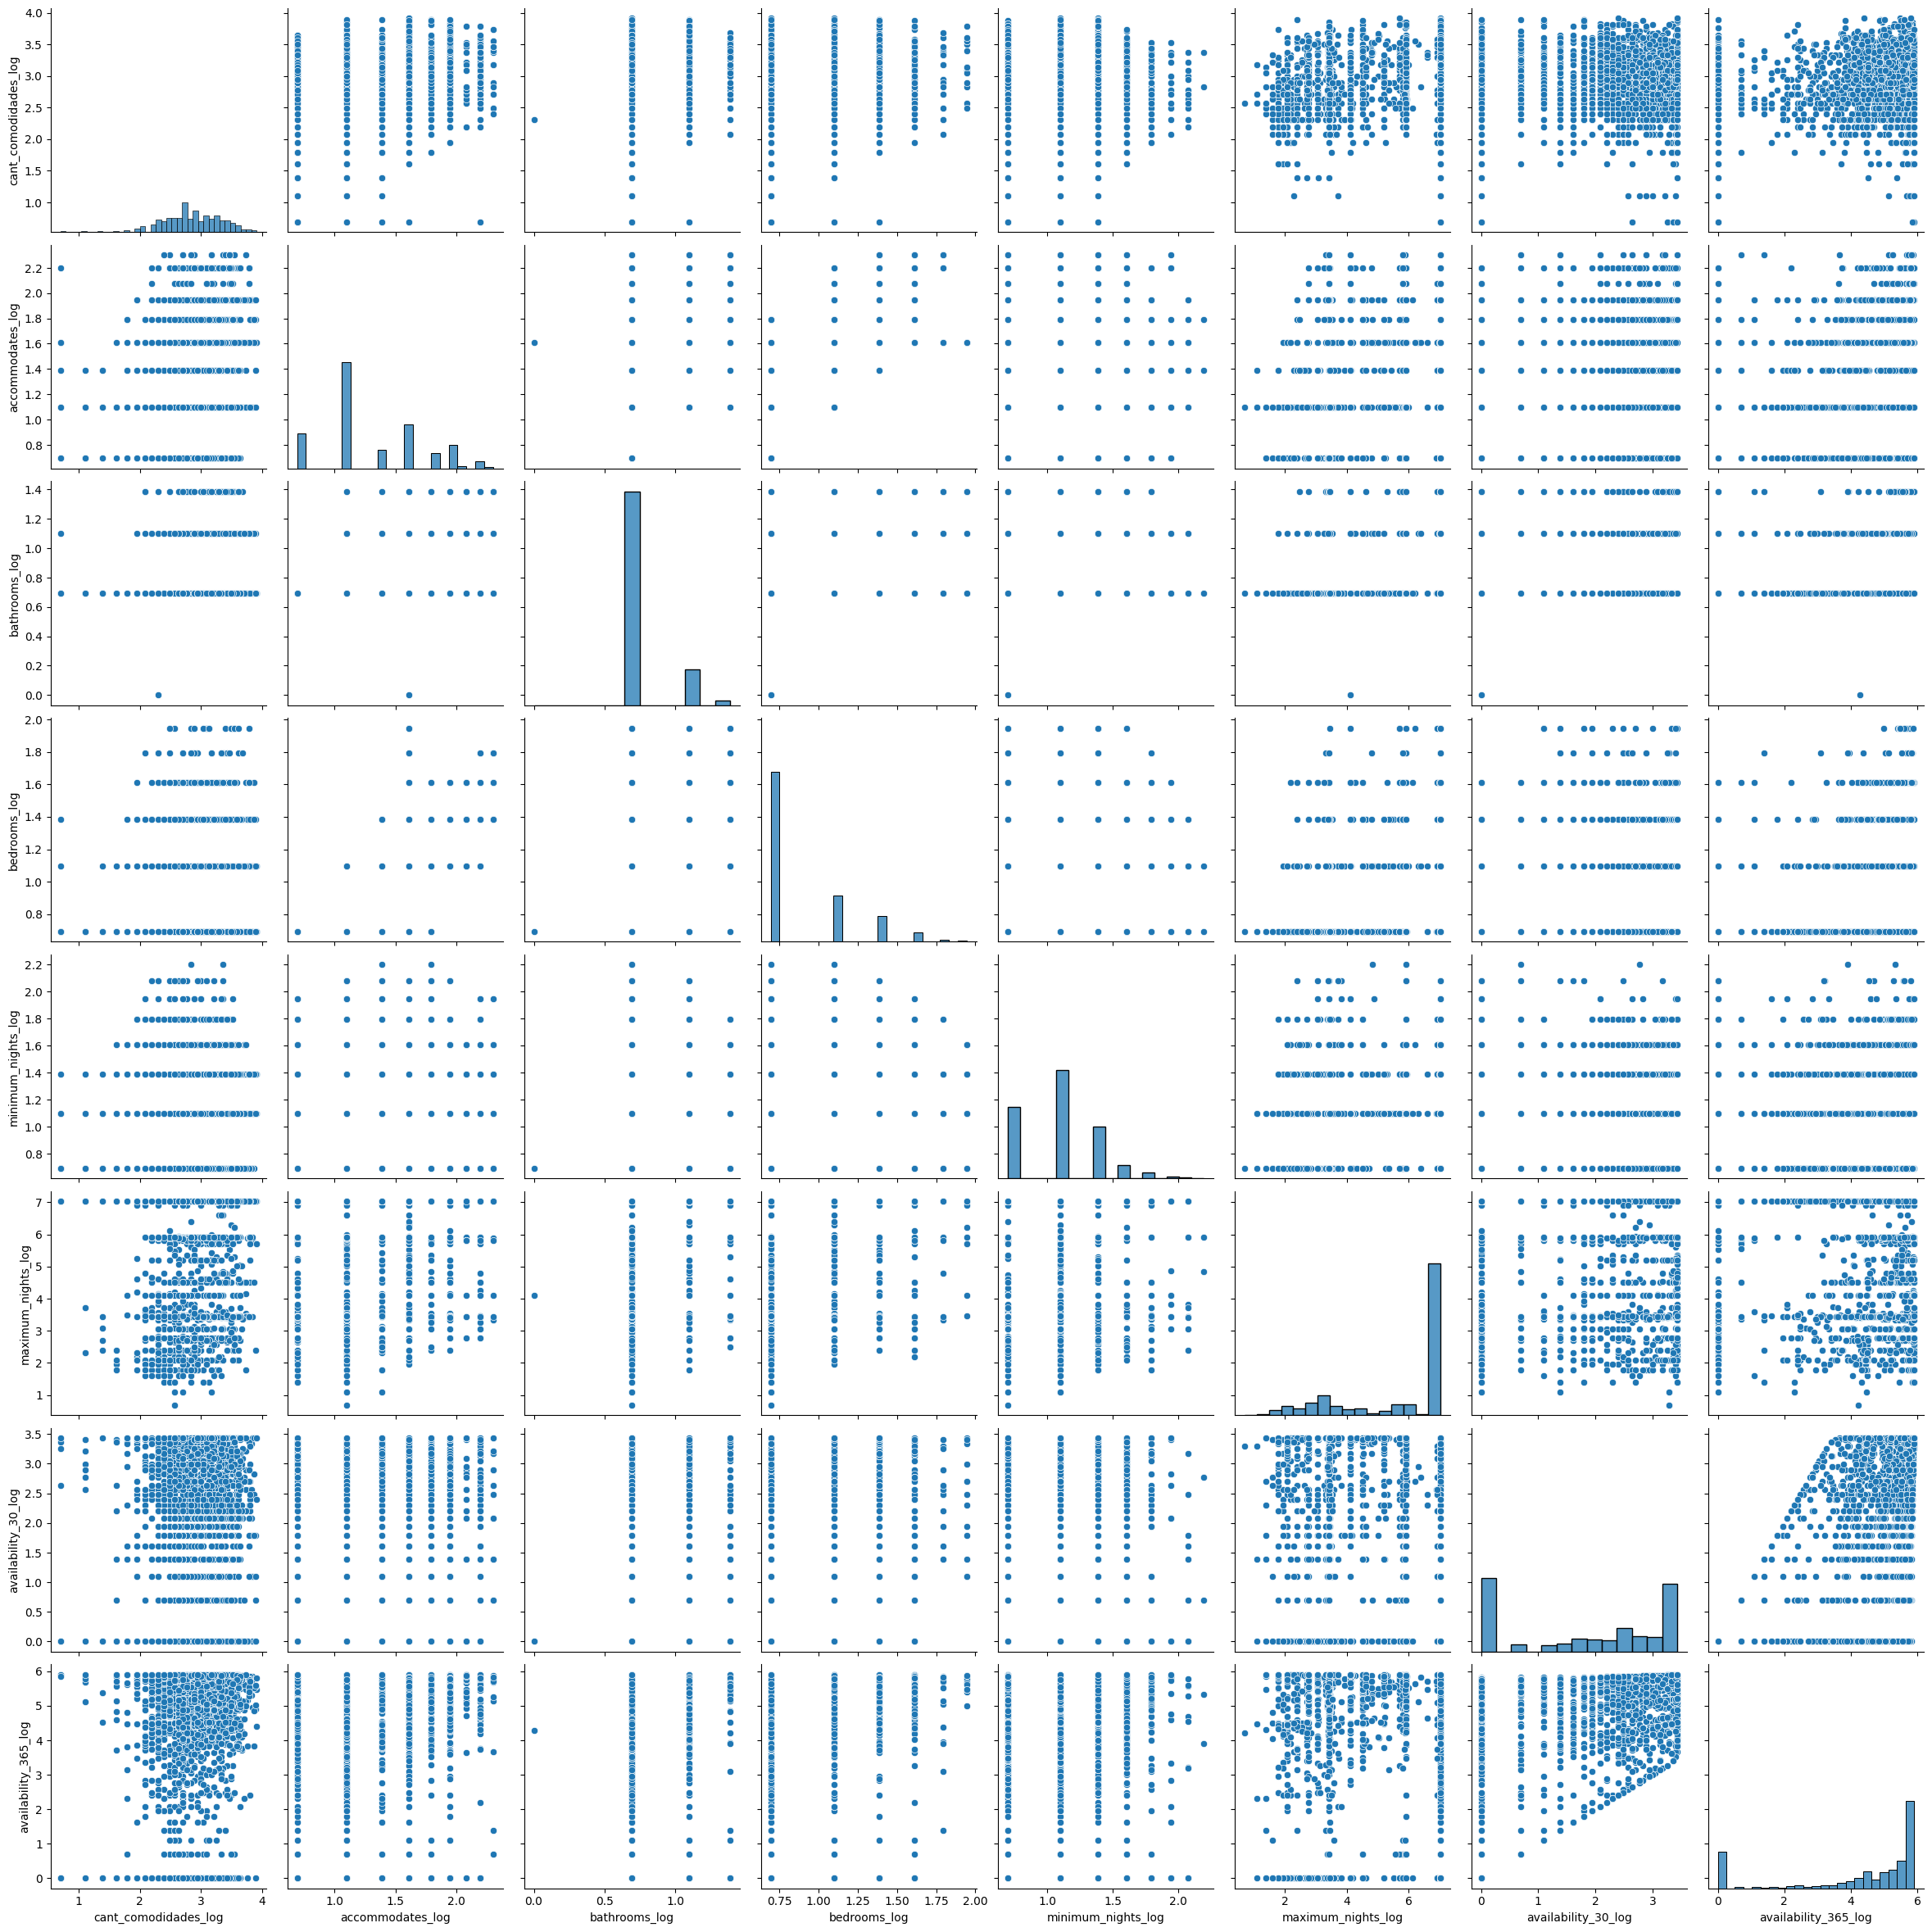

In [ ]:
#Vemos que variables se comportan de manera monotónica
sns.pairplot(df_spearman_log, height = 3 )

Segun vemos, solo las variables 'longitud' y 'latitude' son las que se comportan de manera monotónica, por lo que solo esas evaluaremos

Para los casos de spearman, analizaremos las siguientes hipotesis solo en variables numericas con comportamiento lineal o no lineal y monotónicas:
* Ho= no hay correlación entre las variables

* Ha= si hay correlación entre las variables

si p-valor es menor a 0.05 (la significancia), podemos rechazar la hipotesis nula.

In [ ]:
#Creamos una funcion que nos permita saber si rechazamos o no la hipotesis nula
def corr_spearman(var1, var2):
  coeficiente, p_valor = stats.spearmanr(df_spearman_log[var1], df_spearman_log[var2])
  print(f"Coeficiente de Spearman entre '{var1}' y '{var2}':", coeficiente)
  print("P-valor:", p_valor)

#### Columnas 'availability_30_log' y 'availability_365_log'

In [ ]:
corr_spearman('availability_30_log', 'availability_365_log')

Coeficiente de Spearman entre 'availability_30_log' y 'availability_365_log': 0.580839811591418
P-valor: 1.906430233862269e-241


Al igual que en los modelos sin transformar las variables,las variables 'availability_365_log' 'availability_30_log' representan una alta correlación entre ellas, teniendo un p-valor mucho más pequeño que 0.05

### Biserial

Para este coeficiente, veremos la correlación entre variables dicotómicas y numericas, para las cuales tenemos las siguientes hipotesis:
* Hipótesis nula: No existe correlación entre una variable dicotómica(o binaria) y una variable métrica.
* Hipótesis alternativa: Existe correlación entre una variable dicotómica y una variable métrica.

Si el p-valor es menor a 0.05, podemos rechazar la hipotesis nula

In [ ]:
#Hacemos un ciclo for para iterar entre las variables categoricas y numericas

var_cat_2 = [ 'is_instant_bookable', 'room_type']  #variables dicotómicas
var_num_2 = ['cant_comodidades_log', 'accommodates_log',
       'bathrooms_log', 'bedrooms_log', 'maximum_nights_log', 'availability_30_log',
       'availability_365_log']                        #'latitude', 'longitude',
pvalue=0.05

for i in var_cat_2:
    for j in var_num_2:
        #Calculamos el coeficiente biserial
      coeficiente, p_valor = stats.pointbiserialr(df_reg_2[i], df_reg_2[j])

      print(f"Coeficiente de correlación de punto biserial entre '{i}' y '{j}':", coeficiente)
      print("P-valor:", p_valor)

      if p_valor <= pvalue:
        print('Se rechaza la hipotesis nula','\n')
      else:
        print('No hay evidencia suficiente para rechazar la hipotesis nula','\n')

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'cant_comodidades_log': 0.14379389386622932
P-valor: 7.623639487064143e-14
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'accommodates_log': 0.13917940616633082
P-valor: 4.678584523219306e-13
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'bathrooms_log': 0.07205811561294886
P-valor: 0.00018990883802143667
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'bedrooms_log': 0.08266259022994664
P-valor: 1.8432922282139947e-05
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'maximum_nights_log': 0.04852946425536619
P-valor: 0.012015871306871822
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'availability_30_log': 0.035095874151360

Analizando las variables categoricas con cada una de las variables numericas, tenemos:

* **'is_instant_bookable'**: variable significativamente correlacionada con 'cant_comodidades_log', 'accommodates_log', 'bathrooms_log', 'bedrooms_log', 'maximum_nights_log' y 'availability_365_log'. Por el otro lado, no se puede rechazar la hipotesis nula con la variable 'availability_30_log'.

* **'room_type'**: variable significativamente correlacionada con todas las variables numericas, es decir, con 'cant_comodidades_log', 'accommodates_log', 'bathrooms_log', 'bedrooms_log', 'maximum_nights_log', availability_30_log y 'availability_365_log'

Además, se acepta la hipotesis de interes que indica que existe una correlación (y positiva) entre el tipo de habitación y el numero de baños, es decir, si el tipo de habitación es 1, el numero de baños será mayor en comparación a un tipo de habitacion = 0 (recordar que habitación=1 significa

### Chi cuadrado

Para este coeficiente, solo se analizarán las variables categoricas, es decir
 'room_type', 'availability', 'is_instant_bookable', utilizando las siguientes hipotesis:
* Ho= no hay correlación entre las variables

* Ha= si hay correlación entre las variables

si p-valor es menor a 0.05 (la significancia), podemos rechazar la hipotesis nula.

In [ ]:
#Creamos la funcion que nos permita calcular el valor de chi cuadrado y el p-valor
pvalue = 0.05
def chi2 (var_cat1, var_cat2):
  tabla_frecuencia1 = pd.crosstab(df_reg_2[var_cat1], df_reg_2[var_cat2])
  print(tabla_frecuencia1,'\n')
  # Realizar la prueba de chi-cuadrado
  chi2, p_value, _, _ = chi2_contingency(tabla_frecuencia1)

  # Imprimir los resultados
  print("Estadística de chi-cuadrado:", chi2)
  print("P-valor:", p_value)

  if p_value<= pvalue:
    print ('Se rechaza la hipotesis nula')
  else:
    print('No se rechaza la hipotesis nula')

### Correlación entre 'room_type' y 'is_instant_bookable'

In [ ]:
chi2('room_type', 'is_instant_bookable')

is_instant_bookable    0    1
room_type                    
0                    568  668
1                    801  641 

Estadística de chi-cuadrado: 24.12933731165616
P-valor: 9.00774941504379e-07
Se rechaza la hipotesis nula


Debido al bajo valor de p, podemos concluir que si existe una correlación significativa entre 'room_type' y la variable 'is_instant_bookable'

# Modelo de regresión con raiz cuadrada

In [ ]:
df_reg_3 = df.copy()

In [ ]:
columnas_numericas = ['price','cant_comodidades', 'accommodates',
                      'bathrooms', 'bedrooms','minimum_nights', 'maximum_nights', 'availability_30',
                      'availability_365']

# Aplicar transformación de raiz cuadrada y eliminar las columnas originales
for columna in columnas_numericas:
    # Usar np.sqrt() para obtener la raíz cuadrada de cada valor
    df_reg_3[columna + '_sqrt'] = np.sqrt(df_reg_3[columna])
    # Eliminar la columna original
    df_reg_3.drop(columna, axis=1, inplace=True)



In [ ]:
# Verificar los resultados
df_reg_3.head()

is_instant_bookable  room_type  price_sqrt  cant_comodidades_sqrt  \
0                    1          0    8.426150               6.324555   
1                    1          0   12.449900               4.358899   
2                    1          0   11.661904               4.000000   
3                    0          0    7.071068               5.196152   
4                    0          0    7.745967               4.898979   

   accommodates_sqrt  bathrooms_sqrt  bedrooms_sqrt  minimum_nights_sqrt  \
0           2.449490        1.414214       1.414214             1.414214   
1           2.449490        1.000000       1.732051             1.732051   
2           2.236068        1.414214       1.414214             1.414214   
3           2.000000        1.000000       1.414214             1.732051   
4           2.449490        1.000000       1.732051             2.645751   

   maximum_nights_sqrt  availability_30_sqrt  availability_365_sqrt  
0            33.541020              0.000000              15.842980  
1            33.541020              1.732051              16.431677  
2            33.541020              3.162278              17.748239  
3             5.477226              2.236068              10.000000  
4            19.104973              1.000000              10.392305

In [ ]:
#ponemos todas las columnas numericas del df de interes.
x_sqrt= df_reg_3[[ 'cant_comodidades_sqrt', 'accommodates_sqrt',
                    'bathrooms_sqrt', 'bedrooms_sqrt', 'minimum_nights_sqrt', 'maximum_nights_sqrt', 'availability_30_sqrt',
                    'availability_365_sqrt', 'is_instant_bookable', 'room_type']]   # 'latitude', 'longitude',

y_sqrt= df_reg_3['price_sqrt']

In [ ]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train_sqrt, x_test_sqrt, y_train_sqrt, y_test_sqrt = train_test_split(x_sqrt, y_sqrt, test_size=0.2, random_state=42)

## Regresión lineal

In [ ]:
#Defino el algoritmo a utilizar
modelo_lr_sqrt = Pipeline([('scaler', RobustScaler()),('features', PolynomialFeatures()),
                    ('regression', LinearRegression(fit_intercept=True))])

hiperparametros={'features__degree':[1,2,3,4]}
grilla=GridSearchCV(modelo_lr_sqrt,hiperparametros, cv=5,scoring='neg_root_mean_squared_error')
grilla.fit(x_train_sqrt,y_train_sqrt)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'features__degree': [1, 2, 3, 4]},
             scoring='neg_root_mean_squared_error')

In [ ]:
print(grilla.best_params_)

{'features__degree': 1}


In [ ]:
# entrenamos con el mejor modelo
modelo_lr_sqrt=grilla.best_estimator_
modelo_lr_sqrt.fit(x_train_sqrt, y_train_sqrt)

Pipeline(steps=[('scaler', RobustScaler()),
                ('features', PolynomialFeatures(degree=1)),
                ('regression', LinearRegression())])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_lineal_testeo_sqrt = modelo_lr_sqrt.predict(x_test_sqrt)
y_pred_lineal_train_sqrt = modelo_lr_sqrt.predict(x_train_sqrt)

print('Precisión del modelo usando el error cuadratico medio (MSE):')

score_train_modelo_lineal_sqrt = mse(y_train_sqrt,y_pred_lineal_train_sqrt)
score_test_modelo_lineal_sqrt = mse(y_test_sqrt,y_pred_lineal_testeo_sqrt)

print ("Train:", score_train_modelo_lineal_sqrt)
print ("Testeo:", score_test_modelo_lineal_sqrt)

Precisión del modelo usando el error cuadratico medio (MSE):
Train: 3.0068794006655635
Testeo: 2.753508502808653


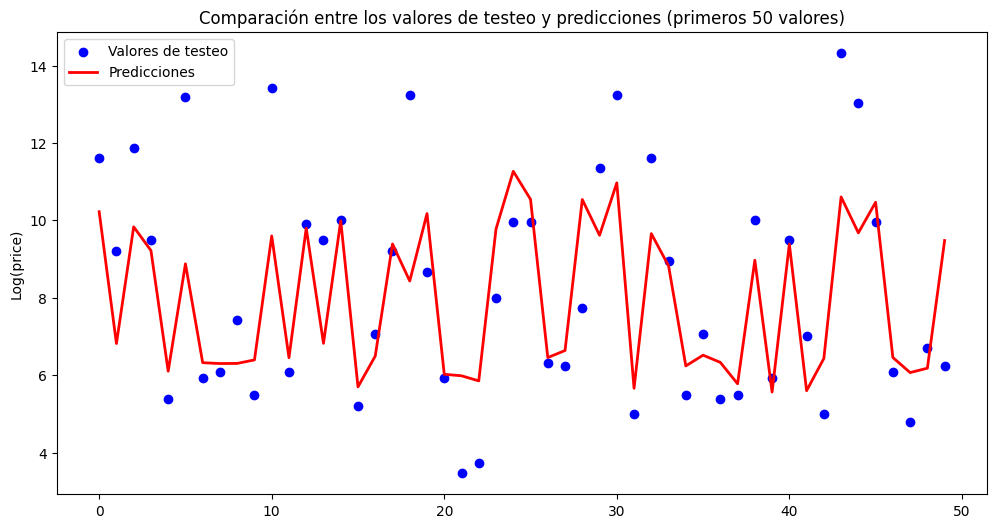

In [ ]:
# Obtenemos los primeros 50 valores de y_test_log y y_pred_lineal_testeo_log
y_test_subset = y_test_sqrt[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_lineal_testeo_sqrt[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Log(price)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

Como vemos, las predicciones están bastante lejos de los valores más altos y bajos de la muestra, pero más cerca de los valores intermedios (entre 40 y 80 euros aproximadamente)

## Regresión Lasso

In [ ]:
# Definir el modelo de regresión LARS Lasso
modelo_Lars_sqrt = Pipeline([
    ('scaler', RobustScaler()),
    ('features', PolynomialFeatures()),
    ('model', LassoLars())
])

# Definir la grilla de hiperparámetros
hiperparametros = {'features__degree': [1, 2, 3, 4], 'model__alpha': [1e-05, 1e-04, 1e-03, 1e-02]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
grilla = GridSearchCV(modelo_Lars_sqrt, hiperparametros, cv=5, scoring='neg_root_mean_squared_error')
grilla.fit(x_train_sqrt,y_train_sqrt)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=2.898e-02, with an active set of 11 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning:

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 25 iterations, alpha=1.689e-02, previous alpha=1.683e-02, with an active set of 18 regressors.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 18 iterations, i.e. alpha=2.213e-02, with an active set of 16 regressors, and the smallest cholesky pivot element being 8.429e-08. Reduce max_iter or increase eps parameter

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('model', LassoLars())]),
             param_grid={'features__degree': [1, 2, 3, 4],
                         'model__alpha': [1e-05, 0.0001, 0.001, 0.01]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'features__degree': 2, 'model__alpha': 0.001}


In [ ]:
modelo_lasso_sqrt=grilla.best_estimator_
modelo_lasso_sqrt.fit(x_train_sqrt, y_train_sqrt)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 14 iterations, i.e. alpha=3.151e-02, with an active set of 12 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 27 iterations, i.e. alpha=1.126e-02, with an active set of 23 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 31 iterations, i.e. alpha=9.464e-03, with an active set of 27 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_it

Pipeline(steps=[('scaler', RobustScaler()), ('features', PolynomialFeatures()),
                ('model', LassoLars(alpha=0.001))])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_lasso_test_sqrt = modelo_lasso_sqrt.predict(x_test_sqrt)
y_pred_lasso_train_sqrt = modelo_lasso_sqrt.predict(x_train_sqrt)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_lasso_sqrt = mse(y_train_sqrt,y_pred_lasso_train_sqrt)
score_test_modelo_lasso_sqrt = mse(y_test_sqrt,y_pred_lasso_test_sqrt)

print ("Train:", score_train_modelo_lasso_sqrt)
print ("Testeo:", score_test_modelo_lasso_sqrt)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 2.869821084691658
Testeo: 2.787346548891748


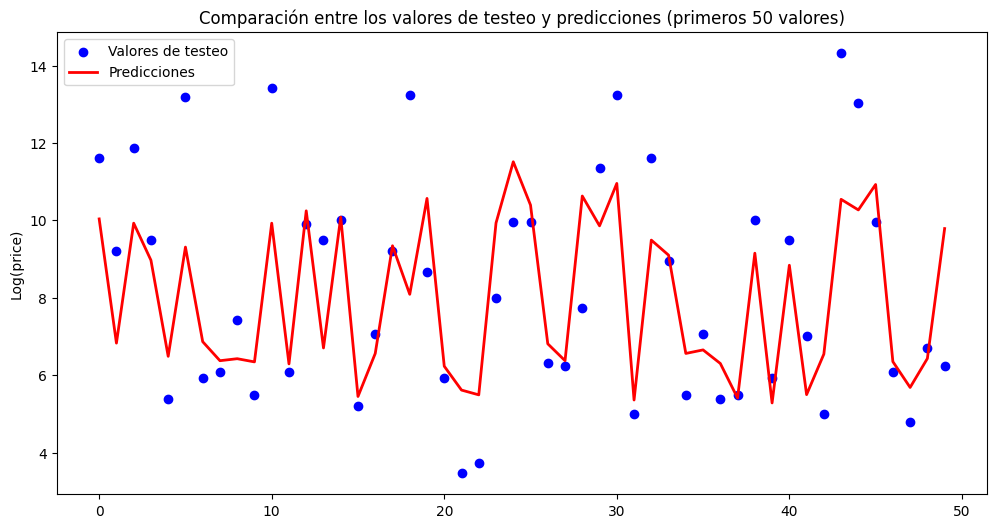

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lasso_test
y_test_subset = y_test_sqrt[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_lasso_test_sqrt[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Log(price)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

## Modelo KNN

In [ ]:
model_KNN_sqrt = Pipeline([
    ('scaler', RobustScaler()),
    ('regression', KNeighborsRegressor())
])

# Definir la grilla de hiperparámetros
hiperparametros = {'regression__n_neighbors': [3, 5, 7, 9, 11]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
grilla = GridSearchCV(model_KNN_sqrt, hiperparametros, cv=5, scoring='neg_root_mean_squared_error')
grilla.fit(x_train_sqrt, y_train_sqrt)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('regression', KNeighborsRegressor())]),
             param_grid={'regression__n_neighbors': [3, 5, 7, 9, 11]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'regression__n_neighbors': 11}


In [ ]:
model_KNN_sqrt=grilla.best_estimator_
model_KNN_sqrt.fit(x_train_sqrt, y_train_sqrt)

Pipeline(steps=[('scaler', RobustScaler()),
                ('regression', KNeighborsRegressor(n_neighbors=11))])

In [ ]:
#hago las predicciones con x_test, x_train
y_pred_knn_Estandarizado_test_sqrt = model_KNN_sqrt.predict(x_test_sqrt)
y_pred_knn_Estandarizado_train_sqrt = model_KNN_sqrt.predict(x_train_sqrt)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_knn_sqrt = mse(y_train_sqrt,y_pred_knn_Estandarizado_train_sqrt)
score_test_modelo_knn_sqrt = mse(y_test_sqrt,y_pred_knn_Estandarizado_test_sqrt)

print ("Train:", score_train_modelo_knn_sqrt)
print ("Testeo:", score_test_modelo_knn_sqrt)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 2.6573953951527467
Testeo: 2.8403809451860242


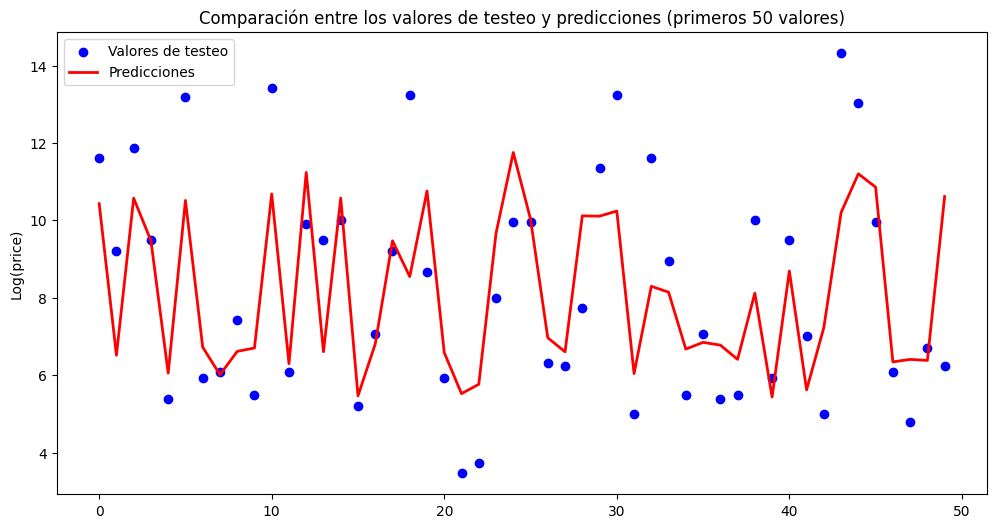

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lasso_test
y_test_subset = y_test_sqrt[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_knn_Estandarizado_test_sqrt[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Log(price)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

## Support Vector Machine

In [ ]:
modelo_SVR_sqrt= Pipeline([('scaler', RobustScaler()),
                  ('modelo',SVR())])

hiperparametros=[{'modelo__C':[1,30],'modelo__kernel':['linear']},{'modelo__gamma':[0.01,0.1], 'modelo__C':[1,30],'modelo__kernel':['rbf']}]

grilla=GridSearchCV(modelo_SVR_sqrt,hiperparametros,refit=True, cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=3)
grilla.fit(x_train_sqrt,y_train_sqrt)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('modelo', SVR())]),
             n_jobs=-1,
             param_grid=[{'modelo__C': [1, 30], 'modelo__kernel': ['linear']},
                         {'modelo__C': [1, 30], 'modelo__gamma': [0.01, 0.1],
                          'modelo__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'modelo__C': 30, 'modelo__gamma': 0.01, 'modelo__kernel': 'rbf'}


In [ ]:
modelo_SVR_sqrt=grilla.best_estimator_
modelo_SVR_sqrt.fit(x_train_sqrt, y_train_sqrt)

Pipeline(steps=[('scaler', RobustScaler()), ('modelo', SVR(C=30, gamma=0.01))])

In [ ]:
y_pred_SVR_test_sqrt = modelo_SVR_sqrt.predict(x_test_sqrt)
y_pred_SVR_train_sqrt = modelo_SVR_sqrt.predict(x_train_sqrt)

print('Precisión del modelo usando el  error cuadratico medio (MSE):')

score_train_modelo_SVR_sqrt = mse(y_train_sqrt,y_pred_SVR_train_sqrt)
score_test_modelo_SVR_sqrt = mse(y_test_sqrt,y_pred_SVR_test_sqrt)

print ("Train:", score_train_modelo_SVR_sqrt)
print ("Testeo:", score_test_modelo_SVR_sqrt)

Precisión del modelo usando el  error cuadratico medio (MSE):
Train: 3.035190787657835
Testeo: 2.7546448011503677


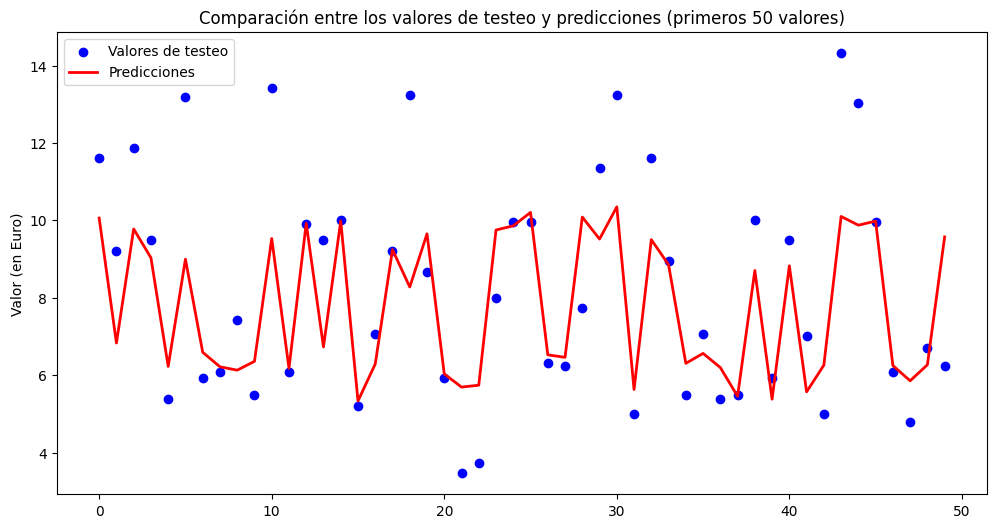

In [ ]:
# Obtenemos los primeros 50 valores de y_test y y_pred_lasso_test
y_test_subset = y_test_sqrt[:50]
y_test_subset = y_test_subset.to_numpy()
y_pred_subset = y_pred_SVR_test_sqrt[:50]

# Creamos un gráfico de dispersión para las valores de testeo
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test_subset)), y_test_subset, marker='o', color='b', label='Valores de testeo')

# Trazamos una línea para las predicciones del modelo
plt.plot(range(len(y_pred_subset)), y_pred_subset, color='r', linestyle='-', linewidth=2, label='Predicciones')

plt.ylabel('Valor (en Euro)')
plt.title('Comparación entre los valores de testeo y predicciones (primeros 50 valores)')
plt.legend()
plt.show()

## Calculo de metricas de regresión

### R2

In [ ]:
r2_rl_sqrt = r2_score(y_test_sqrt,y_pred_lineal_testeo_sqrt)
r2_lasso_sqrt = r2_score(y_test_sqrt,y_pred_lasso_test_sqrt)
r2_knn_sqrt = r2_score(y_test_sqrt,y_pred_knn_Estandarizado_test_sqrt)
r2_SVR_sqrt = r2_score(y_test_sqrt,y_pred_SVR_test_sqrt)

print("R2 de la regresion lineal simple:",r2_rl_sqrt)
print("R2 de la regresion de Lasso:",r2_lasso_sqrt)
print("R2 del modelo KNN:",r2_knn_sqrt)
print("R2 del modelo SVR:",r2_SVR_sqrt)

R2 de la regresion lineal simple: 0.5895567911779269
R2 de la regresion de Lasso: 0.5845128277398449
R2 del modelo KNN: 0.5766074198681204
R2 del modelo SVR: 0.5893874123882566


### RMSE

In [ ]:
mse_rl_sqrt = mse(np.power(y_test_sqrt, 2),np.power(y_pred_lineal_testeo_sqrt, 2))
mse_ll_sqrt = mse(np.power(y_test_sqrt,2),np.power(y_pred_lasso_test_sqrt,2))
mse_knn_sqrt = mse(np.power(y_test_sqrt,2),np.power(y_pred_knn_Estandarizado_test_sqrt,2))
mse_SVR_sqrt = mse(np.power(y_test_sqrt,2),np.power(y_pred_SVR_test_sqrt,2))

rmse_rl_sqrt = np.sqrt(mse_rl_sqrt)
rmse_lasso_sqrt = np.sqrt(mse_ll_sqrt)
rmse_knn_sqrt = np.sqrt(mse_knn_sqrt)
rmse_SVR_sqrt = np.sqrt(mse_SVR_sqrt)

print("RMSE real de la regresion lineal simple:",rmse_rl_sqrt)
print("RMSE real de la regresion de Lasso:",rmse_lasso_sqrt)
print("RMSE real del modelo KNN:",rmse_knn_sqrt)
print("RMSE real del modelo SVR:",rmse_SVR_sqrt)

RMSE real de la regresion lineal simple: 31.672474787014657
RMSE real de la regresion de Lasso: 31.93861592541454
RMSE real del modelo KNN: 31.935928478587975
RMSE real del modelo SVR: 32.134049680817355


## Coeficientes de correlación con variables transformadas a su raiz cuadrada

In [ ]:
df_reg_3.head()

is_instant_bookable  room_type  price_sqrt  cant_comodidades_sqrt  \
0                    1          0    8.426150               6.324555   
1                    1          0   12.449900               4.358899   
2                    1          0   11.661904               4.000000   
3                    0          0    7.071068               5.196152   
4                    0          0    7.745967               4.898979   

   accommodates_sqrt  bathrooms_sqrt  bedrooms_sqrt  minimum_nights_sqrt  \
0           2.449490        1.414214       1.414214             1.414214   
1           2.449490        1.000000       1.732051             1.732051   
2           2.236068        1.414214       1.414214             1.414214   
3           2.000000        1.000000       1.414214             1.732051   
4           2.449490        1.000000       1.732051             2.645751   

   maximum_nights_sqrt  availability_30_sqrt  availability_365_sqrt  
0            33.541020              0.000000              15.842980  
1            33.541020              1.732051              16.431677  
2            33.541020              3.162278              17.748239  
3             5.477226              2.236068              10.000000  
4            19.104973              1.000000              10.392305

### Spearman

In [ ]:
#Dejamos solo las variables independientes y no dicotomicas
df_spearman_sqrt = df_reg_3.drop(columns=['price_sqrt', 'is_instant_bookable', 'room_type'])

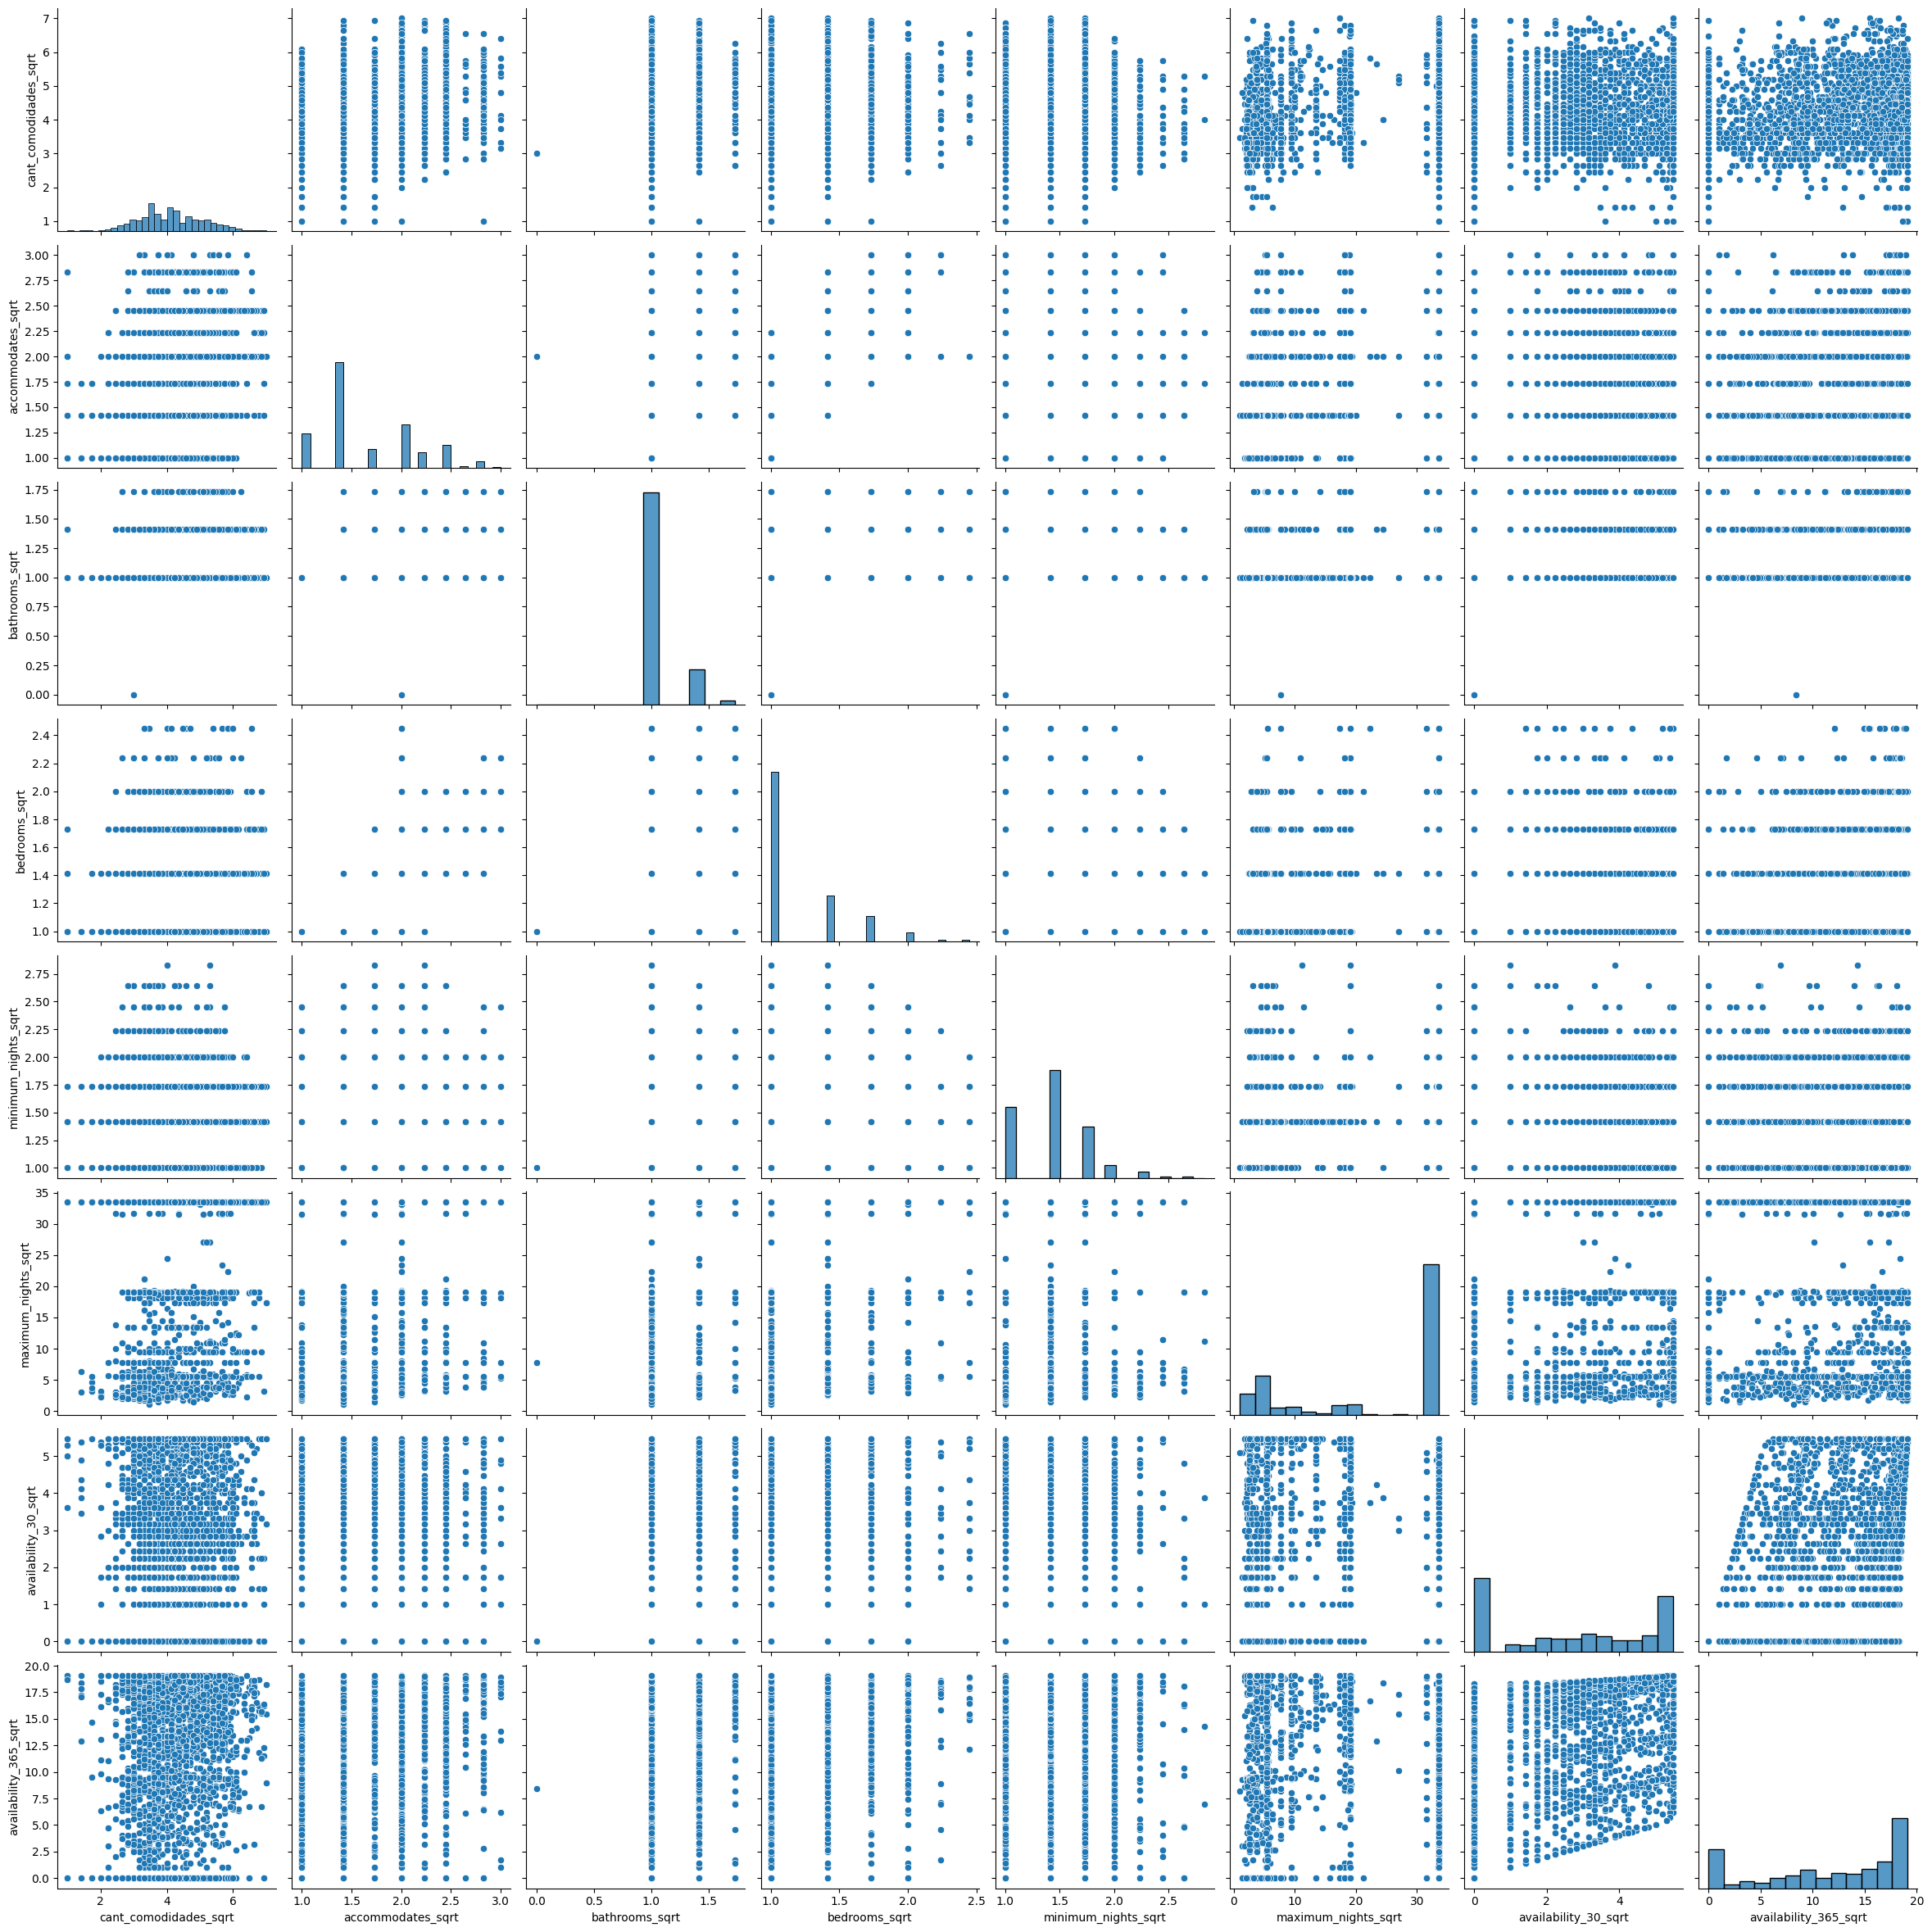

In [ ]:
#Vemos que variables se comportan de manera monotónica
sns.pairplot(df_spearman_sqrt, height = 3 )

Segun vemos, en este caso, las variables longitude-latitude y availability_30_sqrt-availability_365_sqrt presentan a simplevista un comportamiento monotónico, por lo que en este caso, evaluaremos ambos con spearman

Para los casos de spearman, analizaremos las siguientes hipotesis solo en variables numericas con comportamiento lineal o no lineal y monotónicas:
* Ho= no hay correlación entre las variables

* Ha= si hay correlación entre las variables

si p-valor es menor a 0.05 (la significancia), podemos rechazar la hipotesis nula.

In [ ]:
#Creamos una funcion que nos permita saber si rechazamos o no la hipotesis nula (para df_reg_3)
def corr_spearman(var1, var2):
  coeficiente, p_valor = stats.spearmanr(df_spearman_sqrt[var1], df_spearman_sqrt[var2])
  print(f"Coeficiente de Spearman entre '{var1}' y '{var2}':", coeficiente)
  print("P-valor:", p_valor)

#### Columnas 'availability_30_sqrt' y 'availability_365_sqrt'

In [ ]:
corr_spearman('availability_30_sqrt', 'availability_365_sqrt')

Coeficiente de Spearman entre 'availability_30_sqrt' y 'availability_365_sqrt': 0.580839811591418
P-valor: 1.906430233862269e-241


De acuerdo a esto, como el p-valor es más pequeño que 0.05, podemos rechazar la hipotesis nula y podemos decir que si existe una alta correlación entre
'availability_30_sqrt' y 'availability_365_sqrt'.

En resumen, tanto los modelos sin transformar, el modelo con las variables transformadas en su logaritmo y el modelo con las variables transformadas a su raiz cuadrada presentan una alta correlación entre las variables  'availability_30' y 'availability_365'


### Biserial

Para este coeficiente, veremos la correlación entre variables dicotómicas y numericas, para las cuales tenemos las siguientes hipotesis:
* Hipótesis nula: No existe correlación entre una variable dicotómica(o binaria) y una variable métrica.
* Hipótesis alternativa: Existe correlación entre una variable dicotómica y una variable métrica.

Si el p-valor es menor a 0.05, podemos rechazar la hipotesis nula

In [ ]:
#Hacemos un ciclo for para iterar entre las variables categoricas y numericas

var_cat_3 = ['is_instant_bookable', 'room_type']  #variables dicotómicas
var_num_3 = [ 'cant_comodidades_sqrt', 'accommodates_sqrt',
       'bathrooms_sqrt', 'bedrooms_sqrt', 'maximum_nights_sqrt', 'availability_30_sqrt',
       'availability_365_sqrt']                                                                       #'latitude', 'longitude',
pvalue=0.05

for i in var_cat_3:
    for j in var_num_3:
        #Calculamos el coeficiente biserial
      coeficiente, p_valor = stats.pointbiserialr(df_reg_3[i], df_reg_3[j])

      print(f"Coeficiente de correlación de punto biserial entre '{i}' y '{j}':", coeficiente)
      print("P-valor:", p_valor)

      if p_valor <= pvalue:
        print('Se rechaza la hipotesis nula','\n')
      else:
        print('No hay evidencia suficiente para rechazar la hipotesis nula','\n')

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'cant_comodidades_sqrt': 0.14737325897613351
P-valor: 1.791067522249704e-14
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'accommodates_sqrt': 0.13939812201260557
P-valor: 4.298836523483738e-13
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'bathrooms_sqrt': 0.07248618371456919
P-valor: 0.00017382365441774404
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'bedrooms_sqrt': 0.08172482970534023
P-valor: 2.292439568501361e-05
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'maximum_nights_sqrt': 0.04005698360004571
P-valor: 0.03819193662033596
Se rechaza la hipotesis nula 

Coeficiente de correlación de punto biserial entre 'is_instant_bookable' y 'availability_30_sqrt': 0.01937856466

Analizando las variables categoricas con cada una de las variables numericas, tenemos:

* **'is_instant_bookable'**: variable significativamente correlacionada con 'cant_comodidades_sqrt', 'accommodates_sqrt', 'bathrooms_sqrt', 'bedrooms_sqrt', 'maximum_nights_sqrt' y 'availability_365_sqrt'. Por el otro lado, no se puede rechazar la hipotesis nula con la variable  'availability_30_sqrt'.

* **'room_type'**: variable significativamente correlacionada con  'cant_comodidades_sqrt', 'accommodates_sqrt', 'bathrooms_sqrt', 'bedrooms_sqrt', 'maximum_nights_sqrt' y 'availability_365_sqrt', y por el otro lado, se puede concluir que no hay correlación entre 'room_type' la variable 'availability_30_sqrt'.

Además, se acepta la hipotesis de interes que indica que existe una correlación (y positiva) entre el tipo de habitación y el numero de baños, es decir, si el tipo de habitación es 1, el numero de baños será mayor en comparación a un tipo de habitacion = 0 (recordar que habitación=1 significa

### Chi cuadrado

Para este coeficiente, solo se analizarán las variables categoricas, es decir
 'room_type', 'availability', 'is_instant_bookable', utilizando las siguientes hipotesis:
* Ho= no hay correlación entre las variables

* Ha= si hay correlación entre las variables

si p-valor es menor a 0.05 (la significancia), podemos rechazar la hipotesis nula.

In [ ]:
#Creamos la funcion que nos permita calcular el valor de chi cuadrado y el p-valor
pvalue = 0.05
def chi2 (var_cat1, var_cat2):
  tabla_frecuencia1 = pd.crosstab(df_reg_2[var_cat1], df_reg_2[var_cat2])
  print(tabla_frecuencia1,'\n')
  # Realizar la prueba de chi-cuadrado
  chi2, p_value, _, _ = chi2_contingency(tabla_frecuencia1)

  # Imprimir los resultados
  print("Estadística de chi-cuadrado:", chi2)
  print("P-valor:", p_value)

  if p_value<= pvalue:
    print ('Se rechaza la hipotesis nula')
  else:
    print('No se rechaza la hipotesis nula')

### Correlación entre 'room_type' y 'is_instant_bookable'

In [ ]:
chi2('room_type', 'is_instant_bookable')

is_instant_bookable    0    1
room_type                    
0                    568  668
1                    801  641 

Estadística de chi-cuadrado: 24.12933731165616
P-valor: 9.00774941504379e-07
Se rechaza la hipotesis nula


Debido al bajo valor de p, podemos concluir que si existe una correlación significativa entre 'room_type' y la variable 'is_instant_bookable'

# Eleccion de el o de los mejores modelos

Se generará un gráfico comparativo entre todos los RMSE y los R². De esta manera se podrá ver que modelo es el de mejor rendimiento en base a estas 2 metricas.

In [ ]:
#Generamos listas con cada modelo de machine learning
model_names = ['rl', 'rl_log', 'rl_sqrt', 'lasso', 'lasso_log', 'lasso_sqrt', 'knn', 'knn_log', 'knn_sqrt', 'SVR', 'SVR_log', 'SVR_sqrt']

# Lista de valores de RMSE correspondientes a cada modelo
rmse_values = [rmse_rl, rmse_rl_log, rmse_rl_sqrt, rmse_lasso, rmse_lasso_log, rmse_lasso_sqrt, rmse_knn, rmse_knn_log, rmse_knn_sqrt, rmse_SVR, rmse_SVR_log, rmse_SVR_sqrt]

# Lista de valores de R^2 correspondientes a cada modelo
r2_values = [r2_rl, r2_rl_log, r2_rl_sqrt, r2_lasso, r2_lasso_log, r2_lasso_sqrt, r2_knn, r2_knn_log, r2_knn_sqrt, r2_SVR, r2_SVR_log, r2_SVR_sqrt]

# Encontramos el índice del modelo con el menor RMSE
best_rmse_model_index = np.argmin(rmse_values)

# Encontramos el índice del modelo con el mayor R^2
best_r2_model_index = np.argmax(r2_values)


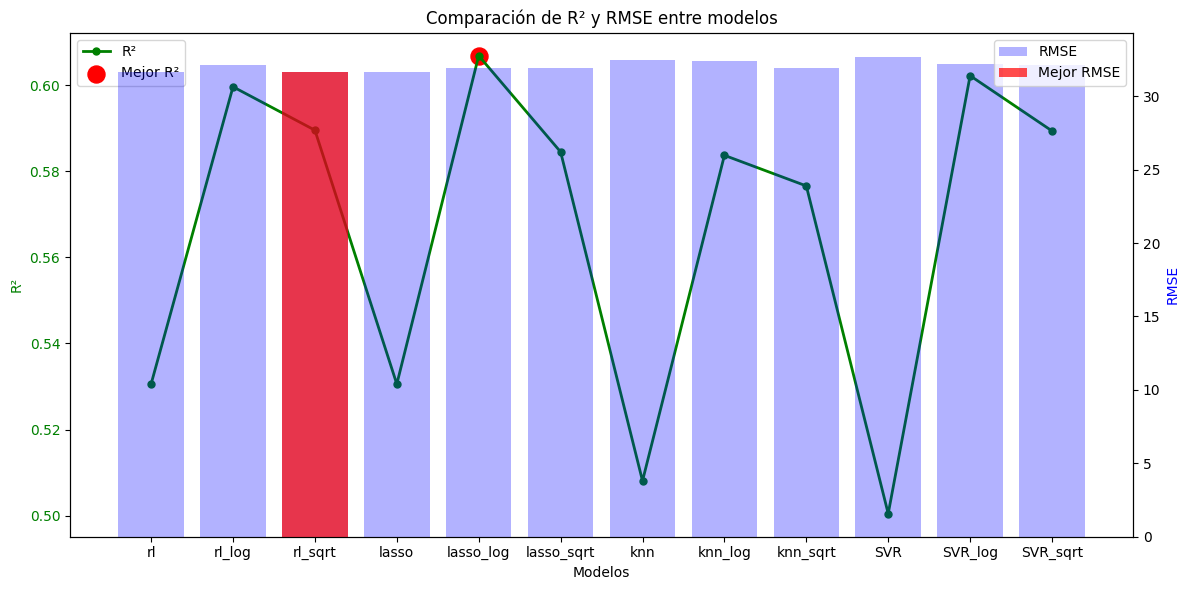

In [ ]:
# Crear subgráficos con dos ejes y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Configurar primer eje y para R² (color verde, puntos unidos por líneas)
ax1.set_xlabel('Modelos')
ax1.set_ylabel('R²', color='green')
ax1.plot(model_names, r2_values, color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='R²')
ax1.tick_params(axis='y', labelcolor='green')

# Resaltamos el mejor valor de R² con un punto rojo
ax1.scatter(model_names[best_r2_model_index], r2_values[best_r2_model_index], color='red', s=150, label='Mejor R²')

# Creamos el segundo eje "y" para RMSE
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='blue')
ax2.bar(model_names, rmse_values, color='blue', alpha=0.3, label='RMSE')

# Resaltamos el mejor valor de RMSE gracias a los indices que se guardaron anteriormente
ax2.bar(model_names[best_rmse_model_index], rmse_values[best_rmse_model_index], color='red', alpha=0.7, label='Mejor RMSE')

# Ajustamos las leyendas y títulos
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_title('Comparación de R² y RMSE entre modelos')
fig.tight_layout()

plt.show()

In [ ]:
#Veamos los 2 mejores modelos
print('R2 rl_sqrt:', r2_rl_sqrt )
print('RMSE rl_sqrt:', rmse_rl_sqrt )
print("")
print('R2 lasso_log', r2_lasso_log )
print('RMSE lasso_log', rmse_lasso_log )

R2 rl_sqrt: 0.5895567911779269
RMSE rl_sqrt: 31.672474787014657

R2 lasso_log 0.6068625679749882
RMSE lasso_log 32.18521626134463


## Predicciones

Se realizaran las mismas predicciones para los 2 mejores modelos, es decir, tanto para el modelo de Lars Lasso con variables transformadas a logaritmo como para el modelo Regresión Lineal con variables transformadas a su raíz cuadrada.

### Lars Lasso log

In [ ]:
''' Orden de valores para predecir precio
        'cant_comodidades_log', 'accommodates_log',
       'bathrooms_log', 'bedrooms_log', 'minimum_nights_log', 'maximum_nights_log', 'availability_30_log',
       'availability_365_log', 'availability', 'is_instant_bookable', 'room_type',
'''

x_new = [[np.log1p(17), np.log1p(3),
          np.log1p(2), np.log1p(4), np.log1p(3), np.log1p(20), np.log1p(15),
          np.log1p(45),1, 0,]]

#Realizamos la predicción usando el modelo usando de Larss Lasso (mayor r2 y menor valor de RMSE)
prediccion = modelo_lasso_log.predict(x_new)

# La variable 'prediccion' ahora contiene el valor predicho del target para las nuevas características proporcionadas
print("Predicción del target:", prediccion)
print("Prediccion real del target",np.expm1(prediccion) )

Predicción del target: [4.70509721]
Prediccion real del target [109.50902725]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RobustScaler was fitted with feature names



In [ ]:
df_reg_2.head()

is_instant_bookable  room_type  price_log  cant_comodidades_log  \
0                    1          0   4.276666              3.713572   
1                    1          0   5.049856              2.995732   
2                    1          0   4.919981              2.833213   
3                    0          0   3.931826              3.332205   
4                    0          0   4.110874              3.218876   

   accommodates_log  bathrooms_log  bedrooms_log  minimum_nights_log  \
0          1.945910       1.098612      1.098612            1.098612   
1          1.945910       0.693147      1.386294            1.386294   
2          1.791759       1.098612      1.098612            1.098612   
3          1.609438       0.693147      1.098612            1.386294   
4          1.945910       0.693147      1.386294            2.079442   

   maximum_nights_log  availability_30_log  availability_365_log  
0            7.026427             0.000000              5.529429  
1            7.026427             1.386294              5.602119  
2            7.026427             2.397895              5.755742  
3            3.433987             1.791759              4.615121  
4            5.902633             0.693147              4.691348

In [ ]:
df.head()

price  cant_comodidades  accommodates  bathrooms  bedrooms  minimum_nights  \
0   71.0              40.0           6.0        2.0       2.0             2.0   
1  155.0              19.0           6.0        1.0       3.0             3.0   
2  136.0              16.0           5.0        2.0       2.0             2.0   
3   50.0              27.0           4.0        1.0       2.0             3.0   
4   60.0              24.0           6.0        1.0       3.0             7.0   

   maximum_nights  availability_30  availability_365  is_instant_bookable  \
0            1125                0               251                    1   
1            1125                3               270                    1   
2            1125               10               315                    1   
3              30                5               100                    0   
4             365                1               108                    0   

   room_type  
0          0  
1          0  
2          0  
3          0  
4          0

In [ ]:
#tomando los valores del index 2 del df
x_new = [[2.833213	,	1.791759,
          1.098612,	1.098612, 1.098612,	7.026427,	2.397895,
          5.755742,	1,	0]]
#debe dar 136

prediccion = modelo_lasso_log.predict(x_new)

# La variable 'prediccion' ahora contiene el valor predicho del target para las nuevas características proporcionadas
print("Predicción del target:", prediccion)
print("Prediccion real del target",np.expm1(prediccion) )

Predicción del target: [4.69952743]
Prediccion real del target [108.89522741]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RobustScaler was fitted with feature names



In [ ]:
'''Otra prediccion con un valor del df,
el precio debe ser 60 (tomando los valores del index=4)'''
x_new = [[3.218876, 1.945910,
          0.693147,	1.386294,	2.079442, 5.902633, 0.693147,
          4.691348, 0, 0]]
# Realizamos la predicción usando el modelo
prediccion = modelo_lasso_log.predict(x_new)

# La variable 'prediccion' ahora contiene el valor predicho del target para las nuevas características proporcionadas
print("Predicción del target:", prediccion)
print("Prediccion real del target",np.expm1(prediccion) )


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RobustScaler was fitted with feature names



Predicción del target: [4.64199395]
Prediccion real del target [102.75101588]


### Regresión lineal sqrt

In [ ]:
#Utilizando los mismos valores
x_new = [[np.sqrt(17), np.sqrt(3),
          np.sqrt(2), np.sqrt(4), np.sqrt(3), np.sqrt(20), np.sqrt(15),
          np.sqrt(45),1, 0,]]

#Realizamos la predicción usando el modelo usando la regresion polinomica de grado 2 (mayor r2 y menor valor de RMSE)
prediccion = modelo_lr_sqrt.predict(x_new)

# La variable 'prediccion' ahora contiene el valor predicho del target para las nuevas características proporcionadas
print("Predicción del target:", prediccion)
print("Prediccion real del target",np.power(prediccion,2) )

Predicción del target: [10.55141231]
Prediccion real del target [111.33230184]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RobustScaler was fitted with feature names



In [ ]:
df_reg_3.head()

is_instant_bookable  room_type  price_sqrt  cant_comodidades_sqrt  \
0                    1          0    8.426150               6.324555   
1                    1          0   12.449900               4.358899   
2                    1          0   11.661904               4.000000   
3                    0          0    7.071068               5.196152   
4                    0          0    7.745967               4.898979   

   accommodates_sqrt  bathrooms_sqrt  bedrooms_sqrt  minimum_nights_sqrt  \
0           2.449490        1.414214       1.414214             1.414214   
1           2.449490        1.000000       1.732051             1.732051   
2           2.236068        1.414214       1.414214             1.414214   
3           2.000000        1.000000       1.414214             1.732051   
4           2.449490        1.000000       1.732051             2.645751   

   maximum_nights_sqrt  availability_30_sqrt  availability_365_sqrt  
0            33.541020              0.000000              15.842980  
1            33.541020              1.732051              16.431677  
2            33.541020              3.162278              17.748239  
3             5.477226              2.236068              10.000000  
4            19.104973              1.000000              10.392305

In [ ]:
x_test_sqrt.columns

Index(['cant_comodidades_sqrt', 'accommodates_sqrt', 'bathrooms_sqrt',
       'bedrooms_sqrt', 'minimum_nights_sqrt', 'maximum_nights_sqrt',
       'availability_30_sqrt', 'availability_365_sqrt', 'is_instant_bookable',
       'room_type'],
      dtype='object')

In [ ]:
#tomando los valores del index 2 del df
x_new = [[4	,	2.236068,
          1.414214,	1.414214, 1.414214,
          33.541020,	3.162278, 17.748239,
          1,	0]]
#debe dar 136

prediccion = modelo_lr_sqrt.predict(x_new)

# La variable 'prediccion' ahora contiene el valor predicho del target para las nuevas características proporcionadas
print("Predicción del target:", prediccion)
print("Prediccion real del target",np.power(prediccion,2) )

Predicción del target: [10.75790149]
Prediccion real del target [115.73244438]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RobustScaler was fitted with feature names



In [ ]:
'''Otra prediccion con un valor del df,
el precio debe ser 60 (tomando los valores del index=4)'''
x_new = [[4.898979,	2.449490,
          1,	1.732051, 2.645751,
          19.104973,	1, 10.392305,
          0,	0]]
# Realizamos la predicción usando el modelo
prediccion = modelo_lr_sqrt.predict(x_new)

# La variable 'prediccion' ahora contiene el valor predicho del target para las nuevas características proporcionadas
print("Predicción del target:", prediccion)
print("Prediccion real del target",np.power(prediccion,2) )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RobustScaler was fitted with feature names



Predicción del target: [10.43325398]
Prediccion real del target [108.8527887]


# Mejora de los modelos elegidos

El modelo elegido es la Regresión Lineal con variables transformadas a raiz cuadrada ya que tiene el menor RMSE (0.51 euros menos que Lasso con logaritmo) y un r2 similar (0.59 vs 0.61), sin embargo se mejoraran los mejores 2 modelos mediante ColumnTransformer para ver el resultado final.

In [ ]:
#Librerias necesarias
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## Regresión lineal con variables transformadas a raiz cuadrada

### Modelo con ColumnTransformer

In [ ]:
df_reg_3.head()

is_instant_bookable        room_type  price_sqrt  cant_comodidades_sqrt  \
0                True  Entire home/apt    8.426150               6.324555   
1                True  Entire home/apt   12.449900               4.358899   
2                True  Entire home/apt   11.661904               4.000000   
3               False  Entire home/apt    7.071068               5.196152   
4               False  Entire home/apt    7.745967               4.898979   

   accommodates_sqrt  bathrooms_sqrt  bedrooms_sqrt  minimum_nights_sqrt  \
0           2.449490        1.414214       1.414214             1.414214   
1           2.449490        1.000000       1.732051             1.732051   
2           2.236068        1.414214       1.414214             1.414214   
3           2.000000        1.000000       1.414214             1.732051   
4           2.449490        1.000000       1.732051             2.645751   

   maximum_nights_sqrt  availability_30_sqrt  availability_365_sqrt  
0            33.541020              0.000000              15.842980  
1            33.541020              1.732051              16.431677  
2            33.541020              3.162278              17.748239  
3             5.477226              2.236068              10.000000  
4            19.104973              1.000000              10.392305

In [ ]:
#hacemos categoricas las columnas 'is_instant_bookable' y 'room_type' para que ColumnTransformer lo haga con el modelo y con datos del usuario objetivo
df_reg_3['is_instant_bookable'] = df_reg_3['is_instant_bookable'].map({0: 'False', 1: 'True'})
df_reg_3['room_type'] = df_reg_3['room_type'].map({0: 'Entire home/apt', 1: 'Private room'})
df_reg_3.head()

is_instant_bookable room_type  price_sqrt  cant_comodidades_sqrt  \
0                 NaN       NaN    8.426150               6.324555   
1                 NaN       NaN   12.449900               4.358899   
2                 NaN       NaN   11.661904               4.000000   
3                 NaN       NaN    7.071068               5.196152   
4                 NaN       NaN    7.745967               4.898979   

   accommodates_sqrt  bathrooms_sqrt  bedrooms_sqrt  minimum_nights_sqrt  \
0           2.449490        1.414214       1.414214             1.414214   
1           2.449490        1.000000       1.732051             1.732051   
2           2.236068        1.414214       1.414214             1.414214   
3           2.000000        1.000000       1.414214             1.732051   
4           2.449490        1.000000       1.732051             2.645751   

   maximum_nights_sqrt  availability_30_sqrt  availability_365_sqrt  
0            33.541020              0.000000              15.842980  
1            33.541020              1.732051              16.431677  
2            33.541020              3.162278              17.748239  
3             5.477226              2.236068              10.000000  
4            19.104973              1.000000              10.392305

In [ ]:
# Definir el preprocesador
preprocessor_rl = ColumnTransformer(
    transformers=[
        ('category_pipeline', Pipeline([                  #pipeline para variables categoricas
            ('impute', SimpleImputer(strategy='most_frequent')),      #las variables categoricas se imputan con la moda
            ('encode', OneHotEncoder(drop='first'))
        ]), ['is_instant_bookable', 'room_type']),                              #aqui ponemos las variables a las cuales le haremos las transformaciones
        ('numeric_pipeline', Pipeline([                        #este es otro pipeline para variables numericas
            ('impute', SimpleImputer(strategy='median')),       #aqui imputamos con la mediana
            ('scale', RobustScaler())                         #aplicamos el escalador
        ]), ['cant_comodidades_sqrt', 'accommodates_sqrt','bathrooms_sqrt', 'bedrooms_sqrt',
             'minimum_nights_sqrt', 'maximum_nights_sqrt','availability_30_sqrt', 'availability_365_sqrt'])],
    remainder='drop')

In [ ]:
x_train_sqrt

cant_comodidades_sqrt  accommodates_sqrt  bathrooms_sqrt  bedrooms_sqrt  \
2360               6.000000           1.414214        1.000000       1.000000   
2304               4.898979           1.414214        1.000000       1.000000   
1517               4.123106           1.000000        1.000000       1.000000   
1004               4.472136           2.000000        1.000000       1.414214   
69                 4.242641           2.236068        1.000000       1.732051   
...                     ...                ...             ...            ...   
1638               5.744563           1.000000        1.000000       1.000000   
1095               4.795832           2.828427        1.414214       2.000000   
1130               4.690416           2.236068        1.414214       1.414214   
1294               3.605551           1.414214        1.000000       1.000000   
860                4.795832           2.000000        1.414214       1.732051   

      minimum_nights_sqrt  maximum_nights_sqrt  availability_30_sqrt  \
2360             1.414214             3.162278              3.605551   
2304             1.732051            33.541020              3.872983   
1517             1.000000            33.541020              5.477226   
1004             1.414214            33.541020              5.477226   
69               1.000000            33.541020              3.316625   
...                   ...                  ...                   ...   
1638             2.236068            33.541020              0.000000   
1095             1.732051             4.472136              3.464102   
1130             1.414214            33.541020              0.000000   
1294             1.000000            33.541020              0.000000   
860              1.732051            33.541020              3.000000   

      availability_365_sqrt  is_instant_bookable  room_type  
2360              15.684387                    1          1  
2304               5.291503                    1          1  
1517              17.832555                    1          1  
1004              19.104973                    0          0  
69                12.288206                    1          0  
...                     ...                  ...        ...  
1638              15.937377                    0          1  
1095              16.552945                    1          0  
1130               1.414214                    1          0  
1294               0.000000                    0          1  
860               16.431677                    0          0  

[2142 rows x 10 columns]

In [ ]:
df2_1 = preprocessor_rl.fit_transform(x_train_sqrt)
df3_1= pd.DataFrame(df2_1)
df3_1

0    1         2         3         4         5         6         7  \
0     1.0  1.0  1.501806  0.000000  0.000000  0.000000  0.000000 -1.177696   
1     1.0  1.0  0.675046  0.000000  0.000000  0.000000  0.434174  0.000000   
2     1.0  1.0  0.092440 -0.707107  0.000000  0.000000 -0.565826  0.000000   
3     0.0  0.0  0.354528  1.000000  0.000000  1.000000  0.000000  0.000000   
4     1.0  0.0  0.182200  1.402993  0.000000  1.767327 -0.565826  0.000000   
...   ...  ...       ...       ...       ...       ...       ...       ...   
2137  0.0  1.0  1.309997 -0.707107  0.000000  0.000000  1.122674  0.000000   
2138  1.0  0.0  0.597592  2.414214  0.414214  2.414214  0.434174 -1.126917   
2139  1.0  0.0  0.518435  1.402993  0.414214  1.000000  0.000000  0.000000   
2140  0.0  1.0 -0.296193  0.000000  0.000000  0.000000 -0.565826  0.000000   
2141  0.0  0.0  0.597592  1.000000  0.414214  1.767327  0.434174  0.000000   

             8         9  
0     0.123608  0.210202  
1     0.178197 -0.753038  
2     0.505662  0.409300  
3     0.505662  0.527231  
4     0.064631 -0.104565  
...        ...       ...  
2137 -0.612372  0.233650  
2138  0.094734  0.290703  
2139 -0.612372 -1.112395  
2140 -0.612372 -1.243469  
2141  0.000000  0.279463  

[2142 rows x 10 columns]

In [ ]:
# Crear el pipeline con preprocesamiento y la regresion de lasso
pipeline_sqrt = Pipeline([
    ('preprocessor', preprocessor_rl),
    ('features', PolynomialFeatures()),
    ('regression', LinearRegression(fit_intercept=True))
])

# Definir la grilla de hiperparámetros
hiperparametros={'features__degree':[1,2,3,4]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
grilla = GridSearchCV(pipeline_sqrt, hiperparametros, cv=5, scoring='neg_root_mean_squared_error')
grilla.fit(x_train_sqrt,y_train_sqrt)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('category_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['is_instant_bookable',
                                                                          'room_type']),
                                                                        ('numeric_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          RobustScaler())]),
                                                                         ['cant_comodidades_sqrt',
                                                                          'accommodates_sqrt',
                                                                          'bathrooms_sqrt',
                                                                          'bedrooms_sqrt',
                                                                          'minimum_nights_sqrt',
                                                                          'maximum_nights_sqrt',
                                                                          'availability_30_sqrt',
                                                                          'availability_365_sqrt'])])),
                                       ('features', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'features__degree': [1, 2, 3, 4]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'features__degree': 1}


In [ ]:
modelo_reg_sqrt=grilla.best_estimator_
modelo_reg_sqrt.fit(x_train_sqrt, y_train_sqrt)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('category_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['is_instant_bookable',
                                                   'room_type']),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['cant_comodidades_sqrt',
                                                   'accommodates_sqrt',
                                                   'bathrooms_sqrt',
                                                   'bedrooms_sqrt',
                                                   'minimum_nights_sqrt',
                                                   'maximum_nights_sqrt',
                                                   'availability_30_sqrt',
                                                   'availability_365_sqrt'])])),
                ('features', PolynomialFeatures(degree=1)),
                ('regression', LinearRegression())])

### Metricas

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_train_sqrt = modelo_reg_sqrt.predict(x_train_sqrt)
y_pred_test_sqrt= modelo_reg_sqrt.predict(x_test_sqrt)


In [ ]:
#vemos el r2 con el modelo de lasso larss transformado
r2_reg_sqrt_tr = r2_score(y_test_sqrt,y_pred_test_sqrt)
print(r2_reg_sqrt_tr)

0.5895567911779268


In [ ]:
mse_rl_sqrt_tr = mse(np.power(y_test_sqrt, 2),np.power(y_pred_test_sqrt, 2))
rmse_rl_sqrt_tr = np.sqrt(mse_rl_sqrt_tr)
print("RMSE real de la regresion lineal simple:",rmse_rl_sqrt_tr)

RMSE real de la regresion lineal simple: 31.67247478701466


Como vemos, el R2 y el RMSE se mantienen igual que el modelo sin ColumnTransformer (0.59 y 31.67 euros respectivamente), la diferencia es que ahora podemos predecir valores de renta con valores faltantes

## Larss Lasso con variables transformadas a su logaritmo

### Modelo con ColumnTransformer

In [ ]:
df_reg_2.head()

is_instant_bookable  room_type  price_log  cant_comodidades_log  \
0                    1          0   4.276666              3.713572   
1                    1          0   5.049856              2.995732   
2                    1          0   4.919981              2.833213   
3                    0          0   3.931826              3.332205   
4                    0          0   4.110874              3.218876   

   accommodates_log  bathrooms_log  bedrooms_log  minimum_nights_log  \
0          1.945910       1.098612      1.098612            1.098612   
1          1.945910       0.693147      1.386294            1.386294   
2          1.791759       1.098612      1.098612            1.098612   
3          1.609438       0.693147      1.098612            1.386294   
4          1.945910       0.693147      1.386294            2.079442   

   maximum_nights_log  availability_30_log  availability_365_log  
0            7.026427             0.000000              5.529429  
1            7.026427             1.386294              5.602119  
2            7.026427             2.397895              5.755742  
3            3.433987             1.791759              4.615121  
4            5.902633             0.693147              4.691348

In [ ]:
#hacemos categoricas las columnas 'is_instant_bookable' y 'room_type' para que ColumnTransformer lo haga con el modelo y con datos del usuario objetivo
df_reg_2['is_instant_bookable'] = df_reg_2['is_instant_bookable'].map({0: 'False', 1: 'True'})
df_reg_2['room_type'] = df_reg_2['room_type'].map({0: 'Entire home/apt', 1: 'Private room'})
df_reg_2.head()

is_instant_bookable        room_type  price_log  cant_comodidades_log  \
0                True  Entire home/apt   4.276666              3.713572   
1                True  Entire home/apt   5.049856              2.995732   
2                True  Entire home/apt   4.919981              2.833213   
3               False  Entire home/apt   3.931826              3.332205   
4               False  Entire home/apt   4.110874              3.218876   

   accommodates_log  bathrooms_log  bedrooms_log  minimum_nights_log  \
0          1.945910       1.098612      1.098612            1.098612   
1          1.945910       0.693147      1.386294            1.386294   
2          1.791759       1.098612      1.098612            1.098612   
3          1.609438       0.693147      1.098612            1.386294   
4          1.945910       0.693147      1.386294            2.079442   

   maximum_nights_log  availability_30_log  availability_365_log  
0            7.026427             0.000000              5.529429  
1            7.026427             1.386294              5.602119  
2            7.026427             2.397895              5.755742  
3            3.433987             1.791759              4.615121  
4            5.902633             0.693147              4.691348

In [ ]:
# Definir el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('category_pipeline', Pipeline([                  #pipeline para variables categoricas
            ('impute', SimpleImputer(strategy='most_frequent')),      #las variables categoricas se imputan con la moda
            ('encode', OneHotEncoder(drop='first'))
        ]), ['is_instant_bookable', 'room_type']),                              #aqui ponemos las variables a las cuales le haremos las transformaciones
        ('numeric_pipeline', Pipeline([                        #este es otro pipeline para variables numericas
            ('impute', SimpleImputer(strategy='median')),       #aqui imputamos con la mediana
            ('scale', RobustScaler())                         #aplicamos el escalador
        ]), ['cant_comodidades_log', 'accommodates_log','bathrooms_log', 'bedrooms_log',
             'minimum_nights_log', 'maximum_nights_log','availability_30_log', 'availability_365_log'])],
    remainder='drop')

In [ ]:
x_train_log

cant_comodidades_log  accommodates_log  bathrooms_log  bedrooms_log  \
2360              3.610918          1.098612       0.693147      0.693147   
2304              3.218876          1.098612       0.693147      0.693147   
1517              2.890372          0.693147       0.693147      0.693147   
1004              3.044522          1.609438       0.693147      1.098612   
69                2.944439          1.791759       0.693147      1.386294   
...                    ...               ...            ...           ...   
1638              3.526361          0.693147       0.693147      0.693147   
1095              3.178054          2.197225       1.098612      1.609438   
1130              3.135494          1.791759       1.098612      1.098612   
1294              2.639057          1.098612       0.693147      0.693147   
860               3.178054          1.609438       1.098612      1.386294   

      minimum_nights_log  maximum_nights_log  availability_30_log  \
2360            1.098612            2.397895             2.639057   
2304            1.386294            7.026427             2.772589   
1517            0.693147            7.026427             3.433987   
1004            1.098612            7.026427             3.433987   
69              0.693147            7.026427             2.484907   
...                  ...                 ...                  ...   
1638            1.791759            7.026427             0.000000   
1095            1.386294            3.044522             2.564949   
1130            1.098612            7.026427             0.000000   
1294            0.693147            7.026427             0.000000   
860             1.386294            7.026427             2.302585   

      availability_365_log  is_instant_bookable  room_type  
2360              5.509388                    1          1  
2304              3.367296                    1          1  
1517              5.765191                    1          1  
1004              5.902633                    0          0  
69                5.023881                    1          0  
...                    ...                  ...        ...  
1638              5.541264                    0          1  
1095              5.616771                    1          0  
1130              1.098612                    1          0  
1294              0.000000                    0          1  
860               5.602119                    0          0  

[2142 rows x 10 columns]

In [ ]:
df2 = preprocessor.fit_transform(x_train_log)
df3= pd.DataFrame(df2)
df3

0    1         2         3         4         5         6         7  \
0     1.0  1.0  1.268470  0.000000  0.000000  0.000000  0.000000 -1.587531   
1     1.0  1.0  0.629032  0.000000  0.000000  0.000000  0.415037  0.000000   
2     1.0  1.0  0.093228 -0.793745  0.000000  0.000000 -0.584963  0.000000   
3     0.0  0.0  0.344654  1.000000  0.000000  1.000000  0.000000  0.000000   
4     1.0  0.0  0.181414  1.356915  0.000000  1.709511 -0.584963  0.000000   
...   ...  ...       ...       ...       ...       ...       ...       ...   
2137  0.0  1.0  1.130553 -0.793745  0.000000  0.000000  1.000000  0.000000   
2138  1.0  0.0  0.562450  2.150660  0.405465  2.259851  0.415037 -1.365746   
2139  1.0  0.0  0.493033  1.356915  0.405465  1.000000  0.000000  0.000000   
2140  0.0  1.0 -0.316677  0.000000  0.000000  0.000000 -0.584963  0.000000   
2141  0.0  0.0  0.562450  1.000000  0.405465  1.709511  0.415037  0.000000   

             8         9  
0     0.104531  0.169285  
1     0.146015 -0.997117  
2     0.351490  0.308574  
3     0.351490  0.383413  
4     0.056641 -0.095081  
...        ...       ...  
2137 -0.715338  0.186642  
2138  0.081508  0.227757  
2139 -0.715338 -2.232450  
2140 -0.715338 -2.830662  
2141  0.000000  0.219778  

[2142 rows x 10 columns]

In [ ]:
# Crear el pipeline con preprocesamiento y la regresion de lasso
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('features', PolynomialFeatures(include_bias=False)),
    ('model', LassoLars())
])

# Definir la grilla de hiperparámetros
hiperparametros = {'features__degree': [1, 2, 3, 4], 'model__alpha': [1e-05, 1e-04, 1e-03, 1e-02]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
grilla = GridSearchCV(pipeline, hiperparametros, cv=5, scoring='neg_root_mean_squared_error')
grilla.fit(x_train_log,y_train_log)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 50 iterations, i.e. alpha=9.149e-04, with an active set of 38 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:678: ConvergenceWarning:

Early stopping the lars path, as the residues are small and the current value of alpha is no longer well controlled. 77 iterations, alpha=9.094e-05, previous alpha=8.780e-05, with an active set of 60 regressors.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:648: ConvergenceWarning:

Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.946e-02, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('category_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encode',
                                                                                          OneHotEncoder(drop='first'))]),
                                                                         ['is_instant_bookable',
                                                                          'room_type']),
                                                                        ('numeric_pipeline',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scale',
                                                                                          Rob...
                                                                         ['cant_comodidades_log',
                                                                          'accommodates_log',
                                                                          'bathrooms_log',
                                                                          'bedrooms_log',
                                                                          'minimum_nights_log',
                                                                          'maximum_nights_log',
                                                                          'availability_30_log',
                                                                          'availability_365_log'])])),
                                       ('features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', LassoLars())]),
             param_grid={'features__degree': [1, 2, 3, 4],
                         'model__alpha': [1e-05, 0.0001, 0.001, 0.01]},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", grilla.best_params_)

Mejores parámetros: {'features__degree': 1, 'model__alpha': 0.001}


In [ ]:
modelo_lasso_log=grilla.best_estimator_
modelo_lasso_log.fit(x_train_log, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('category_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['is_instant_bookable',
                                                   'room_type']),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['cant_comodidades_log',
                                                   'accommodates_log',
                                                   'bathrooms_log',
                                                   'bedrooms_log',
                                                   'minimum_nights_log',
                                                   'maximum_nights_log',
                                                   'availability_30_log',
                                                   'availability_365_log'])])),
                ('features', PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LassoLars(alpha=0.001))])

### Metricas

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_train_lasso_tr = modelo_lasso_log.predict(x_train_log)
y_pred_test_lasso_tr= modelo_lasso_log.predict(x_test_log)

In [ ]:
#vemos el r2 con el modelo de lasso larss transformado
r2_lasso_log_tr = r2_score(y_test_log,y_pred_test_lasso_tr)
print(r2_lasso_log_tr)

0.599737749618056


In [ ]:
#RMSE del modelo Lasso Larss con el pipeline de ColumnTransformer
mse_ll_log_tr = mse(np.expm1(y_test_log),np.expm1(y_pred_test_lasso_tr))
rmse_lasso_log_tr = np.sqrt(mse_ll_log_tr)

print("RMSE real de la regresion de Lasso:",rmse_lasso_log_tr)


RMSE real de la regresion de Lasso: 32.18521626134463


Como vemos, el R2 baja de 0.61 a 0.60 y el RMSEse mantiene en 32.19, por lo que las diferencias son minimas.

# Optimización del modelo final

Estas mejoras serán con halving grid search y random search. A la regresión lineal con variables transformadas a su raiz cuadrada no se le hará ninguno de esos metodos ya que solo cuenta con un tipo de parametros (degree), por lo que no es necesario realizar halving grid search o random grid search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

## Modelo de Larss Lasso con variables logaritmicas

### ColumnTransformer

In [ ]:
# Definir el preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('category_pipeline', Pipeline([                  #pipeline para variables categoricas
            ('impute', SimpleImputer(strategy='most_frequent')),      #las variables categoricas se imputan con la moda
            ('encode', OneHotEncoder(drop='first'))
        ]), ['is_instant_bookable', 'room_type']),                              #aqui ponemos las variables a las cuales le haremos las transformaciones
        ('numeric_pipeline', Pipeline([                        #este es otro pipeline para variables numericas
            ('impute', SimpleImputer(strategy='median')),       #aqui imputamos con la mediana
            ('scale', RobustScaler())                         #aplicamos el escalador
        ]), ['cant_comodidades_log', 'accommodates_log','bathrooms_log', 'bedrooms_log',
             'minimum_nights_log', 'maximum_nights_log','availability_30_log', 'availability_365_log'])],
    remainder='drop')

In [ ]:
x_train_log

cant_comodidades_log  accommodates_log  bathrooms_log  bedrooms_log  \
2360              3.610918          1.098612       0.693147      0.693147   
2304              3.218876          1.098612       0.693147      0.693147   
1517              2.890372          0.693147       0.693147      0.693147   
1004              3.044522          1.609438       0.693147      1.098612   
69                2.944439          1.791759       0.693147      1.386294   
...                    ...               ...            ...           ...   
1638              3.526361          0.693147       0.693147      0.693147   
1095              3.178054          2.197225       1.098612      1.609438   
1130              3.135494          1.791759       1.098612      1.098612   
1294              2.639057          1.098612       0.693147      0.693147   
860               3.178054          1.609438       1.098612      1.386294   

      minimum_nights_log  maximum_nights_log  availability_30_log  \
2360            1.098612            2.397895             2.639057   
2304            1.386294            7.026427             2.772589   
1517            0.693147            7.026427             3.433987   
1004            1.098612            7.026427             3.433987   
69              0.693147            7.026427             2.484907   
...                  ...                 ...                  ...   
1638            1.791759            7.026427             0.000000   
1095            1.386294            3.044522             2.564949   
1130            1.098612            7.026427             0.000000   
1294            0.693147            7.026427             0.000000   
860             1.386294            7.026427             2.302585   

      availability_365_log  is_instant_bookable  room_type  
2360              5.509388                    1          1  
2304              3.367296                    1          1  
1517              5.765191                    1          1  
1004              5.902633                    0          0  
69                5.023881                    1          0  
...                    ...                  ...        ...  
1638              5.541264                    0          1  
1095              5.616771                    1          0  
1130              1.098612                    1          0  
1294              0.000000                    0          1  
860               5.602119                    0          0  

[2142 rows x 10 columns]

In [ ]:
df2 = preprocessor.fit_transform(x_train_log)
df3= pd.DataFrame(df2)
df3

0    1         2         3         4         5         6         7  \
0     1.0  1.0  1.268470  0.000000  0.000000  0.000000  0.000000 -1.587531   
1     1.0  1.0  0.629032  0.000000  0.000000  0.000000  0.415037  0.000000   
2     1.0  1.0  0.093228 -0.793745  0.000000  0.000000 -0.584963  0.000000   
3     0.0  0.0  0.344654  1.000000  0.000000  1.000000  0.000000  0.000000   
4     1.0  0.0  0.181414  1.356915  0.000000  1.709511 -0.584963  0.000000   
...   ...  ...       ...       ...       ...       ...       ...       ...   
2137  0.0  1.0  1.130553 -0.793745  0.000000  0.000000  1.000000  0.000000   
2138  1.0  0.0  0.562450  2.150660  0.405465  2.259851  0.415037 -1.365746   
2139  1.0  0.0  0.493033  1.356915  0.405465  1.000000  0.000000  0.000000   
2140  0.0  1.0 -0.316677  0.000000  0.000000  0.000000 -0.584963  0.000000   
2141  0.0  0.0  0.562450  1.000000  0.405465  1.709511  0.415037  0.000000   

             8         9  
0     0.104531  0.169285  
1     0.146015 -0.997117  
2     0.351490  0.308574  
3     0.351490  0.383413  
4     0.056641 -0.095081  
...        ...       ...  
2137 -0.715338  0.186642  
2138  0.081508  0.227757  
2139 -0.715338 -2.232450  
2140 -0.715338 -2.830662  
2141  0.000000  0.219778  

[2142 rows x 10 columns]

### Modelo con Randomized Search

In [ ]:
# Crear el pipeline con preprocesamiento y la regresion de lasso
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('features', PolynomialFeatures(include_bias=False)),
    ('model', LassoLars())
])

# Definir la grilla de hiperparámetros
hiperparametros = {'features__degree': [1, 2, 3, 4, 5], 'model__alpha': [1e-05, 1e-04, 1e-03, 1e-02, 1e-01]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
model_lasso_log_tr_rm = RandomizedSearchCV(pipeline, hiperparametros, cv=5, n_iter=80, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

#Entrenamos con  randomized definido arriba y CV con tamaño de Fold=5
model_lasso_log_tr_rm.fit(x_train_log,y_train_log)



Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning:

The total space of parameters 25 is smaller than n_iter=80. Running 25 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('category_pipeline',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('encode',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['is_instant_bookable',
                                                                                'room_type']),
                                                                              ('numeric_pipeline',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scal...
                                                                                'minimum_nights_log',
                                                                                'maximum_nights_log',
                                                                                'availability_30_log',
                                                                                'availability_365_log'])])),
                                             ('features',
                                              PolynomialFeatures(include_bias=False)),
                                             ('model', LassoLars())]),
                   n_iter=80, n_jobs=-1,
                   param_distributions={'features__degree': [1, 2, 3, 4, 5],
                                        'model__alpha': [1e-05, 0.0001, 0.001,
                                                         0.01, 0.1]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", model_lasso_log_tr_rm.best_params_)

Mejores parámetros: {'model__alpha': 0.001, 'features__degree': 1}


In [ ]:
modelo_lasso_log_tr_rm=model_lasso_log_tr_rm.best_estimator_
modelo_lasso_log_tr_rm.fit(x_train_log, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('category_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['is_instant_bookable',
                                                   'room_type']),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['cant_comodidades_log',
                                                   'accommodates_log',
                                                   'bathrooms_log',
                                                   'bedrooms_log',
                                                   'minimum_nights_log',
                                                   'maximum_nights_log',
                                                   'availability_30_log',
                                                   'availability_365_log'])])),
                ('features', PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LassoLars(alpha=0.001))])

#### Metricas del Randomized

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_train_lasso_tr_rm = modelo_lasso_log_tr_rm.predict(x_train_log)
y_pred_test_lasso_tr_rm= modelo_lasso_log_tr_rm.predict(x_test_log)


In [ ]:
#RMSE del modelo Lasso Larss con el pipeline de ColumnTransformer
mse_ll_log_tr_rm = mse(np.expm1(y_test_log),np.expm1(y_pred_test_lasso_tr_rm))
rmse_lasso_log_tr_rm = np.sqrt(mse_ll_log_tr_rm)

print("RMSE real de la regresion de Lasso:",rmse_lasso_log_tr_rm)


RMSE real de la regresion de Lasso: 32.18521626134463


In [ ]:
#vemos el r2 con el modelo de lasso larss transformado
r2_lasso_log_tr_rm = r2_score(y_test_log,y_pred_test_lasso_tr_rm)
print(r2_lasso_log_tr_rm)

0.599737749618056


### Modelo con Halving Grid Search

como se obtuvo que los mejores parametros para Lars Lasso es 1 grado de polinomio y alpha = 0.001, hacemos un Halving Grid Search con valores cercanos a esos hiper parametros

In [ ]:
# Crear el pipeline con preprocesamiento y la regresion de lasso
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('features', PolynomialFeatures(include_bias=False)),
    ('model', LassoLars())
])

# Definir la grilla de hiperparámetros
hiperparametros = {'features__degree': [1, 2, 3 ], 'model__alpha': [0.5e-03, 1e-03, 1.5e-03]}

# Utilizar GridSearchCV para la búsqueda de hiperparámetros
model_lasso_log_tr_hgs = HalvingGridSearchCV(pipeline, hiperparametros, cv=5, min_resources=50, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2, random_state=42)

#Entrenamos con  randomized definido arriba y CV con tamaño de Fold=5
model_lasso_log_tr_hgs.fit(x_train_log,y_train_log)


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 4
min_resources_: 50
max_resources_: 2142
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 9
n_resources: 50
Fitting 5 folds for each of 9 candidates, totalling 45 fits
----------
iter: 1
n_candidates: 3
n_resources: 150
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 2
n_candidates: 1
n_resources: 450
Fitting 5 folds for each of 1 candidates, totalling 5 fits


HalvingGridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('category_pipeline',
                                                                                Pipeline(steps=[('impute',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('encode',
                                                                                                 OneHotEncoder(drop='first'))]),
                                                                                ['is_instant_bookable',
                                                                                 'room_type']),
                                                                               ('numeric_pipeline',
                                                                                Pipeline(steps=[('impute',
                                                                                                 SimpleImputer(strategy='median')),
                                                                                                ('scale',
                                                                                                 R...
                                                                                 'bedrooms_log',
                                                                                 'minimum_nights_log',
                                                                                 'maximum_nights_log',
                                                                                 'availability_30_log',
                                                                                 'availability_365_log'])])),
                                              ('features',
                                               PolynomialFeatures(include_bias=False)),
                                              ('model', LassoLars())]),
                    min_resources=50, n_jobs=-1,
                    param_grid={'features__degree': [1, 2, 3],
                                'model__alpha': [0.0005, 0.001, 0.0015]},
                    random_state=42, scoring='neg_root_mean_squared_error',
                    verbose=2)

In [ ]:
# Mostrar los mejores parámetros encontrados
print("Mejores parámetros:", model_lasso_log_tr_hgs.best_params_)

Mejores parámetros: {'features__degree': 1, 'model__alpha': 0.0005}


Como vemos, el valor de alpha pasó de 0.001 a 0.0005 por lo que hubo una mejora en los parametros.

In [ ]:
modelo_lasso_log_tr_hgs=model_lasso_log_tr_hgs.best_estimator_
modelo_lasso_log_tr_hgs.fit(x_train_log, y_train_log)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('category_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['is_instant_bookable',
                                                   'room_type']),
                                                 ('numeric_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['cant_comodidades_log',
                                                   'accommodates_log',
                                                   'bathrooms_log',
                                                   'bedrooms_log',
                                                   'minimum_nights_log',
                                                   'maximum_nights_log',
                                                   'availability_30_log',
                                                   'availability_365_log'])])),
                ('features', PolynomialFeatures(degree=1, include_bias=False)),
                ('model', LassoLars(alpha=0.0005))])

#### Metricas del halving grid Search

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred_train__lasso_tr_hgs = modelo_lasso_log_tr_hgs.predict(x_train_log)
y_pred_test_lasso_tr_hgs = modelo_lasso_log_tr_hgs.predict(x_test_log)


In [ ]:
#RMSE del modelo Lasso Larss con el pipeline de ColumnTransformer
mse_lasso_log_tr_hgs = mse(np.expm1(y_test_log),np.expm1(y_pred_test_lasso_tr_hgs))
rmse_lasso_log_tr_hgs = np.sqrt(mse_lasso_log_tr_hgs)

print("RMSE real de la regresion de Lasso:",rmse_lasso_log_tr_hgs)


RMSE real de la regresion de Lasso: 32.165951427429164


In [ ]:
#vemos el r2 con el modelo de lasso larss transformado
r2_lasso_log_tr_hgs = r2_score(y_test_log,y_pred_test_lasso_tr_hgs)
print(r2_lasso_log_tr_hgs)

0.5997715602569985


# Elección del modelo final

## Visualización del mejor modelo

In [ ]:
#Generamos listas con cada modelo de machine learning (la mejora de la regresion linea y de Lars lasso, además de la optimizacion de Lars Lasso)
model_names = ['rl_sqrt_tr', 'lasso_log_tr', 'lasso_log_tr_hgs']

# Lista de valores de RMSE correspondientes a cada modelo
rmse_values = [rmse_rl_sqrt_tr, rmse_lasso_log_tr, rmse_lasso_log_tr_hgs]

# Lista de valores de R^2 correspondientes a cada modelo
r2_values = [r2_reg_sqrt_tr, r2_lasso_log_tr, r2_lasso_log_tr_hgs]

# Encontramos el índice del modelo con el menor RMSE
best_rmse_model_index = np.argmin(rmse_values)

# Encontramos el índice del modelo con el mayor R^2
best_r2_model_index = np.argmax(r2_values)


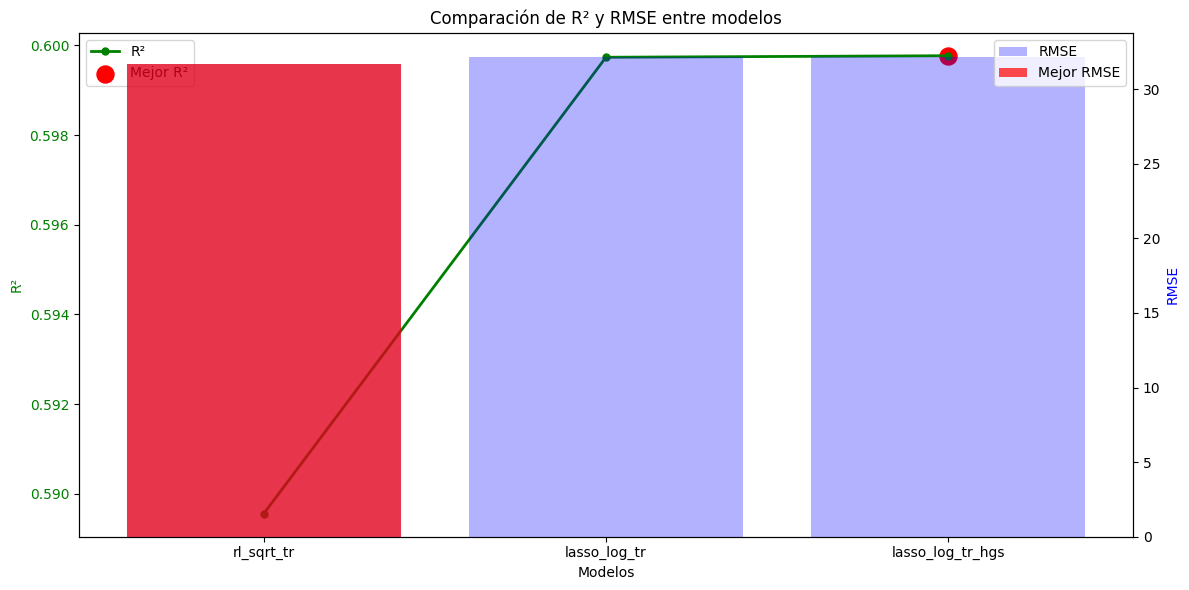

In [ ]:
# Crear subgráficos con dos ejes y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Configurar primer eje y para R² (color verde, puntos unidos por líneas)
ax1.set_xlabel('Modelos')
ax1.set_ylabel('R²', color='green')
ax1.plot(model_names, r2_values, color='green', marker='o', linestyle='-', linewidth=2, markersize=5, label='R²')
ax1.tick_params(axis='y', labelcolor='green')

# Resaltamos el mejor valor de R² con un punto rojo
ax1.scatter(model_names[best_r2_model_index], r2_values[best_r2_model_index], color='red', s=150, label='Mejor R²')

# Creamos el segundo eje "y" para RMSE
ax2 = ax1.twinx()
ax2.set_ylabel('RMSE', color='blue')
ax2.bar(model_names, rmse_values, color='blue', alpha=0.3, label='RMSE')

# Resaltamos el mejor valor de RMSE gracias a los indices que se guardaron anteriormente
ax2.bar(model_names[best_rmse_model_index], rmse_values[best_rmse_model_index], color='red', alpha=0.7, label='Mejor RMSE')

# Ajustamos las leyendas y títulos
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_title('Comparación de R² y RMSE entre modelos')
fig.tight_layout()

plt.show()

In [ ]:
#Veamos los valores:
print("los valores de R2 son: ")
print(" R2 Regresion lineal sqrt: ", r2_reg_sqrt_tr, "\n R2 Regresion de Lars Lasso log: ", r2_lasso_log_tr, "\n R2 Regresion de Lars Lasso log optimizado: ", r2_lasso_log_tr_hgs, "\n\n")
print("los valores de RMSE son: ")
print(" RMSE Regresion lineal sqrt: ", rmse_rl_sqrt_tr, "\n RMSE Regresion de Lars Lasso log: ", rmse_lasso_log_tr, "\n RMSE Regresion de Lars Lasso log optimizado: ", rmse_lasso_log_tr_hgs)

los valores de R2 son: 
 R2 Regresion lineal sqrt:  0.5895567911779268 
 R2 Regresion de Lars Lasso log:  0.599737749618056 
 R2 Regresion de Lars Lasso log optimizado:  0.5997715602569985 


los valores de RMSE son: 
 RMSE Regresion lineal sqrt:  31.67247478701466 
 RMSE Regresion de Lars Lasso log:  32.18521626134463 
 RMSE Regresion de Lars Lasso log optimizado:  32.165951427429164


Si vemos los valores de R2, están entre 0.59 (regresion lineal con la raiz cuadrada de sus variables) y 0.6 (ambos modelos de Lars Lasso) por lo que la diferencia es minima. Por el otro lado, el RMSE más bajo es el de la regresion lineal con la raiz cuadrada de sus variables (31.7 euros), mientras que los modelos de Lars Lasso tienen un valor de RMSE igual a 32.2, por lo que hay una diferencia de 0.5 euros. Como buscamos un modelo que minimice el error y además tenga un valor aceptable de R2, el mejor modelo es el de la regresion lineal con la raiz cuadrada de sus variables.

## Predicciones usando el mejor modelo

### Funcion para estimar el precio

In [ ]:
def precio (a,b,c,d,e,f,g,h,i,j):
  variables_num = [a,b,c,d,e,f,g,h]
  for num in variables_num:
    if num == 0:
      num = np.nan
    elif num < 0:
      print("No pueden haber numeros negativos")
    else:
      num=num

  if i.lower() == 'true' or i == 1:
    i = True
  elif i.lower() == 'false' or i == 0:
    i = False
  else:
    i = np.nan


  if j.lower() == 'private room' or j == '1':
    j = 1
  elif j.lower() == 'entire home/apt' or j == '0':
    j = 0
  else:
    j = np.nan


  columns = ['cant_comodidades_sqrt', 'accommodates_sqrt', 'bathrooms_sqrt', 'bedrooms_sqrt',
           'minimum_nights_sqrt', 'maximum_nights_sqrt', 'availability_30_sqrt', 'availability_365_sqrt',
           'is_instant_bookable', 'room_type']

  xnew = pd.DataFrame([[np.sqrt(a), np.sqrt(b),
          np.sqrt(c), np.sqrt(d), np.sqrt(e), np.sqrt(f), np.sqrt(g),
          np.sqrt(h),i, j]], columns=columns)

  #new_data = [np.sqrt(a),np.sqrt(b),np.sqrt(c),np.sqrt(d),np.sqrt(e),np.sqrt(f),np.sqrt(g),np.sqrt(h),i,j]
  #df2 = pd.DataFrame([new_data], columns=['cant_comodidades_sqrt', 'accommodates_sqrt', 'bathrooms_sqrt', 'bedrooms_sqrt',
   #        'minimum_nights_sqrt', 'maximum_nights_sqrt', 'availability_30_sqrt', 'availability_365_sqrt',
    #       'is_instant_bookable', 'room_type'])
  prediction = modelo_reg_sqrt.predict(xnew)
 # prediction = modelo_reg_sqrt.predict(df2)

  print("\n\n Predicción del target:", prediction)
  print("\n Prediccion real del target",np.power(prediction,2), "EUROS" )


### Predicciones

In [ ]:
columns = ['cant_comodidades_sqrt', 'accommodates_sqrt', 'bathrooms_sqrt', 'bedrooms_sqrt',
           'minimum_nights_sqrt', 'maximum_nights_sqrt', 'availability_30_sqrt', 'availability_365_sqrt',
           'is_instant_bookable', 'room_type']


In [ ]:
x_new = pd.DataFrame([[np.sqrt(17), np.sqrt(3),
          np.sqrt(2), np.sqrt(4), np.sqrt(3), np.sqrt(20), np.sqrt(15),
          np.sqrt(45),True, 0]], columns=columns)

#Realizamos la predicción usando el modelo usando la regresion lineal con variables en raiz cuadrada
prediccion = modelo_reg_sqrt.predict(x_new)

# La variable 'prediccion' ahora contiene el valor predicho del target para las nuevas características proporcionadas
print("Predicción del target:", prediccion)
print("Prediccion real del target",np.power(prediccion,2) )


Predicción del target: [10.55141231]
Prediccion real del target [111.33230184]


In [ ]:
#utilizando la funcion


a = int(input('Ingresa cantidad de comodidades (0 si no sabe): '))
b = int(input('Ingresa cantidad de personas (0 si no sabe): '))
c = int(input('Ingresa cantidad de baños (0 si no sabe): '))
d = int(input('Ingresa cantidad de dormitorios (0 si no sabe): '))
e = int(input('Ingresa cantidad de noches minimas (0 si no sabe): '))
f = int(input('Ingresa cantidad de noches maximas (0 si no sabe): '))
g = int(input('Ingresa cantidad de dias disponibles en los proximos 30 dias (0 si no sabe): '))
h = int(input('Ingresa cantidad de dias disponibles en los proximos 365 dias (0 si no sabe): '))
i = input('Ingrese si requiere reserva inmediata (True/False, otra cosa si no sabe): ')
j = str(input('Ingrese el tipo de habitacion que busca (Private room o Entire home/apt, otra cosa si no sabe): '))

precio (a,b,c,d,e,f,g,h,i,j)

Ingresa cantidad de comodidades (0 si no sabe): 17
Ingresa cantidad de personas (0 si no sabe): 3
Ingresa cantidad de baños (0 si no sabe): 2
Ingresa cantidad de dormitorios (0 si no sabe): 4
Ingresa cantidad de noches minimas (0 si no sabe): 3
Ingresa cantidad de noches maximas (0 si no sabe): 20
Ingresa cantidad de dias disponibles en los proximos 30 dias (0 si no sabe): 15
Ingresa cantidad de dias disponibles en los proximos 365 dias (0 si no sabe): 45
Ingrese si requiere reserva inmediata (True/False, otra cosa si no sabe): TRUE
Ingrese el tipo de habitacion que busca (Private room o Entire home/apt, otra cosa si no sabe): ENTIRE home/apt


 Predicción del target: [10.55141231]

 Prediccion real del target [111.33230184] EUROS


# Conclusiones de los modelos de predicción y las metricas

> Segun se pudó ver en el gráfico 'Comparador de R² y RMSE modelos', hay 2 modelos con el mejor desempeño: Lars Lasso con las variables transformadas a logaritmo (R² = 0.61 y RMSE = 31.93) y Regresión Lineal con las variables transformadas a la raíz cuadrada (R² = 0.59 y RMSE = 31.67). Como lo que se busca es tener un modelo con un buen rendimiento y además un menor error, equilibrando ambos valores (R² y RMSE), **se escoge como el mejor modelo de machine learning el de Lars Lasso con variables transformadas a logaritmo** (**modelo_lasso_log**), ya que la diferencia entre R² es de 0.02 (a favor de este), y pese a que su RMSE no es el más bajo, está a solo 0.26 Euros de serlo, por lo que es el que reune las mejores condiciones para ser el modelo a elegir.



> Viendo los gráficos comparando los valores predecidos por el modelo y los de testeo, podemos observar un patrón similar, el cual es que los valores predecidos tienden a parecerse más a los de testeo cuando los valores de 'price' no soy extremos (recalcar que se hizo una limpieza de los outliers, por lo que la base de datos no cuenta con estos datos), es decir, que la linea que representa los valores predecidos está ubicada en medio del gráfico y no pasa por los valores minimos y máximos del test